# Milestone 1 - EDA and Preprocessing data 

***Important note*** - This is merely a template. you are recommended to create your own notebook from scratch.

> Make sure to include markdown-based text commenting and explaining each step you perform.

# 1 - Extraction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import requests
from bs4 import BeautifulSoup
from scipy.stats import chi2_contingency



In [2]:
def load_csv_with_default_na_values(file_path):
    na_values = ['NA', 'Missing', 'NaN', '', ' ', 'null', 'None', 'N/A', 'n/a', 'UNKNOWN', 'unknown', 'undefined']
    df = pd.read_csv(file_path, na_values=na_values)
    return df

In [3]:
fintech_data_df = load_csv_with_default_na_values("fintech_data_2_52_24625.csv")



In [4]:
fintech_data_df

Customer Id  \
0      YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceG...   
1      YidPXHg4YSlJXHgwMFx4ZTBcblx4ZDlceGZmW25ceGNjXH...   
2      YidceGU2XHhiZVx4MTZceGZiXHhlMVx4ZmVceGQ0XHhmYy...   
3      YidceGZkXHhkYlx4YWE7XHg4M1x4YzhZXHhkM0R0e1x4ZD...   
4      YidceGQxXHhlN1x4YjdceGNkXHhiYVx4ZDZceGEyXHgxMS...   
...                                                  ...   
27025  YidceDkwXHhjNlx4Y2NIXHhlOVx4YTFceGYzXHhhYVx4OG...   
27026  YiJceDFlXHhkMVx4ZWMnSVx4YjQ3V1hceDg5XHgwMF5ceD...   
27027  Yic7XHhjZFVceGQyXHhhMVx4YjhceDFhXHhlMEtceGZiXH...   
27028  YidpIzxceGViXHhkYVx4ZjdceGZiXHg5YkxeXHhmNmRceD...   
27029  Yicjc1x4YWZUXHhiMlx4ZmF2XHhiMlx4ZTJceDk2XHhlMl...   

                            Emp Title Emp Length Home Ownership  Annual Inc  \
0                    Registered Nurse    8 years           RENT     85000.0   
1      Financial Readiness Specialist  10+ years       MORTGAGE     98000.0   
2                          Sanitation    3 years            OWN     45000.0   
3                       Grant writer     4 years           RENT     52000.0   
4                       Asst. Manager    2 years           RENT     34000.0   
...                               ...        ...            ...         ...   
27025          Medical/Vascular tech.  10+ years           RENT     62000.0   
27026                     Shoe cutter  10+ years       MORTGAGE     72000.0   
27027                      Crew Chief    4 years           RENT     32736.0   
27028                    Site Manager  10+ years       MORTGAGE     86000.0   
27029                     Contrroller    7 years       MORTGAGE    155000.0   

       Annual Inc Joint Verification Status Zip Code Addr State  Avg Cur Bal  \
0                   NaN        Not Verified    891xx         NV       4336.0   
1                   NaN            Verified    735xx         OK      27707.0   
2                   NaN        Not Verified    970xx         OR       4194.0   
3                   NaN     Source Verified    954xx         CA       1380.0   
4                   NaN            Verified    234xx         VA       2642.0   
...                 ...                 ...      ...        ...          ...   
27025               NaN     Source Verified    114xx         NY       1552.0   
27026          100000.0        Not Verified    550xx         MN      17907.0   
27027               NaN     Source Verified    836xx         ID       6207.0   
27028               NaN            Verified    254xx         WV      28022.0   
27029          183000.0            Verified    982xx         WA      22068.0   

       ...  State  Funded Amount        Term  Int Rate Grade  \
0      ...     NV        20000.0   36 months    0.1249     7   
1      ...     OK        30000.0   36 months    0.1531    11   
2      ...     OR         7000.0   36 months    0.1416    15   
3      ...     CA        12000.0   36 months    0.1261    13   
4      ...     VA         9600.0   36 months    0.1799    20   
...    ...    ...            ...         ...       ...   ...   
27025  ...     NY        12000.0   36 months    0.1333    15   
27026  ...     MN        16800.0   60 months    0.1447    13   
27027  ...     ID         5500.0   36 months    0.2899    32   
27028  ...     WV        14400.0   60 months    0.1797    17   
27029  ...     WA        32000.0   36 months    0.0671     4   

             Issue Date Pymnt Plan        Type             Purpose  \
0         14 March 2014      False  INDIVIDUAL         credit_card   
1         16 April 2016      False  INDIVIDUAL  debt_consolidation   
2         14 March 2014      False  INDIVIDUAL         credit_card   
3         18 March 2018      False  Individual  debt_consolidation   
4         17 March 2017      False  Individual  debt_consolidation   
...                 ...        ...         ...                 ...   
27025   15 October 2015      False  Individual    home_improvement   
27026  19 February 2019      False   Joint App      major_purchase   
27027     16 Ma

In [5]:
fintech_data_df['Customer Id'].isnull().sum()
fintech_data_df['Customer Id'].nunique()

27030

# 2- EDA

1. Explore the Dataset:

In [6]:
fintech_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27030 entries, 0 to 27029
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Id          27030 non-null  object 
 1   Emp Title            24708 non-null  object 
 2   Emp Length           25192 non-null  object 
 3   Home Ownership       27030 non-null  object 
 4   Annual Inc           27030 non-null  float64
 5   Annual Inc Joint     1907 non-null   float64
 6   Verification Status  27030 non-null  object 
 7   Zip Code             27030 non-null  object 
 8   Addr State           27030 non-null  object 
 9   Avg Cur Bal          27030 non-null  float64
 10  Tot Cur Bal          27030 non-null  float64
 11  Loan Id              27030 non-null  int64  
 12  Loan Status          27030 non-null  object 
 13  Loan Amount          27030 non-null  float64
 14  State                27030 non-null  object 
 15  Funded Amount        27030 non-null 

array([[<Axes: title={'center': 'Annual Inc'}>,
        <Axes: title={'center': 'Annual Inc Joint'}>,
        <Axes: title={'center': 'Avg Cur Bal'}>],
       [<Axes: title={'center': 'Tot Cur Bal'}>,
        <Axes: title={'center': 'Loan Id'}>,
        <Axes: title={'center': 'Loan Amount'}>],
       [<Axes: title={'center': 'Funded Amount'}>,
        <Axes: title={'center': 'Int Rate'}>,
        <Axes: title={'center': 'Grade'}>]], dtype=object)

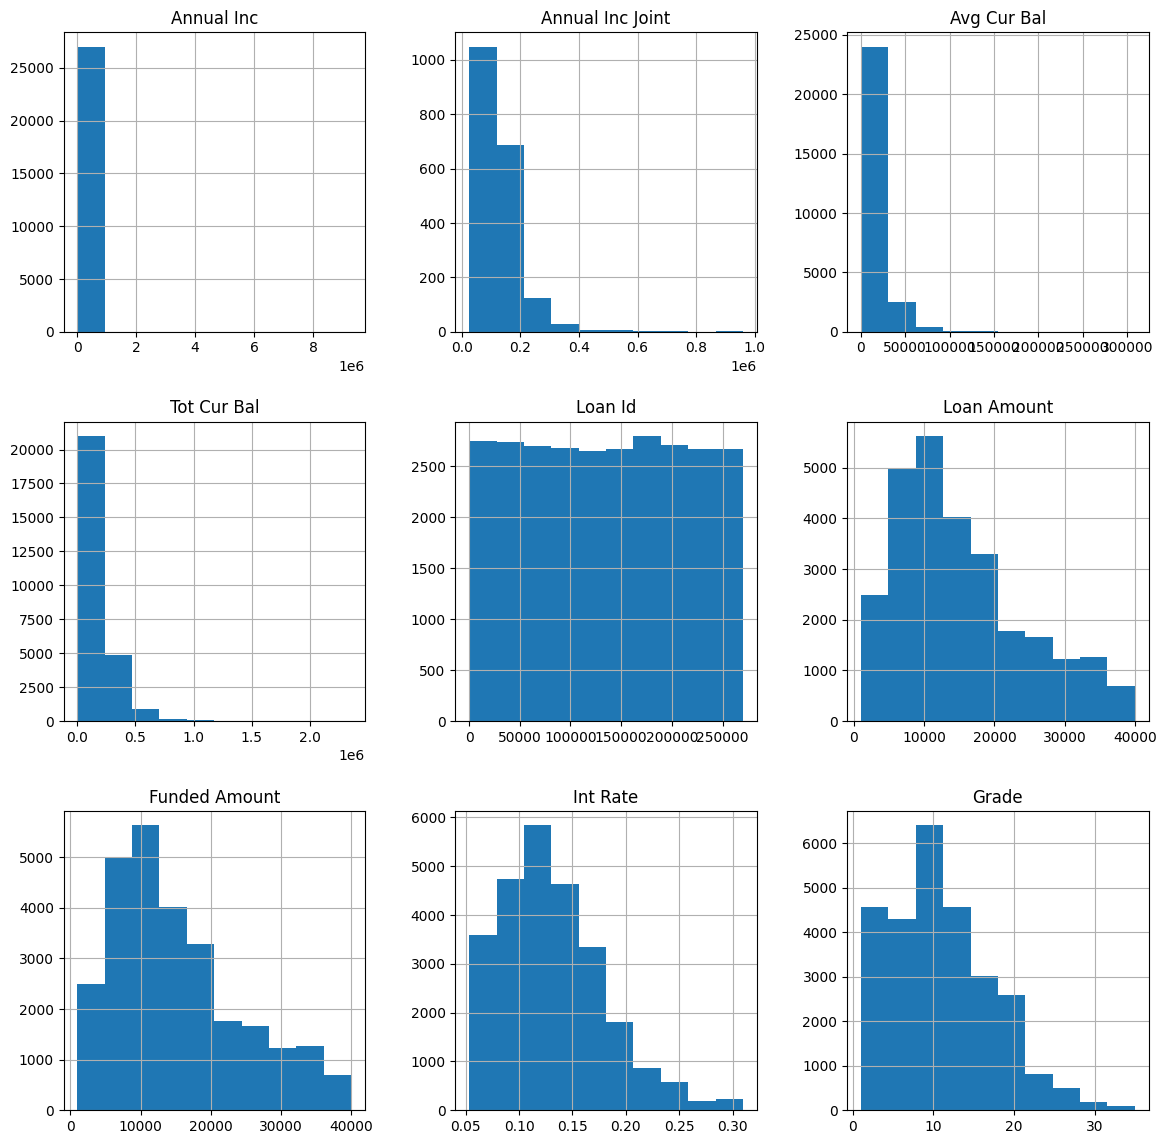

In [7]:
fintech_column_visualization = fintech_data_df.iloc[:,:]
fintech_column_visualization.hist(figsize=(14,14))

1. Annual Inc: Most customers have an annual income below 1 million, with a strong concentration in the lower range.
2. Annual Inc Joint: Joint incomes are much less frequent, with most cases being very low, and a few higher-income outliers.
3. Avg Cur Bal: The average current balance across accounts has a right-skewed distribution, with most values concentrated at lower balances.
4. Tot Cur Bal: Similar to `Avg Cur Bal`, the total current balance is heavily right-skewed, with a few large values.
5. Loan Id: This is uniformly distributed, likely due to it being an identifier.
6. Loan Amount: The distribution shows that most loans are between 5,000 and 20,000.
7. Funded Amount: The actual funded amount of loans is centered around a similar range as the loan amount, with some variation.
8. Int Rate: Interest rates follow a bell-curve-like distribution, with most loans having rates between 10% and 20%.
9. Grade: Loan grades are distributed across the range, with more frequent occurrences in the lower grades (A,B,C).

Plotting Kdenisty Graphs for the data :

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

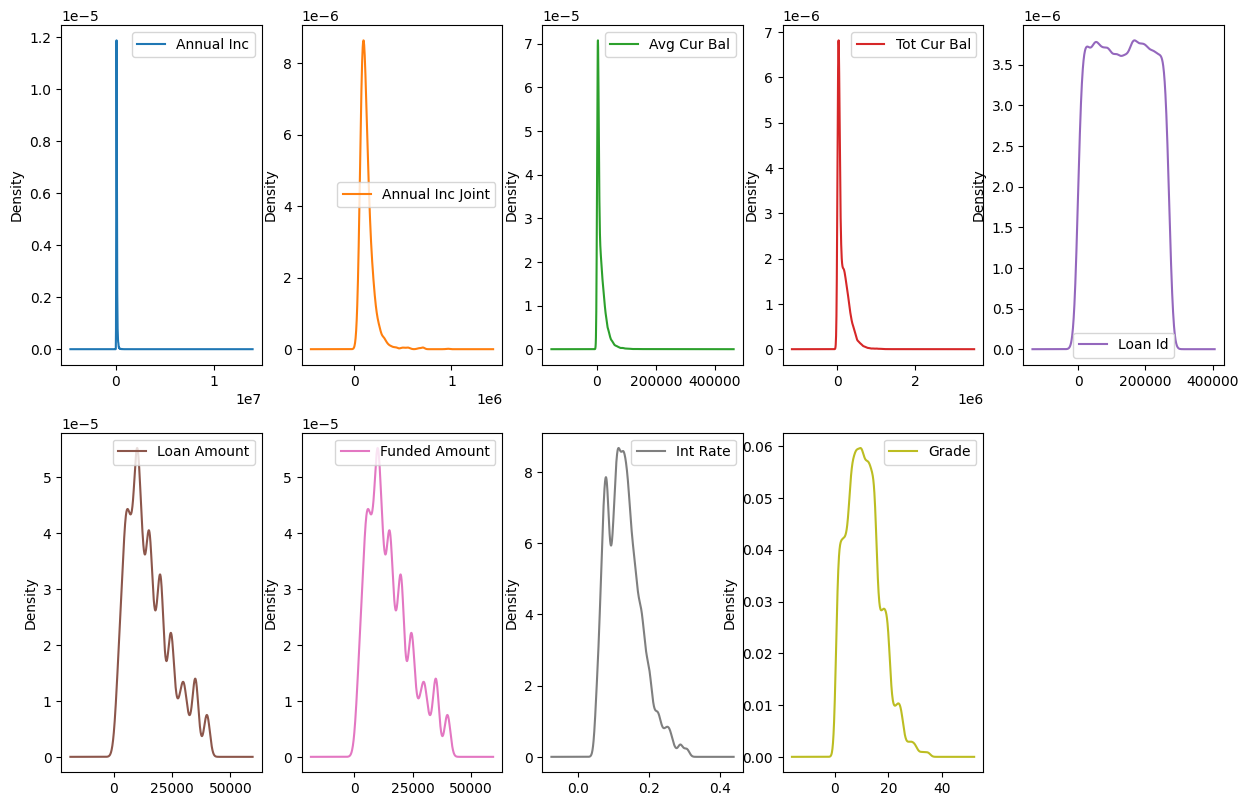

In [8]:
kDenisty = fintech_data_df.loc[:,:]
kDenisty.plot(kind='density', subplots=True, layout=(3,5), sharex=False,figsize=(15,15))

1. Annual Inc & Annual Inc Joint: Both are heavily skewed to the right, with most values concentrated near zero and a few extreme outliers.
2. Avg Cur Bal & Tot Cur Bal: Similarly, these features have extreme skewness, indicating most customers have low balances, with only a few having significantly high balances.
3. Loan Id: This looks uniformly distributed, as expected for a unique identifier.
4. Loan Amount & Funded Amount: These are skewed slightly to the right, meaning most loans are for smaller amounts with fewer large loan amounts.
5. Int Rate: This distribution appears more normal, centered around a particular range, with fewer outliers.
6. Grade: This shows a slightly skewed distribution, indicating most loans fall within certain grade ranges (lower grades).

See the Description of the fintech_data_df for the numerical features in out dataset

In [9]:
fintech_data_df.describe()

Annual Inc  Annual Inc Joint    Avg Cur Bal   Tot Cur Bal  \
count  2.703000e+04       1907.000000   27030.000000  2.703000e+04   
mean   7.881836e+04     129782.472271   13510.783833  1.440128e+05   
std    8.013604e+04      75077.725274   16302.343519  1.614278e+05   
min    5.000000e+02      25000.000000       0.000000  0.000000e+00   
25%    4.700000e+04      85000.000000    3094.250000  2.897450e+04   
50%    6.600000e+04     112000.000000    7308.500000  7.898200e+04   
75%    9.500000e+04     151689.000000   18731.250000  2.163842e+05   
max    9.300086e+06     960000.000000  309051.000000  2.353782e+06   

             Loan Id   Loan Amount  Funded Amount      Int Rate         Grade  
count   27030.000000  27030.000000   27030.000000  25840.000000  27030.000000  
mean   134719.551609  15359.042730   15359.042730      0.130835     10.921273  
std     78069.526298   9438.502338    9438.502338      0.048925      6.321011  
min        18.000000   1000.000000    1000.000000      0.053100      1.000000  
25%     66892.250000   8000.000000    8000.000000      0.094400      6.000000  
50%    135186.500000  13200.000000   13200.000000      0.126100     10.000000  
75%    201979.500000  20000.000000   20000.000000      0.159900     15.000000  
max    270283.000000  40000.000000   40000.000000      0.309900     35.000000

See the description of the fintech_data_df for the categrical feature in our dataset

In [10]:
fintech_data_df.describe(include=['object'])

Customer Id Emp Title  \
count                                               27030     24708   
unique                                              27030     13051   
top     YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceG...   Teacher   
freq                                                    1       492   

       Emp Length Home Ownership Verification Status Zip Code Addr State  \
count       25192          27030               27030    27030      27030   
unique         11              5                   3      851         50   
top     10+ years       MORTGAGE     Source Verified    112xx         CA   
freq         8878          13334               10527      289       3630   

       Loan Status  State        Term     Issue Date        Type  \
count        27030  27030       27030          27030       27030   
unique           7     50           2             89           5   
top        Current     CA   36 months  16 March 2016  Individual   
freq         17086   3630       19052            636       16806   

                   Purpose         Description  
count                27030               26789  
unique                  13                 808  
top     debt_consolidation  Debt consolidation  
freq                 15328               14427

See the Correlation for the numeric values only :

In [11]:
fintech_data_df.corr(numeric_only=True)

Annual Inc  Annual Inc Joint  Avg Cur Bal  Tot Cur Bal  \
Annual Inc          1.000000          0.685917     0.272872     0.377534   
Annual Inc Joint    0.685917          1.000000     0.305816     0.448043   
Avg Cur Bal         0.272872          0.305816     1.000000     0.825137   
Tot Cur Bal         0.377534          0.448043     0.825137     1.000000   
Loan Id             0.259049          0.299702     0.217130     0.297692   
Loan Amount         0.281153          0.339429     0.235745     0.319512   
Funded Amount       0.281153          0.339429     0.235745     0.319512   
Int Rate           -0.075040         -0.130932    -0.076681    -0.073283   
Grade              -0.075312         -0.138047    -0.077805    -0.073995   
Pymnt Plan          0.000521         -0.015192    -0.003238     0.003174   

                   Loan Id  Loan Amount  Funded Amount  Int Rate     Grade  \
Annual Inc        0.259049     0.281153       0.281153 -0.075040 -0.075312   
Annual Inc Joint  0.299702     0.339429       0.339429 -0.130932 -0.138047   
Avg Cur Bal       0.217130     0.235745       0.235745 -0.076681 -0.077805   
Tot Cur Bal       0.297692     0.319512       0.319512 -0.073283 -0.073995   
Loan Id           1.000000     0.962366       0.962366  0.093952  0.091023   
Loan Amount       0.962366     1.000000       1.000000  0.063572  0.061861   
Funded Amount     0.962366     1.000000       1.000000  0.063572  0.061861   
Int Rate          0.093952     0.063572       0.063572  1.000000  0.919550   
Grade             0.091023     0.061861       0.061861  0.919550  1.000000   
Pymnt Plan        0.003391     0.003726       0.003726  0.014005  0.014106   

                  Pymnt Plan  
Annual Inc          0.000521  
Annual Inc Joint   -0.015192  
Avg Cur Bal        -0.003238  
Tot Cur Bal         0.003174  
Loan Id             0.003391  
Loan Amount         0.003726  
Funded Amount       0.003726  
Int Rate            0.014005  
Grade               0.014106  
Pymnt Plan          1.000000

1. Annual Inc and Annual Inc Joint have a moderate correlation with balances and loan amounts, indicating a relationship between income and financial stability.
2. Avg Cur Bal and Tot Cur Bal are highly correlated (0.83), suggesting they measure similar financial behavior.
3. Loan Id, Loan Amount, and Funded Amount are closely related (0.96–1.0), reflecting similar loan characteristics.
4. Int Rate and Grade show a strong correlation (0.92), indicating loan grade influences the interest rate.
5. Pymnt Plan has very weak correlations with other features, showing minimal linear relationships.

# Question 1 : 
How does the employment length influence both the loan amount and the interest rate, and how does this relationship differ across home ownership status (Rent, Own, Mortgage)?

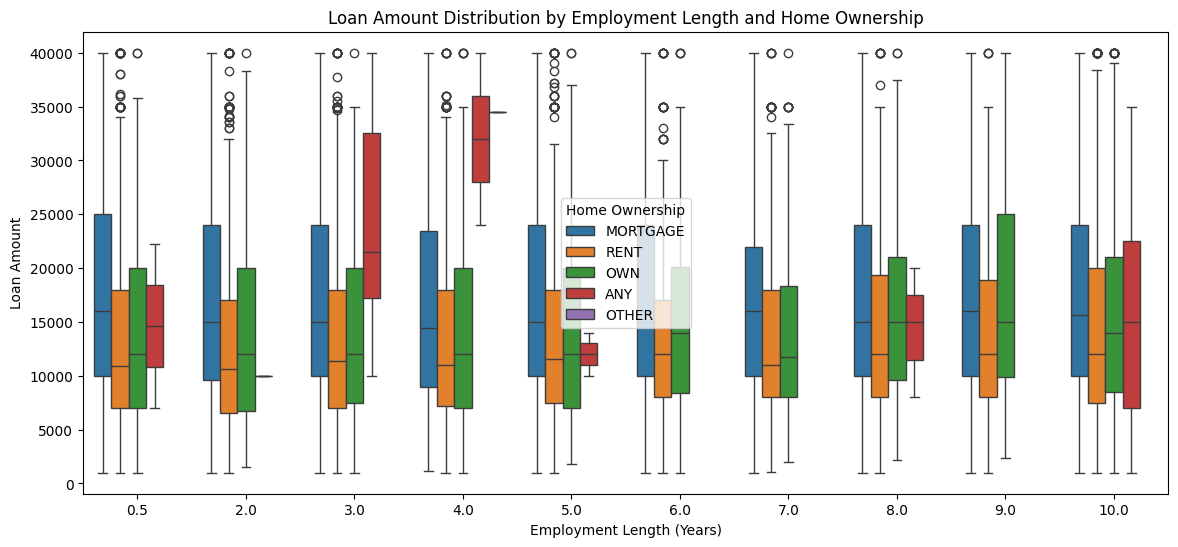

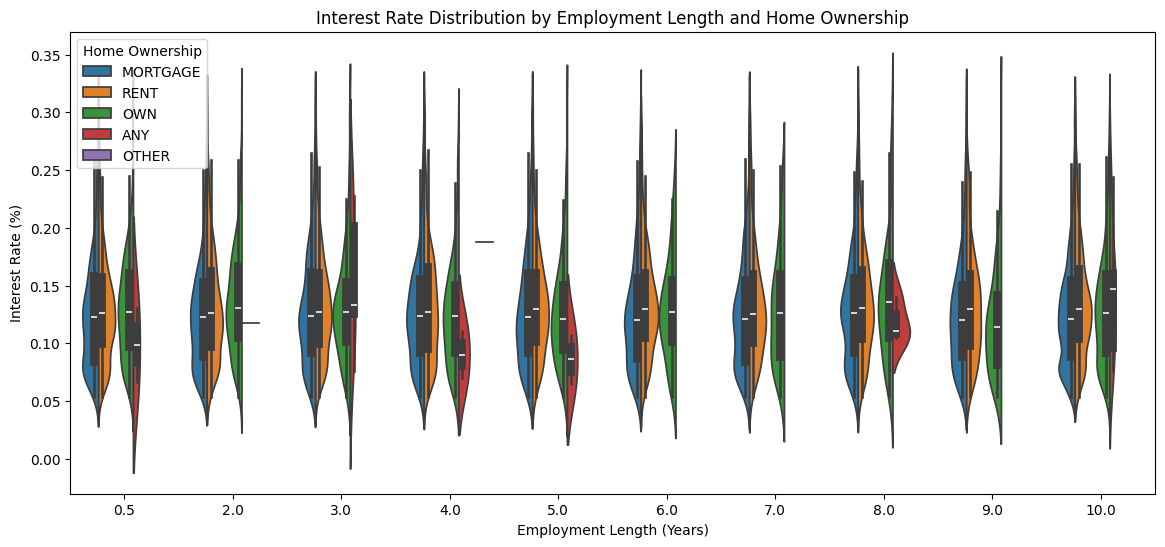

In [12]:
fintech_data_df_copy = fintech_data_df.copy()
emp_length_mapping = {
    '10+ years': 10,
    '< 1 year': 0.5
}

for i in range(1, 10):
    emp_length_mapping[f'{i} years'] = float(i)

fintech_data_df_copy['Emp Length'] = fintech_data_df_copy['Emp Length'].map(emp_length_mapping)

df_filtered = fintech_data_df_copy.dropna(subset=['Emp Length', 'Loan Amount', 'Int Rate', 'Home Ownership'])

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_filtered, x='Emp Length', y='Loan Amount', hue='Home Ownership')
plt.title('Loan Amount Distribution by Employment Length and Home Ownership')
plt.xlabel('Employment Length (Years)')
plt.ylabel('Loan Amount')
plt.legend(title='Home Ownership')
plt.show()

plt.figure(figsize=(14, 6))
sns.violinplot(data=df_filtered, x='Emp Length', y='Int Rate', hue='Home Ownership', split=True)
plt.title('Interest Rate Distribution by Employment Length and Home Ownership')
plt.xlabel('Employment Length (Years)')
plt.ylabel('Interest Rate (%)')
plt.legend(title='Home Ownership')
plt.show()

1. Loan Amount Distribution by Employment Length and Home Ownership (Box Plot):
MORTGAGE typically has a wider distribution of loan amounts across various employment lengths, suggesting a higher variance.
RENT and OWN categories show lower median loan amounts, particularly for shorter employment lengths.
There is no significant trend in loan amounts as employment length increases, indicating that other factors might be more influential in determining the loan amount.



2. Interest Rate Distribution by Employment Length and Home Ownership (Violin Plot):
The interest rates show similar median values across different employment lengths, indicating little correlation between employment length and interest rates.
MORTGAGE tends to have a slightly broader distribution of interest rates compared to RENT and OWN.
There is some variation in interest rate distributions based on home ownership status, but it doesn't show a strong trend related to the length of employment.

# Question 2: 
What is the distribution of loan statuses (Current, Fully Paid, Late, etc.) across different states, and how does it vary with home ownership status and loan purpose? 

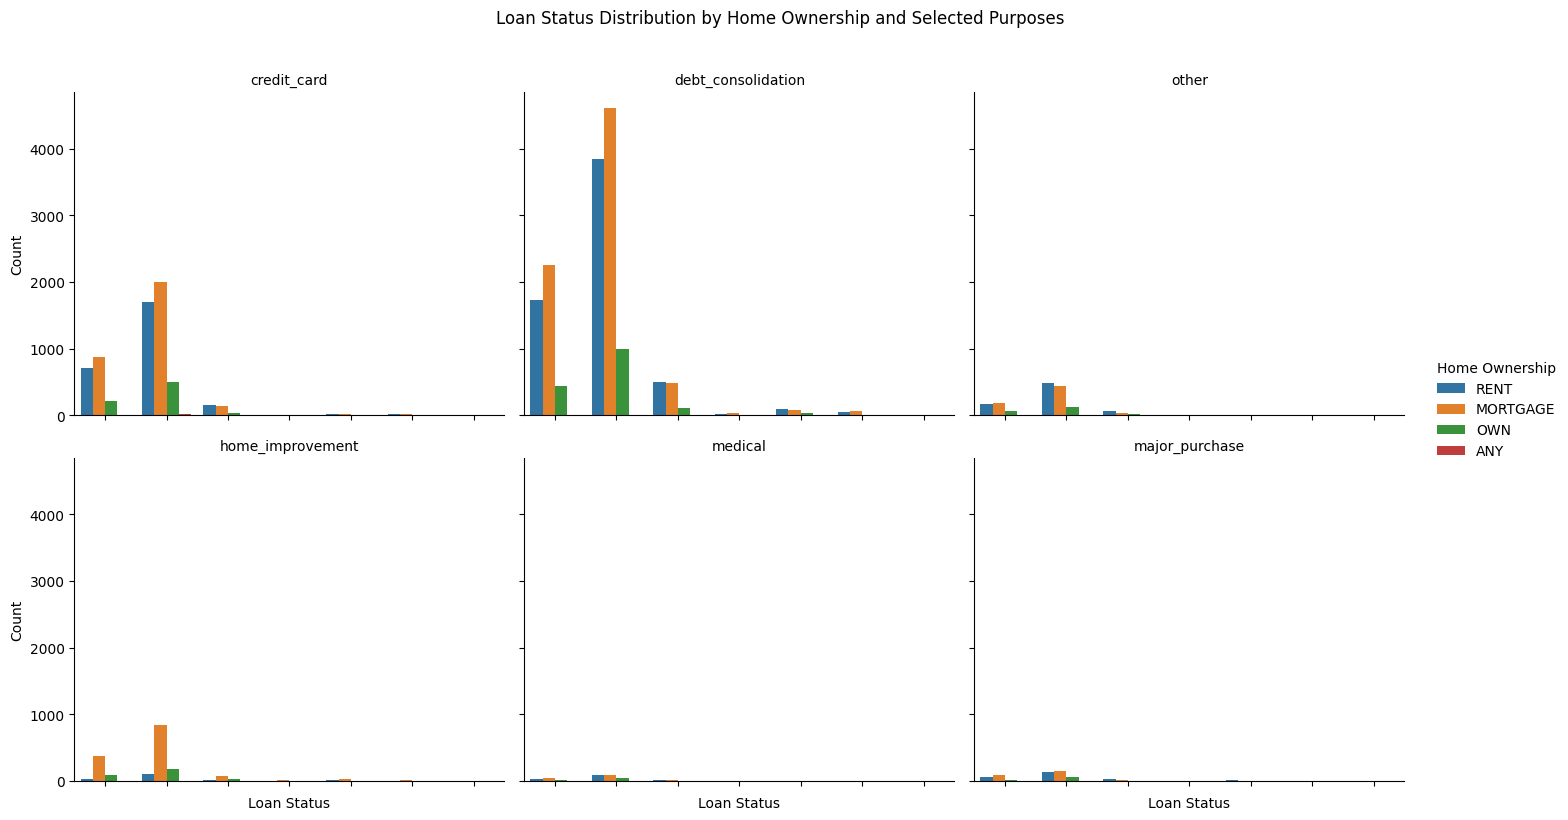

In [13]:
common_purposes = fintech_data_df['Purpose'].value_counts().index[:6]  
filtered_df = fintech_data_df[fintech_data_df['Purpose'].isin(common_purposes)]
g = sns.catplot(
    data=filtered_df,
    x='Loan Status',
    hue='Home Ownership',
    col='Purpose',  
    kind='count',
    col_wrap=3,  
    height=4,
    aspect=1.2,
    palette='tab10' 
)
g.fig.suptitle('Loan Status Distribution by Home Ownership and Selected Purposes', y=1.02)
g.set_axis_labels('Loan Status', 'Count')
g.set_titles('{col_name}')
g.set_xticklabels(rotation=45)
g.tight_layout()
plt.show()




This plot shows how different loan statuses are distributed across various loan purposes, with an additional breakdown by home ownership type.
1. Common Loan Purposes:
   - "Debt Consolidation" and "Credit Card" are the most frequent reasons for taking out loans. This means many people use loans to pay off existing debts or manage credit card balances.
   - Other loan purposes like "Medical," "Home Improvement," and "Major Purchase" have fewer cases
2. Loan Status Breakdown:
   - The majority of loans are either "Current" (being repaid) or "Fully Paid." This suggests that most people are keeping up with their loan payments.
   - There are very few cases of loans in problematic statuses like "Late" or "Charged Off," which indicates that defaults are less common.

3. Impact of Home Ownership:
   - Borrowers who "Rent" or have a "Mortgage" make up the largest groups across most loan purposes, especially for "Debt Consolidation" and "Credit Card" loans.
   - Borrowers who "Own" their homes or are in the "Any" category have fewer loans overall, showing that renters and mortgage holders are more active in borrowing.

4. Less Frequent Loan Purposes:
   - Categories like "Medical" and "Major Purchase" have much lower loan counts, meaning fewer people are taking out loans for these purposes.
Overall, the plot shows that most loans are related to managing existing debts, and that borrowers with mortgages or who rent are the main groups applying for these loans.

# Question 3:
How do different loan purposes affect the relationship between loan amount, annual income, and loan grade?

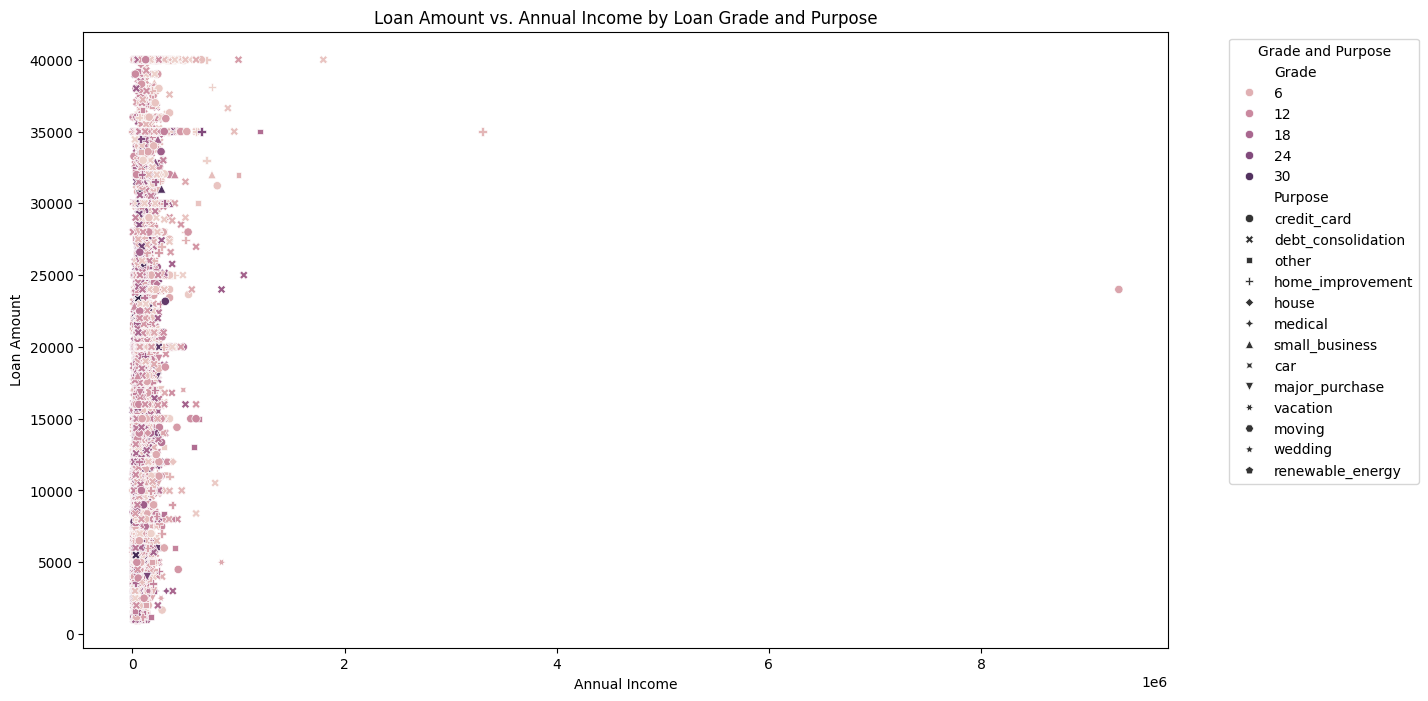

In [14]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=fintech_data_df, x='Annual Inc', y='Loan Amount', hue='Grade', style='Purpose')
plt.title('Loan Amount vs. Annual Income by Loan Grade and Purpose')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.legend(title='Grade and Purpose', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



In summary, this plot shows the spread of loan amounts in relation to borrowers' income, highlighting that most loans are relatively small and targeted toward individuals with a wide range of income levels, regardless of loan grade or purpose. However, the dense clustering near the lower income levels makes it difficult to identify distinct trends or relationships


# Question 4: 
How do loan grades correlate with loan purposes, and what are the trends in loan amounts and interest rates for the most common loan purposes?

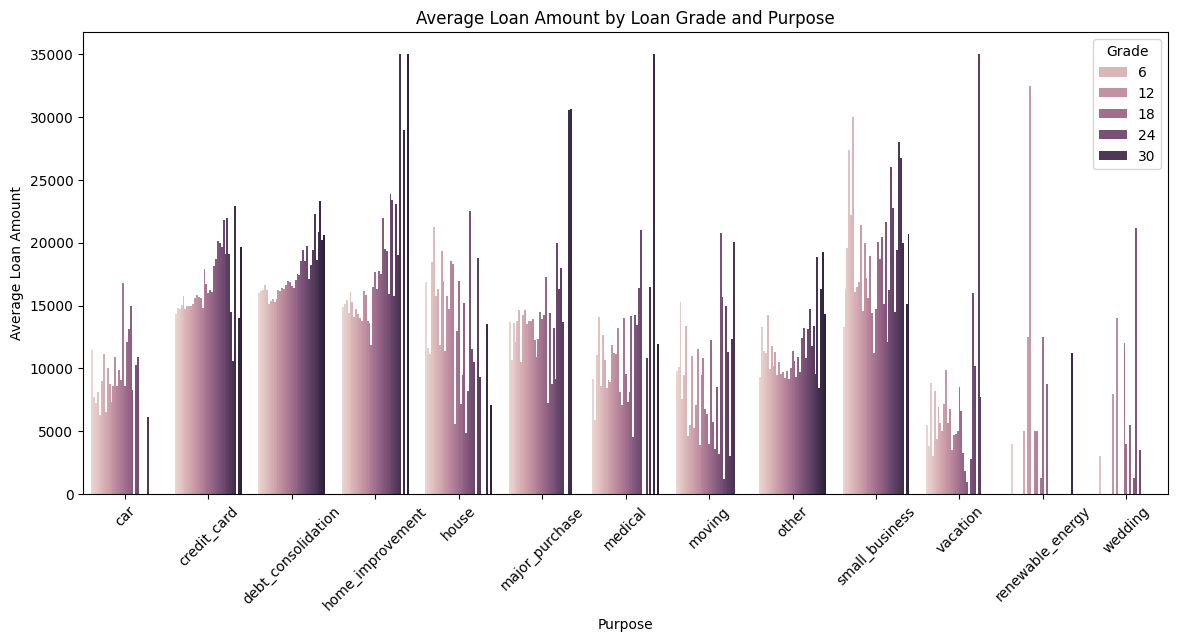

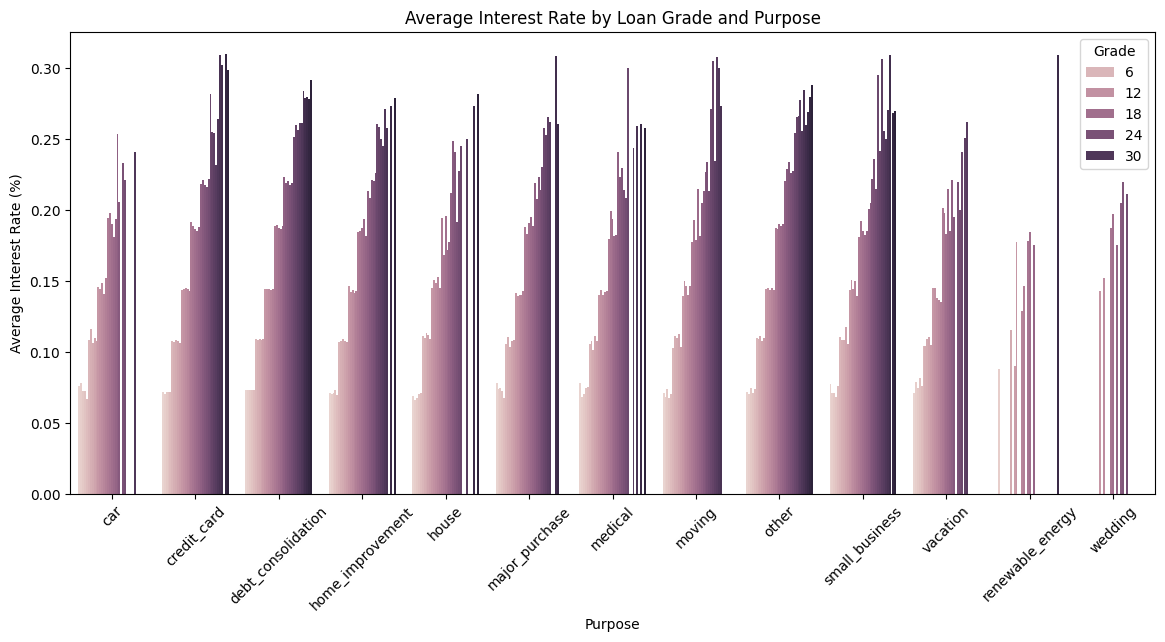

In [15]:
loan_grade_purpose = fintech_data_df.groupby(['Grade', 'Purpose']).agg({'Loan Amount': 'mean', 'Int Rate': 'mean'}).reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=loan_grade_purpose, x='Purpose', y='Loan Amount', hue='Grade')
plt.title('Average Loan Amount by Loan Grade and Purpose')
plt.xlabel('Purpose')
plt.ylabel('Average Loan Amount')
plt.xticks(rotation=45)
plt.legend(title='Grade')
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(data=loan_grade_purpose, x='Purpose', y='Int Rate', hue='Grade')
plt.title('Average Interest Rate by Loan Grade and Purpose')
plt.xlabel('Purpose')
plt.ylabel('Average Interest Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Grade')
plt.show()



1. Average Loan Amount by Loan Grade and Purpose :
    For each purpose, the average loan amount tends to increase with higher grades. For example, for "debt consolidation" and "small business" loans, the average loan amount is higher for higher loan grades.
    Some loan purposes, like "renewable energy" and "wedding," have fewer data points, leading to sparse bars, indicating fewer loans for these purposes.
    Common purposes such as "debt consolidation," "home improvement," and "credit card" show a wider range of loan amounts across different grades, suggesting varied borrowing needs.

2. Average Interest Rate by Loan Grade and Purpose :
    As expected, higher loan grades (darker shades) generally correspond to higher average interest rates, reflecting the risk assessment based on the grade.
    There is consistency across different purposes: for almost all categories, higher grades result in higher interest rates.
    For purposes with lower borrowing frequencies, such as "renewable energy" and "vacation," there are fewer visible differences across grades.

Both plots highlight that loan grade plays a crucial role in determining loan characteristics. Higher grades are associated with higher loan amounts and interest rates.
Common loan purposes like "debt consolidation" and "home improvement" show more variability, suggesting these categories have a diverse set of borrowers with varying credit profiles.

# Question 5: 
What is the correlation between loan amount, interest rate, and loan grade, and how does this correlation vary based on whether the borrower is enrolled in a payment plan?

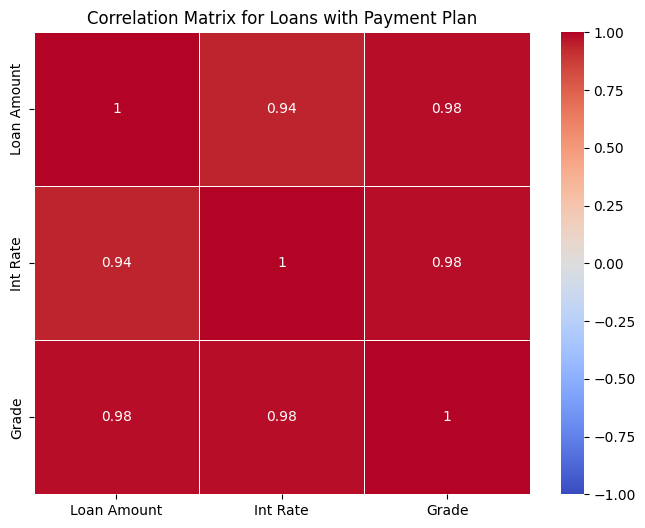

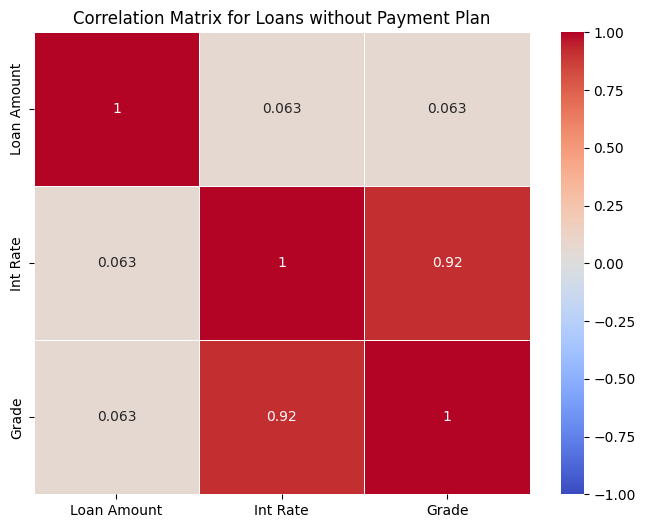

In [16]:
fintech_data_df_corr = fintech_data_df.copy()
fintech_data_df_corr = fintech_data_df_corr.dropna(subset=['Loan Amount', 'Int Rate', 'Grade'])
correlation_with_plan = fintech_data_df_corr[fintech_data_df_corr['Pymnt Plan'] == True][['Loan Amount', 'Int Rate', 'Grade']].corr()
correlation_without_plan = fintech_data_df_corr[fintech_data_df_corr['Pymnt Plan'] == False][['Loan Amount', 'Int Rate', 'Grade']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_plan, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix for Loans with Payment Plan')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_without_plan, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix for Loans without Payment Plan')
plt.show()





1. Loans with Payment Plan:
    1. There is a strong positive correlation between all three variables.
    2. Loan Amount and Interest Rate have a high correlation (0.94), suggesting that as the loan amount increases, the interest rate tends to increase as well.
    3. Both Loan Amount and Interest Rate are highly correlated with Grade (0.98), indicating that as loans move to higher grades, these amounts generally increase.

2. Loans without Payment Plan:

    1. The correlations are generally weaker compared to loans with a payment plan.
    2. Loan Amount has a minimal correlation with both Interest Rate and Grade (0.063), indicating little to no relationship.
    3. However, Interest Rate and Grade still exhibit a strong correlation (0.92), suggesting that higher interest rates are associated with higher-grade loans, even when no payment plan is in place.

# Question 6 : Loan Amount vs Other Features

1. Loan Amount by Term 

C:\Users\ALLAM\AppData\Local\Temp\ipykernel_43816\1144167560.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Term', y='Loan Amount', data=fintech_data_df, palette='Blues')


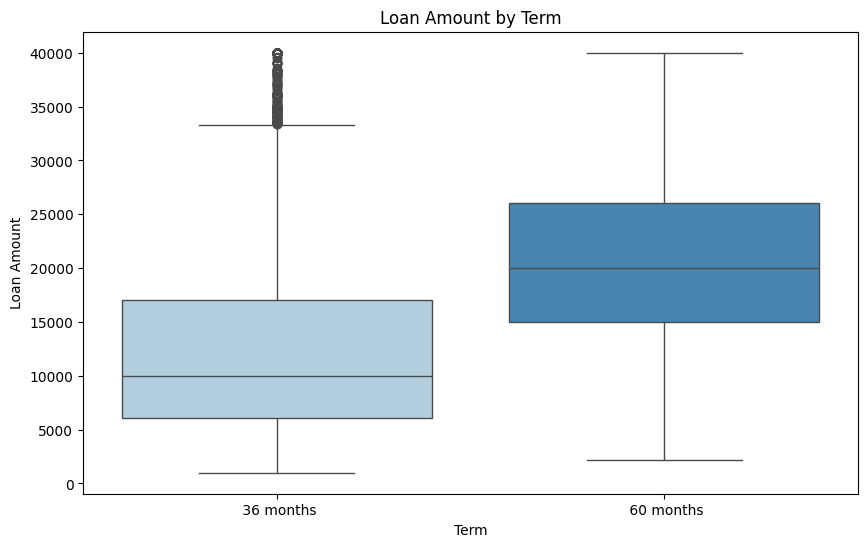

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Term', y='Loan Amount', data=fintech_data_df, palette='Blues')
plt.title('Loan Amount by Term')
plt.show()


This box plot will show if loans with longer terms (()) 60 months) tend to have higher loan amounts compared to shorter-term loans (36 months).

2. Loan Amount by Home Ownership

C:\Users\ALLAM\AppData\Local\Temp\ipykernel_43816\2152592345.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Home Ownership', y='Loan Amount', data=fintech_data_df, palette='Oranges')


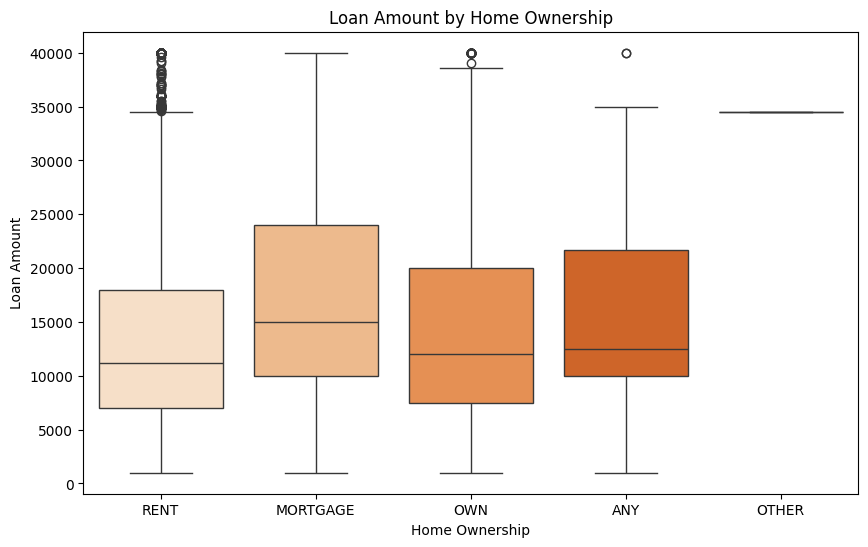

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Home Ownership', y='Loan Amount', data=fintech_data_df, palette='Oranges')
plt.title('Loan Amount by Home Ownership')
plt.show()


Question 7 :  Interest Rate vs Loan Grade

C:\Users\ALLAM\AppData\Local\Temp\ipykernel_43816\4028526255.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Grade', y='Int Rate', data=fintech_data_df, palette='Purples')


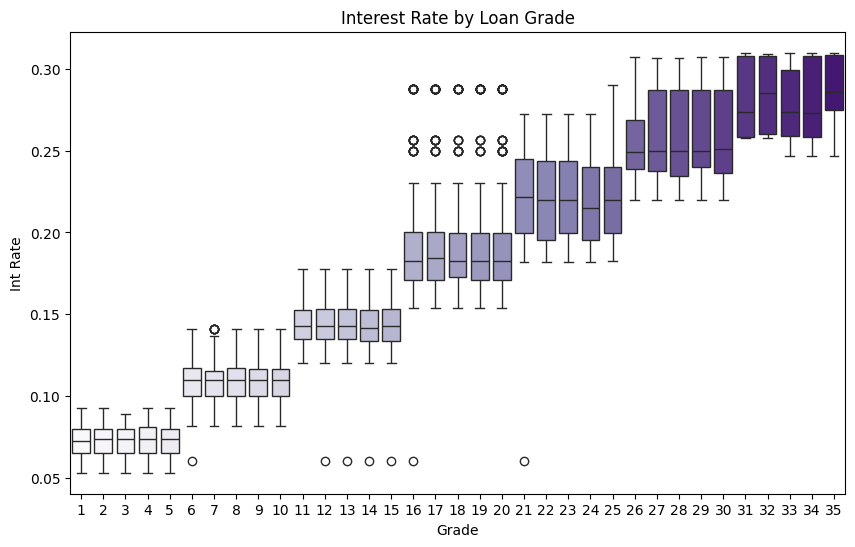

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Grade', y='Int Rate', data=fintech_data_df, palette='Purples')
plt.title('Interest Rate by Loan Grade')
plt.show()


Question 8 :What is the relation between  Loan Status vs Purpose

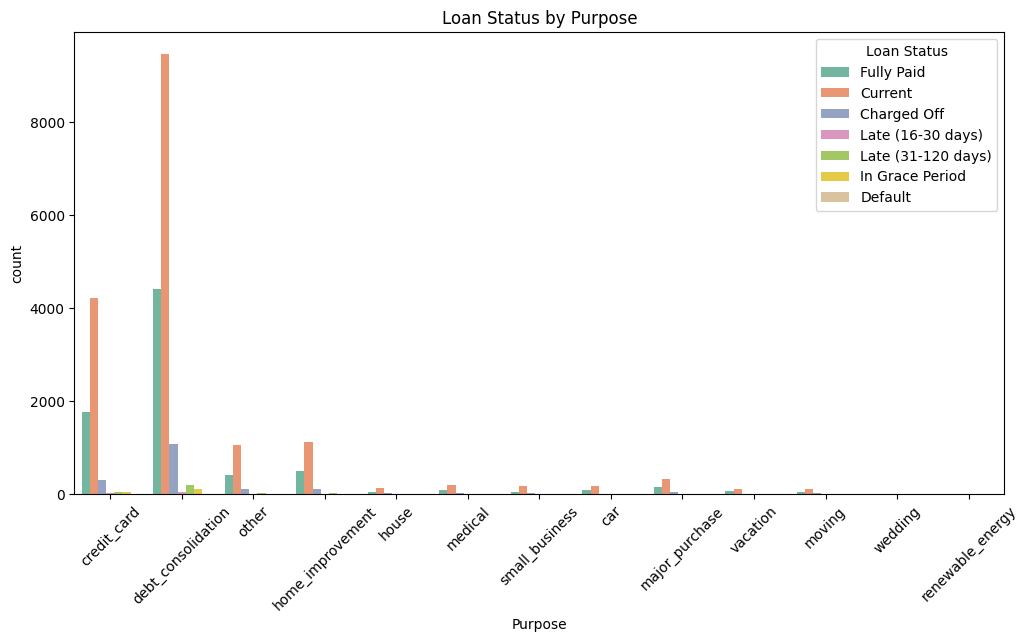

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Purpose', hue='Loan Status', data=fintech_data_df, palette='Set2')
plt.title('Loan Status by Purpose')
plt.xticks(rotation=45)
plt.show()


Question 9 : What is the Correlation Analysis for numeric feature such as : `Loan Amount` , `Annual Income` and `Interset Rate`

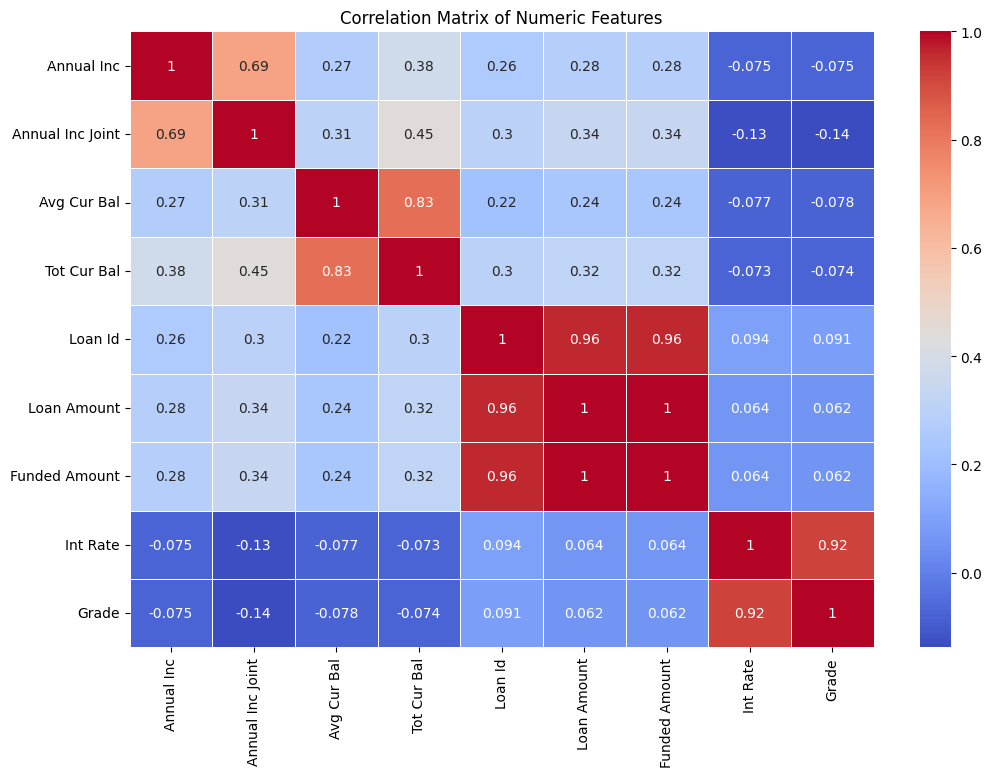

In [21]:
numeric_df = fintech_data_df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


### Analysing the dataset , querying and extracting additional info to gain deeper insights


1. Loan Amount by Purpose

In [22]:
loan_amount_by_purpose = fintech_data_df.groupby('Purpose')['Loan Amount'].describe()
print("Loan Amount by Purpose:")
print(loan_amount_by_purpose)


Loan Amount by Purpose:
                      count          mean           std     min     25%  \
Purpose                                                                   
car                   289.0   9220.847751   6519.696724  1000.0  5000.0   
credit_card          6396.0  15366.959819   8913.451871  1000.0  9000.0   
debt_consolidation  15328.0  16304.610843   9331.795675  1000.0  9600.0   
home_improvement     1755.0  15253.589744  10137.115867  1000.0  7200.0   
house                 187.0  15198.930481  10358.991351  1000.0  7000.0   
major_purchase        523.0  13294.407266  10353.476198  1000.0  5000.0   
medical               320.0  10342.890625   8989.529472  1000.0  4000.0   
moving                161.0   8868.012422   7841.482347  1000.0  3600.0   
other                1602.0  10634.534956   8998.388275  1000.0  4000.0   
renewable_energy       14.0  10553.571429   9243.094393  1300.0  4250.0   
small_business        256.0  17662.402344  10630.505724  1500.0  9075.0   
v

2. Average Interest Rate by Grade: this query calculates the average interest rate for each loan grade

In [23]:
avg_interest_by_grade = fintech_data_df.groupby('Grade')['Int Rate'].mean()
print("Average Interest Rate by Grade:",avg_interest_by_grade)


Average Interest Rate by Grade: Grade
1     0.072558
2     0.072199
3     0.072559
4     0.072809
5     0.072412
6     0.108535
7     0.108516
8     0.108911
9     0.108538
10    0.108454
11    0.144042
12    0.144358
13    0.144300
14    0.143803
15    0.143958
16    0.188831
17    0.189146
18    0.187777
19    0.187785
20    0.188055
21    0.221361
22    0.219448
23    0.221419
24    0.219208
25    0.220911
26    0.256356
27    0.259697
28    0.257007
29    0.260357
30    0.261477
31    0.280350
32    0.285214
33    0.277478
34    0.278590
35    0.288267
Name: Int Rate, dtype: float64


3. Average Loan Amount by Home Ownership Status:  shows how loan amounts differ based on the home ownership status of borrowers.

In [24]:
avg_loan_by_home_ownership = fintech_data_df.groupby('Home Ownership')['Loan Amount'].mean()
print("Average Loan Amount by Home Ownership:",avg_loan_by_home_ownership)



Average Loan Amount by Home Ownership: Home Ownership
ANY         16211.764706
MORTGAGE    17029.526024
OTHER       34475.000000
OWN         14660.504676
RENT        13450.314867
Name: Loan Amount, dtype: float64


4. Count of Loans by Home Ownership:gives the total count of loans for each home ownership category

In [25]:
loans_count_by_home_ownership = fintech_data_df['Home Ownership'].value_counts()
print("Count of Loans by Home Ownership:",loans_count_by_home_ownership)



Count of Loans by Home Ownership: Home Ownership
MORTGAGE    13334
RENT        10560
OWN          3101
ANY            34
OTHER           1
Name: count, dtype: int64


5. Average Annual Income by Loan Grade: Analyzes how the average annual income varies across loan grades.

In [26]:
avg_income_by_grade = fintech_data_df.groupby('Grade')['Annual Inc'].mean()
print("Average Annual Income by Loan Grade:",avg_income_by_grade)



Average Annual Income by Loan Grade: Grade
1     87954.899593
2     89048.222186
3     92357.093476
4     89808.826210
5     90587.366515
6     78087.521933
7     81347.413546
8     84710.381267
9     80577.585932
10    80543.333582
11    72563.726452
12    74794.967302
13    74613.718401
14    73994.585083
15    72107.204153
16    69536.023172
17    74991.100265
18    69923.931893
19    71285.845455
20    72783.661033
21    67398.293458
22    69663.135972
23    74461.898315
24    71761.837624
25    72381.033251
26    68534.852821
27    63878.098592
28    71503.190476
29    73571.001526
30    71912.402986
31    61660.384615
32    76412.913043
33    73140.618276
34    64125.666667
35    66843.096774
Name: Annual Inc, dtype: float64


6. loan Amount Distribution by Grade:  shows the distribution of loan amounts for each loan grade.

In [27]:
loan_amount_dist_by_grade = fintech_data_df.groupby('Grade')['Loan Amount'].describe()
print("Loan Amount Distribution by Grade:",loan_amount_dist_by_grade)



Loan Amount Distribution by Grade:         count          mean           std     min       25%      50%  \
Grade                                                                  
1      1173.0  14847.804774   9677.184449  1000.0   7550.00  12000.0   
2      1115.0  15084.596413   9515.843107  1000.0   8000.00  12000.0   
3      1149.0  15195.561358   9739.518113  1000.0   8000.00  12000.0   
4      1137.0  15415.853122   9613.403299  1000.0   8000.00  13000.0   
5      1178.0  15783.786078   9613.483315  1200.0   8287.50  14000.0   
6      1558.0  14628.417843   9454.579371  1000.0   7200.00  12000.0   
7      1550.0  14675.000000   9256.566336  1000.0   8000.00  12000.0   
8      1632.0  14782.276348   9002.753231  1000.0   8000.00  12000.0   
9      1584.0  14674.873737   9325.501269  1000.0   7500.00  12000.0   
10     1656.0  14765.745773   9615.221955  1000.0   7481.25  12000.0   
11     1530.0  15181.078431   9263.768445  1000.0   8000.00  13212.5   
12     1549.0  15395.723047  

7. Interest Rate Distribution by Home Ownership: Analyzes the distribution of interest rates based on home ownership status.

In [28]:
interest_rate_dist_by_home_ownership = fintech_data_df.groupby('Home Ownership')['Int Rate'].mean()
print("Interest Rate Distribution by Home Ownership:",interest_rate_dist_by_home_ownership)


Interest Rate Distribution by Home Ownership: Home Ownership
ANY         0.131282
MORTGAGE    0.127967
OTHER       0.187500
OWN         0.130574
RENT        0.134621
Name: Int Rate, dtype: float64


8. Count of Loans by Employment Length:  query provides insights into how employment length affects loan counts.

In [29]:
loans_count_by_emp_length = fintech_data_df['Emp Length'].value_counts().sort_index()
print("Count of Loans by Employment Length:",loans_count_by_emp_length)



Count of Loans by Employment Length: Emp Length
1 year       1780
10+ years    8878
2 years      2416
3 years      2165
4 years      1587
5 years      1691
6 years      1163
7 years      1036
8 years      1095
9 years       920
< 1 year     2461
Name: count, dtype: int64


9. Distribution of Loans by Verification Status: Understand how loans are distributed based on the verification status of the borrower's income.

In [30]:
loans_count_by_verification = fintech_data_df['Verification Status'].value_counts()
print("Count of Loans by Verification Status:",loans_count_by_verification)


Count of Loans by Verification Status: Verification Status
Source Verified    10527
Not Verified        9934
Verified            6569
Name: count, dtype: int64


10. Average Loan Amount for Verified vs Unverified: Compare average loan amounts based on income verification status.

In [31]:
avg_loan_verified = fintech_data_df[fintech_data_df['Verification Status'] == 'Verified']['Loan Amount'].mean()
avg_loan_unverified = fintech_data_df[fintech_data_df['Verification Status'] == 'Not Verified']['Loan Amount'].mean()
print(f"Average Loan Amount for Verified: {avg_loan_verified}")
print(f"Average Loan Amount for Not Verified: {avg_loan_unverified}")


Average Loan Amount for Verified: 17615.615009894962
Average Loan Amount for Not Verified: 13323.968190054358


11. Loan Purpose Distribution: Identify the distribution of loan purposes in the dataset.

In [32]:
loan_purpose_distribution = fintech_data_df['Purpose'].value_counts()
print("Loan Purpose Distribution:")
print(loan_purpose_distribution)


Loan Purpose Distribution:
Purpose
debt_consolidation    15328
credit_card            6396
home_improvement       1755
other                  1602
major_purchase          523
medical                 320
car                     289
small_business          256
vacation                189
house                   187
moving                  161
renewable_energy         14
wedding                  10
Name: count, dtype: int64


12. Loan Grade Count: Analyze how many loans fall under each grade.

In [33]:
loans_count_by_grade = fintech_data_df['Grade'].value_counts().sort_index()
print("Count of Loans by Grade:",loans_count_by_grade)
print()

Count of Loans by Grade: Grade
1     1173
2     1115
3     1149
4     1137
5     1178
6     1558
7     1550
8     1632
9     1584
10    1656
11    1530
12    1549
13    1552
14    1452
15    1534
16     761
17     728
18     794
19     770
20     757
21     273
22     252
23     267
24     303
25     255
26      84
27      71
28      84
29      78
30      74
31      26
32      23
33      29
34      21
35      31
Name: count, dtype: int64



13. Average Loan Amount by Home Ownership and Grade: examines how loan amounts differ by both home ownership status and loan grade.

In [34]:
avg_loan_by_home_ownership_and_grade = fintech_data_df.groupby(['Home Ownership', 'Grade'])['Loan Amount'].mean()
print("Average Loan Amount by Home Ownership and Grade:",avg_loan_by_home_ownership_and_grade)



Average Loan Amount by Home Ownership and Grade: Home Ownership  Grade
ANY             1        40000.000000
                2         5000.000000
                3        10500.000000
                4         7000.000000
                5        20250.000000
                             ...     
RENT            31       19361.538462
                32       16425.000000
                33       21115.000000
                34       17711.538462
                35       16925.000000
Name: Loan Amount, Length: 124, dtype: float64


14. Impact of Annual Income on Loan Amount:  helps to understand how annual income affects the loan amount.

In [35]:
income_loan_amount_correlation = fintech_data_df[['Annual Inc', 'Loan Amount']].corr().iloc[0, 1]
print(f"Correlation between Annual Income and Loan Amount: {income_loan_amount_correlation}")


Correlation between Annual Income and Loan Amount: 0.28115336635752797


15. Count of Defaults by Loan Grade: Analyze the count of loan defaults (assuming there's a column indicating default statusas we have already).

In [36]:
defaults_by_grade = fintech_data_df[fintech_data_df['Loan Status'] == 'Default'].groupby('Grade').size()
print("Count of Defaults by Loan Grade:",defaults_by_grade)


Count of Defaults by Loan Grade: Grade
14    1
dtype: int64


# 3 - Cleaning Data

## Tidying up column names

### Making copy from our dataframe

In [37]:
def create_dataframe_copy(df):

    return df.copy()


In [38]:
fintech_data_df_clean = create_dataframe_copy(fintech_data_df)

In [39]:
def standardize_column_names(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    return df


In [40]:
fintech_data_df_clean = standardize_column_names(fintech_data_df_clean)
fintech_data_df = standardize_column_names(fintech_data_df)

fintech_data_df_clean.head()
fintech_data_df_clean.shape


(27030, 24)

In [41]:
fintech_data_df_clean.columns

Index(['customer_id', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'annual_inc_joint', 'verification_status', 'zip_code',
       'addr_state', 'avg_cur_bal', 'tot_cur_bal', 'loan_id', 'loan_status',
       'loan_amount', 'state', 'funded_amount', 'term', 'int_rate', 'grade',
       'issue_date', 'pymnt_plan', 'type', 'purpose', 'description'],
      dtype='object')

# Select appropriate column to be the index :
We can use the `customer_id` to be our column index as it has unique not null values with complete enteries in our dataset and it uniquely specifies each customer 

In [42]:
fintech_data_df_clean['customer_id'].isnull().sum()
fintech_data_df_clean['customer_id'].nunique()

27030

In [43]:
def set_dataframe_index(df):
    df = df.copy()  # Optionally create a copy to avoid modifying the original DataFrame
    df.set_index('customer_id', inplace=True)
    return df

In [44]:
fintech_data_df_clean.set_index('customer_id',inplace=True)
fintech_data_df.set_index('customer_id',inplace=True)

In [45]:
fintech_data_df_clean.head()

emp_title  \
customer_id                                                                          
YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE...                Registered Nurse   
YidPXHg4YSlJXHgwMFx4ZTBcblx4ZDlceGZmW25ceGNjXHg...  Financial Readiness Specialist   
YidceGU2XHhiZVx4MTZceGZiXHhlMVx4ZmVceGQ0XHhmYyx...                      Sanitation   
YidceGZkXHhkYlx4YWE7XHg4M1x4YzhZXHhkM0R0e1x4ZDZ...                   Grant writer    
YidceGQxXHhlN1x4YjdceGNkXHhiYVx4ZDZceGEyXHgxMSZ...                   Asst. Manager   

                                                   emp_length home_ownership  \
customer_id                                                                    
YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE...    8 years           RENT   
YidPXHg4YSlJXHgwMFx4ZTBcblx4ZDlceGZmW25ceGNjXHg...  10+ years       MORTGAGE   
YidceGU2XHhiZVx4MTZceGZiXHhlMVx4ZmVceGQ0XHhmYyx...    3 years            OWN   
YidceGZkXHhkYlx4YWE7XHg4M1x4YzhZXHhkM0R0e1x4ZDZ...    4 years           RENT   
YidceGQxXHhlN1x4YjdceGNkXHhiYVx4ZDZceGEyXHgxMSZ...    2 years           RENT   

                                                    annual_inc  \
customer_id                                                      
YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE...     85000.0   
YidPXHg4YSlJXHgwMFx4ZTBcblx4ZDlceGZmW25ceGNjXHg...     98000.0   
YidceGU2XHhiZVx4MTZceGZiXHhlMVx4ZmVceGQ0XHhmYyx...     45000.0   
YidceGZkXHhkYlx4YWE7XHg4M1x4YzhZXHhkM0R0e1x4ZDZ...     52000.0   
YidceGQxXHhlN1x4YjdceGNkXHhiYVx4ZDZceGEyXHgxMSZ...     34000.0   

                                                    annual_inc_joint  \
customer_id                                                            
YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE...               NaN   
YidPXHg4YSlJXHgwMFx4ZTBcblx4ZDlceGZmW25ceGNjXHg...               NaN   
YidceGU2XHhiZVx4MTZceGZiXHhlMVx4ZmVceGQ0XHhmYyx...               NaN   
YidceGZkXHhkYlx4YWE7XHg4M1x4YzhZXHhkM0R0e1x4ZDZ...               NaN   
YidceGQxXHhlN1x4YjdceGNkXHhiYVx4ZDZceGEyXHgxMSZ...               NaN   

                                                   verification_status  \
customer_id                                                              
YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE...        Not Verified   
YidPXHg4YSlJXHgwMFx4ZTBcblx4ZDlceGZmW25ceGNjXHg...            Verified   
YidceGU2XHhiZVx4MTZceGZiXHhlMVx4ZmVceGQ0XHhmYyx...        Not Verified   
YidceGZkXHhkYlx4YWE7XHg4M1x4YzhZXHhkM0R0e1x4ZDZ...     Source Verified   
YidceGQxXHhlN1x4YjdceGNkXHhiYVx4ZDZceGEyXHgxMSZ...            Verified   

                                                   zip_code addr_state  \
customer_id                                                              
YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE...    891xx         NV   
YidPXHg4YSlJXHgwMFx4ZTBcblx4ZDlceGZmW25ceGNjXHg...    735xx         OK   
YidceGU2XHhiZVx4MTZceGZiXHhlMVx4ZmVceGQ0XHhmYyx...    970xx         OR   
YidceGZkXHhkYlx4YWE7XHg4M1x4YzhZXHhkM0R0e1x4ZDZ...    954xx         CA   
YidceGQxXHhlN1x4YjdceGNkXHhiYVx4ZDZceGEyXHgxMSZ...    234xx         VA   

                                                    avg_cur_bal  tot_cur_bal  \
customer_id                                                                    
YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE...       4336.0      60710.0   
YidPXHg4YSlJXHgwMFx4ZTBcblx4ZDlceGZmW25ceGNjXHg...      27707.0     304779.0   
YidceGU2XHhiZVx4MTZceGZiXHhlMVx4ZmVceGQ0XHhmYyx...       4194.0      29363.0   
YidceGZkXHhkYlx4YWE7XHg4M1x4YzhZXHhkM0R0e1x4ZDZ...       1380.0      22076.0   
YidceGQxXHhlN1x4YjdceGNkXHhiYVx4ZDZceGEyXHgxMSZ...       2642.0      23782.0   

                                                    ...  state funded_amount  \
customer_id                                         ...                        
YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE...  ...     NV       20000.0   
YidPXHg4YSlJXHgwMFx4ZTBcblx4ZDlceGZmW25ceGNjXHg...  ...     OK       30000.0   
YidceGU2XHhiZVx4MTZceG

## Observe inconsistent data

### 1. Detecting Duplicates :

In [46]:
duplicates = fintech_data_df_clean.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


# We don't see any duplicated rows in our dataset df 

In [47]:
def find_duplicates(df):
    duplicates_df = df[df.duplicated()]
    return duplicates_df

In [48]:
duplicates_df = find_duplicates(fintech_data_df_clean)


In [49]:
duplicates_df

Empty DataFrame
Columns: [emp_title, emp_length, home_ownership, annual_inc, annual_inc_joint, verification_status, zip_code, addr_state, avg_cur_bal, tot_cur_bal, loan_id, loan_status, loan_amount, state, funded_amount, term, int_rate, grade, issue_date, pymnt_plan, type, purpose, description]
Index: []

[0 rows x 23 columns]

### Detecting dulicates - similar rows - one or more feature is repeated 


In [50]:
fintech_data_df_clean.columns

Index(['emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'annual_inc_joint', 'verification_status', 'zip_code', 'addr_state',
       'avg_cur_bal', 'tot_cur_bal', 'loan_id', 'loan_status', 'loan_amount',
       'state', 'funded_amount', 'term', 'int_rate', 'grade', 'issue_date',
       'pymnt_plan', 'type', 'purpose', 'description'],
      dtype='object')

In [51]:
duplicates_all1 = fintech_data_df_clean[fintech_data_df_clean.duplicated()]

In [52]:
duplicates_all1

Empty DataFrame
Columns: [emp_title, emp_length, home_ownership, annual_inc, annual_inc_joint, verification_status, zip_code, addr_state, avg_cur_bal, tot_cur_bal, loan_id, loan_status, loan_amount, state, funded_amount, term, int_rate, grade, issue_date, pymnt_plan, type, purpose, description]
Index: []

[0 rows x 23 columns]

In [53]:
duplicates_all2 = fintech_data_df_clean[fintech_data_df_clean.duplicated(subset=['emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'annual_inc_joint', 'verification_status', 'zip_code', 'addr_state',
       'avg_cur_bal', 'tot_cur_bal', 'loan_id', 'loan_status', 'loan_amount',
       'state', 'funded_amount', 'term', 'int_rate', 'grade', 'issue_date',
       'pymnt_plan', 'type', 'purpose', 'description'])]

In [54]:
duplicates_all2

Empty DataFrame
Columns: [emp_title, emp_length, home_ownership, annual_inc, annual_inc_joint, verification_status, zip_code, addr_state, avg_cur_bal, tot_cur_bal, loan_id, loan_status, loan_amount, state, funded_amount, term, int_rate, grade, issue_date, pymnt_plan, type, purpose, description]
Index: []

[0 rows x 23 columns]

### Check duplicates for more one  feature (between two features ?) :

In [55]:
duplicate_entries_same_custID_loanID = fintech_data_df_clean[fintech_data_df_clean.duplicated(subset=[ 'loan_id'])]

# Display the duplicate entries
print(duplicate_entries_same_custID_loanID)


Empty DataFrame
Columns: [emp_title, emp_length, home_ownership, annual_inc, annual_inc_joint, verification_status, zip_code, addr_state, avg_cur_bal, tot_cur_bal, loan_id, loan_status, loan_amount, state, funded_amount, term, int_rate, grade, issue_date, pymnt_plan, type, purpose, description]
Index: []

[0 rows x 23 columns]


# 2. irrelevant or incorrect data 

Here we need to anaylis each feature and possible values for each once that can hold a wrong value :

# Queries the DataFrame to show rows where the specified feature contains any of the values in the list.

In [56]:
def query_values_inside_feature(df, feature_name, values_to_query):
    result_df = df.loc[df[feature_name].isin(values_to_query)]
    return result_df

In [57]:
fintech_data_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27030 entries, YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE4XHhlNW5ceGY5XHRceGQ5YVx4ZTNceGRjMEhuXHg5M1x4YTVceDFiIixRXHhjNlx4YzhceGYxW2BceGJkJw== to Yicjc1x4YWZUXHhiMlx4ZmF2XHhiMlx4ZTJceDk2XHhlMlx4MWVceGVhXHg5OGlceDg3XHg4NFx4YWJceGZmfTdceGMzXHhmN0xtXHhhMFx4YmZceDBjXHg5MzxceGRhMic=
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   emp_title            24708 non-null  object 
 1   emp_length           25192 non-null  object 
 2   home_ownership       27030 non-null  object 
 3   annual_inc           27030 non-null  float64
 4   annual_inc_joint     1907 non-null   float64
 5   verification_status  27030 non-null  object 
 6   zip_code             27030 non-null  object 
 7   addr_state           27030 non-null  object 
 8   avg_cur_bal          27030 non-null  float64
 9   tot_cur_bal          27030 non-null  float64
 10  loan_id              27030 non-nu

 # Function that Analyzes the specified feature in the DataFrame by:
    1. Printing the value counts sorted by index.
    2. Printing the number of null and non-null entries.
    3. Printing the data type of the feature.

In [58]:
def analyze_feature(df, feature_name):
    print(df[feature_name].value_counts().sort_index())
    null_entries = df[feature_name].isnull().sum()
    non_null_entries = df[feature_name].value_counts().sort_index().sum()
    print(f"Sum of the non-null entries for '{feature_name}': {non_null_entries}")
    print(f"Sum of the null entries for '{feature_name}': {null_entries}")
    print(f"Sum of the non-null entries and null entries for '{feature_name}': {non_null_entries + null_entries}")
    
    print(f"Data type for '{feature_name}': {df[feature_name].dtype}")



# Here when dealing with `loan_amount` 
i didn't find any negative values that can be entered by mistake so i will do generic function to replace the negative values (if found) by the absolute value of this negative value as it can be due to systematic entering error 

In [59]:

analyze_feature(fintech_data_df_clean,'loan_amount')


loan_amount
1000.0     111
1050.0       1
1075.0       1
1100.0       4
1125.0       1
          ... 
39250.0      1
39525.0      2
39600.0      2
39800.0      1
40000.0    588
Name: count, Length: 1201, dtype: int64
Sum of the non-null entries for 'loan_amount': 27030
Sum of the null entries for 'loan_amount': 0
Sum of the non-null entries and null entries for 'loan_amount': 27030
Data type for 'loan_amount': float64


In [60]:
negative_loan_amounts = fintech_data_df_clean[fintech_data_df_clean['loan_amount']< 0]
fintech_data_df_clean.loc[fintech_data_df_clean['loan_amount'] < 0, 'loan_amount'] = fintech_data_df_clean['loan_amount'].abs()
analyze_feature(fintech_data_df_clean,'loan_amount')



loan_amount
1000.0     111
1050.0       1
1075.0       1
1100.0       4
1125.0       1
          ... 
39250.0      1
39525.0      2
39600.0      2
39800.0      1
40000.0    588
Name: count, Length: 1201, dtype: int64
Sum of the non-null entries for 'loan_amount': 27030
Sum of the null entries for 'loan_amount': 0
Sum of the non-null entries and null entries for 'loan_amount': 27030
Data type for 'loan_amount': float64


# Here when dealing with `annual_inc` 
i didn't find any negative values that can be entered by mistake so i will do generic function to replace the negative values (if found) by the absolute value of this negative value as it can be due to systematic entering error 

In [61]:

analyze_feature(fintech_data_df_clean,'annual_inc')


annual_inc
500.0        1
2000.0       1
2100.0       1
2568.0       1
3000.0       1
            ..
1050000.0    1
1200000.0    1
1800000.0    1
3300000.0    1
9300086.0    1
Name: count, Length: 3085, dtype: int64
Sum of the non-null entries for 'annual_inc': 27030
Sum of the null entries for 'annual_inc': 0
Sum of the non-null entries and null entries for 'annual_inc': 27030
Data type for 'annual_inc': float64


In [62]:
exists = 33325.0 in fintech_data_df_clean['annual_inc'].values
print(exists)

True


In [63]:

negative_annual_income = fintech_data_df_clean[fintech_data_df_clean['annual_inc']< 0]
fintech_data_df_clean.loc[fintech_data_df_clean['annual_inc'] < 0, 'annual_inc'] = fintech_data_df_clean['annual_inc'].abs()


# Checking on `emp_length` incorrect enteries
we found that the there is not incorrect enteries for this feature

In [64]:
analyze_feature(fintech_data_df_clean,'emp_length')

emp_length
1 year       1780
10+ years    8878
2 years      2416
3 years      2165
4 years      1587
5 years      1691
6 years      1163
7 years      1036
8 years      1095
9 years       920
< 1 year     2461
Name: count, dtype: int64
Sum of the non-null entries for 'emp_length': 25192
Sum of the null entries for 'emp_length': 1838
Sum of the non-null entries and null entries for 'emp_length': 27030
Data type for 'emp_length': object


# Checking on `home_ownership` feature 

In [65]:
analyze_feature(fintech_data_df_clean,'home_ownership')

home_ownership
ANY            34
MORTGAGE    13334
OTHER           1
OWN          3101
RENT        10560
Name: count, dtype: int64
Sum of the non-null entries for 'home_ownership': 27030
Sum of the null entries for 'home_ownership': 0
Sum of the non-null entries and null entries for 'home_ownership': 27030
Data type for 'home_ownership': object


# Checking on `zip_code`
Seems to be valid . 

In [66]:
analyze_feature(fintech_data_df_clean,'zip_code')

zip_code
010xx    51
011xx    21
012xx     8
013xx     5
014xx    23
         ..
995xx    33
996xx    14
997xx     9
998xx     6
999xx     3
Name: count, Length: 851, dtype: int64
Sum of the non-null entries for 'zip_code': 27030
Sum of the null entries for 'zip_code': 0
Sum of the non-null entries and null entries for 'zip_code': 27030
Data type for 'zip_code': object


# Checking on `valid_verification_status`
Seems to be valid.

In [67]:
analyze_feature(fintech_data_df_clean,'verification_status')

verification_status
Not Verified        9934
Source Verified    10527
Verified            6569
Name: count, dtype: int64
Sum of the non-null entries for 'verification_status': 27030
Sum of the null entries for 'verification_status': 0
Sum of the non-null entries and null entries for 'verification_status': 27030
Data type for 'verification_status': object


# Checking on `loan_status`
Seems to be Valid. 

In [68]:
analyze_feature(fintech_data_df_clean,'loan_status')

loan_status
Charged Off            1738
Current               17086
Default                   1
Fully Paid             7630
In Grace Period         172
Late (16-30 days)        82
Late (31-120 days)      321
Name: count, dtype: int64
Sum of the non-null entries for 'loan_status': 27030
Sum of the null entries for 'loan_status': 0
Sum of the non-null entries and null entries for 'loan_status': 27030
Data type for 'loan_status': object


# Checking on `terms`
Seems to be Valid.

In [69]:
analyze_feature(fintech_data_df_clean,'term')

term
36 months    19052
60 months     7978
Name: count, dtype: int64
Sum of the non-null entries for 'term': 27030
Sum of the null entries for 'term': 0
Sum of the non-null entries and null entries for 'term': 27030
Data type for 'term': object


# Checking on `int_rate`
Seems to be Valid.

In [70]:
analyze_feature(fintech_data_df_clean,'int_rate')

int_rate
0.0531     71
0.0532    472
0.0593     18
0.0600      8
0.0603     87
         ... 
0.3079     11
0.3084      8
0.3089      8
0.3094      6
0.3099      9
Name: count, Length: 368, dtype: int64
Sum of the non-null entries for 'int_rate': 25840
Sum of the null entries for 'int_rate': 1190
Sum of the non-null entries and null entries for 'int_rate': 27030
Data type for 'int_rate': float64


# Checking on `grade`
Seems to be Valid.

In [71]:
analyze_feature(fintech_data_df_clean,'grade')

grade
1     1173
2     1115
3     1149
4     1137
5     1178
6     1558
7     1550
8     1632
9     1584
10    1656
11    1530
12    1549
13    1552
14    1452
15    1534
16     761
17     728
18     794
19     770
20     757
21     273
22     252
23     267
24     303
25     255
26      84
27      71
28      84
29      78
30      74
31      26
32      23
33      29
34      21
35      31
Name: count, dtype: int64
Sum of the non-null entries for 'grade': 27030
Sum of the null entries for 'grade': 0
Sum of the non-null entries and null entries for 'grade': 27030
Data type for 'grade': int64


# Checking on `issue_date`
Seems to be Valid.

In [72]:
analyze_feature(fintech_data_df_clean,'issue_date')

issue_date
12 August 2012        15
12 December 2012      55
12 November 2012      59
12 October 2012       73
12 September 2012     66
                    ... 
19 March 2019        345
19 May 2019          458
19 November 2019     366
19 October 2019      430
19 September 2019    443
Name: count, Length: 89, dtype: int64
Sum of the non-null entries for 'issue_date': 27030
Sum of the null entries for 'issue_date': 0
Sum of the non-null entries and null entries for 'issue_date': 27030
Data type for 'issue_date': object


# Checking on `emp_title`
Here i found a lot of incosistent and irrelevant `emp_title` names :() 

In [73]:
analyze_feature(fintech_data_df_clean,'emp_title')
fintech_data_df_clean[~fintech_data_df_clean['emp_title'].isnull() & fintech_data_df_clean['emp_title'].str.lower().str.startswith('1')]

emp_title
   Fibro Source               1
 Account Representative       1
 Accounts Payable             1
 Administrators assistant     1
 Box Cleaning                 1
                             ..
x-ray technologist            1
xray tech                     2
xray technician               1
xray technologist             1
yard foreman                  1
Name: count, Length: 13051, dtype: int64
Sum of the non-null entries for 'emp_title': 24708
Sum of the null entries for 'emp_title': 2322
Sum of the non-null entries and null entries for 'emp_title': 27030
Data type for 'emp_title': object


emp_title  \
customer_id                                                                     
YidceDhjcWBceDAzXHgxY01ceDkzXHhiZX1ceGFkI2VceGY...                       1099   
YidceDgzXHhmN1x4YTlceGY5bVx4ZmZLXHhiNFx4OWFceGY...                   1st Mate   
YiciL1x4MDA0NVx4YjFybVx4ZGVceDA1XHhhMlx4MDVceGY...            1st seat driver   
YidAXHhhMkhceGE0XHg5NFx4N2ZceDgxXG5ceGY0XHgwMVx...               1st pressman   
YidceGE4XHhkZTVyXHhkNlx4YThceGZmZiZceGYxXHhjN0J...            1st class chief   
YidceGJmXHg5N1x4Y2RceDFmKiNceDhmXHg5Y1NceDA4YFx...            1 year 2 months   
YidceGNhXHhkNVx4OWFceGVibX5ceDBielx4YzlceDhlXHg...  1st American Home Tenders   
YidceGZhM1x4ZDJceDk3TG0iaFx4ZGFceDkzfGxKXHhlOFx...                          1   
YidceDE0XHgxOFx4ZWZceGI0d1x4ODlceGM0XHhjMlx4ZmZ...                        1Sg   
YidceGQ2O1x4ZTdceGQ1Qk1ceGVkXHhmM09ceDg1XHhmZlx...               1st Operator   
YidceGJhblx4MDdtXHhjYlx4MTFceDgwXHg4NFx4ZDFceGR...         1st grade teacher    

                                                   emp_length home_ownership  \
customer_id                                                                    
YidceDhjcWBceDAzXHgxY01ceDkzXHhiZX1ceGFkI2VceGY...    6 years           RENT   
YidceDgzXHhmN1x4YTlceGY5bVx4ZmZLXHhiNFx4OWFceGY...    6 years           RENT   
YiciL1x4MDA0NVx4YjFybVx4ZGVceDA1XHhhMlx4MDVceGY...  10+ years       MORTGAGE   
YidAXHhhMkhceGE0XHg5NFx4N2ZceDgxXG5ceGY0XHgwMVx...  10+ years           RENT   
YidceGE4XHhkZTVyXHhkNlx4YThceGZmZiZceGYxXHhjN0J...  10+ years       MORTGAGE   
YidceGJmXHg5N1x4Y2RceDFmKiNceDhmXHg5Y1NceDA4YFx...     1 year       MORTGAGE   
YidceGNhXHhkNVx4OWFceGVibX5ceDBielx4YzlceDhlXHg...    2 years       MORTGAGE   
YidceGZhM1x4ZDJceDk3TG0iaFx4ZGFceDkzfGxKXHhlOFx...    7 years       MORTGAGE   
YidceDE0XHgxOFx4ZWZceGI0d1x4ODlceGM0XHhjMlx4ZmZ...  10+ years       MORTGAGE   
YidceGQ2O1x4ZTdceGQ1Qk1ceGVkXHhmM09ceDg1XHhmZlx...    8 years       MORTGAGE   
YidceGJhblx4MDdtXHhjYlx4MTFceDgwXHg4NFx4ZDFceGR...  10+ years            OWN   

                                                    annual_inc  \
customer_id                                                      
YidceDhjcWBceDAzXHgxY01ceDkzXHhiZX1ceGFkI2VceGY...     44000.0   
YidceDgzXHhmN1x4YTlceGY5bVx4ZmZLXHhiNFx4OWFceGY...     22000.0   
YiciL1x4MDA0NVx4YjFybVx4ZGVceDA1XHhhMlx4MDVceGY...     42000.0   
YidAXHhhMkhceGE0XHg5NFx4N2ZceDgxXG5ceGY0XHgwMVx...     80000.0   
YidceGE4XHhkZTVyXHhkNlx4YThceGZmZiZceGYxXHhjN0J...    120000.0   
YidceGJmXHg5N1x4Y2RceDFmKiNceDhmXHg5Y1NceDA4YFx...    110000.0   
YidceGNhXHhkNVx4OWFceGVibX5ceDBielx4YzlceDhlXHg...     65000.0   
YidceGZhM1x4ZDJceDk3TG0iaFx4ZGFceDkzfGxKXHhlOFx...     93000.0   
YidceDE0XHgxOFx4ZWZceGI0d1x4ODlceGM0XHhjMlx4ZmZ...     63000.0   
YidceGQ2O1x4ZTdceGQ1Qk1ceGVkXHhmM09ceDg1XHhmZlx...    110000.0   
YidceGJhblx4MDdtXHhjYlx4MTFceDgwXHg4NFx4ZDFceGR...     78000.0   

                                                    annual_inc_joint  \
customer_id                                                            
YidceDhjcWBceDAzXHgxY01ceDkzXHhiZX1ceGFkI2VceGY...               NaN   
YidceDgzXHhmN1x4YTlceGY5bVx4ZmZLXHhiNFx4OWFceGY...               NaN   
YiciL1x4MDA0NVx4YjFybVx4ZGVceDA1XHhhMlx4MDVceGY...               NaN   
YidAXHhhMkhceGE0XHg5NFx4N2ZceDgxXG5ceGY0XHgwMVx...               NaN   
YidceGE4XHhkZTVyXHhkNlx4YThceGZmZiZceGYxXHhjN0J...               NaN   
YidceGJmXHg5N1x4Y2RceDFmKiNceDhmXHg5Y1NceDA4YFx...               NaN   
YidceGNhXHhkNVx4OWFceGVibX5ceDBielx4YzlceDhlXHg...               NaN   
YidceGZhM1x4ZDJceDk3TG0iaFx4ZGFceDkzfGxKXHhlOFx...               NaN   
YidceDE0XHgxOFx4ZWZceGI0d1x4ODlceGM0XHhjMlx4ZmZ...               NaN   
YidceGQ2O1x4ZTdceGQ1Qk1ceGVkXHhmM09ceDg1XHhmZlx...               NaN   
YidceGJhblx4MDdtXHhjYlx4MTFceDgwXHg4NFx4ZDFceGR...               NaN   

                                                   verification_status  \
customer_id                                                              
YidceDhjcWBceDAzXHgxY01ceDkzX

In [74]:

query_result = query_values_inside_feature(fintech_data_df_clean, 'emp_title', ['maintenace', 'maintenance'])
print(query_result)

                                                      emp_title emp_length  \
customer_id                                                                  
YidceGU3XHhmN1x4OGJceGQxXHhkY1x4YWJceDg0XHhmMFx...  maintenance    2 years   
YidceDEwZ3BceGFiXHgwY1x4YmVxXHgxM1x4ZTNceDgxXHh...  maintenance  10+ years   
Yid9XHg5OFx4ODkoXHhlMFx4ZmMmXHgwY1x4YWFceGM1XHg...  maintenance    6 years   
YidceGIxXHg4MVx4YzdceDhlXHgwN1x4OTVceDhkXHhiM1x...  maintenance     1 year   
YidceGM1XHhkM1x4ZDF0eVx4YWVceGQ5XHhhZXlceDhkXHh...  maintenance    9 years   
YidceGExY1x4OWJceGY2XHg5NFx4ZmVdXHg4ZFx4ZDdceGM...  maintenance  10+ years   
YiJceDBmXHg5N1x4ZjBRXHhkZGlceDA4XHhhNnRceDkwM1x...  maintenance    9 years   
YidceDA4aCFceDhmXFxDXHhlNVx4Y2NsUVx4ZjdRXHg4NVx...  maintenance    4 years   
YiJceGY5RzNWfVx4ZDRceGZjXHgxMUlceGY4XHhkZHVceGM...  maintenance   < 1 year   
YidceGQwXHhjMVx4ZGVceDkzXHhlMVx4OTg1c1x4ZDh4ZFx...  maintenance  10+ years   

                                                   home_ownersh

Want to generlaize format of the `emp_title` 

In [75]:
def clean_and_replace_inconsistent_values_emp_title(df):
    replacements = {
        'maintenace': 'maintenance',
        'sales_and_man': 'sales_and_management'
    }
    df['emp_title'] = df['emp_title'].str.lower().str.strip().str.replace(' ', '_')
    df['emp_title'] = df['emp_title'].replace(replacements)
    return df

In [76]:

fintech_data_df_clean = clean_and_replace_inconsistent_values_emp_title(fintech_data_df_clean)

Cleans the specified feature in the DataFrame by:
    1. Converting all text to lowercase.
    2. Replacing spaces with underscores.
    3. Stripping leading and trailing spaces.
    

In [77]:
def clean_feature_str_lower_dashed_space(df, feature_name):
        df[feature_name] = df[feature_name].str.lower().str.strip().str.replace(' ', '_')
        return df


In [78]:
print(fintech_data_df_clean['emp_title'].head())

customer_id
YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE4XHhlNW5ceGY5XHRceGQ5YVx4ZTNceGRjMEhuXHg5M1x4YTVceDFiIixRXHhjNlx4YzhceGYxW2BceGJkJw==                      registered_nurse
YidPXHg4YSlJXHgwMFx4ZTBcblx4ZDlceGZmW25ceGNjXHg4MFx4OGFceGM2P1x4OGFceDg0XHhjNERceDFjZlx4OTFceDBlXHgxMEJceGVkXHg3Zlx4ODJceDliXHhiZlx4OTMn    financial_readiness_specialist
YidceGU2XHhiZVx4MTZceGZiXHhlMVx4ZmVceGQ0XHhmYyxceGM3XHhlYWg1XHgxYlx4MTJceDEyXHhlNmtceDAzZUQpY1x4ZTdceGQwXHg5YVx4YzdRKT1XMCc=                                    sanitation
YidceGZkXHhkYlx4YWE7XHg4M1x4YzhZXHhkM0R0e1x4ZDZceDFmXHg5NVx4MDB1XHhmOFx4ZTIjXHhkNlx4ZjNceDk4WVFceGQzXHg5OVx4YjdceGMySTBceGI3ZCc=                              grant_writer
YidceGQxXHhlN1x4YjdceGNkXHhiYVx4ZDZceGEyXHgxMSZ5XHhlNjZQXFx6XHg4MVx4MDNCflx4YmFpXHhlM1x4MGZceDllXHhmN19ceGZjc1x4OWVPcywn                                     asst._manager
Name: emp_title, dtype: object


# Checking on `annual_inc_joint`
Seems to be Valid.

In [79]:
analyze_feature(fintech_data_df_clean,'annual_inc_joint')

annual_inc_joint
25000.0     1
27100.0     1
28800.0     1
29376.0     1
29400.0     1
           ..
665000.0    1
700000.0    2
710000.0    1
715000.0    1
960000.0    1
Name: count, Length: 694, dtype: int64
Sum of the non-null entries for 'annual_inc_joint': 1907
Sum of the null entries for 'annual_inc_joint': 25123
Sum of the non-null entries and null entries for 'annual_inc_joint': 27030
Data type for 'annual_inc_joint': float64


# Checking on `addr_state`
Seems to be Valid.

In [80]:
analyze_feature(fintech_data_df_clean,'addr_state')

addr_state
AK      64
AL     289
AR     190
AZ     636
CA    3630
CO     578
CT     430
DC      68
DE      87
FL    1962
GA     888
HI     103
ID      75
IL    1062
IN     436
KS     231
KY     263
LA     316
MA     625
MD     624
ME      64
MI     724
MN     496
MO     402
MS     151
MT      78
NC     794
ND      42
NE     110
NH     140
NJ     990
NM     148
NV     397
NY    2199
OH     885
OK     261
OR     321
PA     911
RI     120
SC     330
SD      64
TN     470
TX    2227
UT     187
VA     760
VT      59
WA     568
WI     397
WV     117
WY      61
Name: count, dtype: int64
Sum of the non-null entries for 'addr_state': 27030
Sum of the null entries for 'addr_state': 0
Sum of the non-null entries and null entries for 'addr_state': 27030
Data type for 'addr_state': object


# Checking on `avg_cur_bal`
Seems to be Valid.

In [81]:
analyze_feature(fintech_data_df_clean,'avg_cur_bal')

avg_cur_bal
0.0         2
1.0         1
2.0         2
4.0         2
5.0         2
           ..
226132.0    1
247057.0    1
249370.0    1
264004.0    1
309051.0    1
Name: count, Length: 17008, dtype: int64
Sum of the non-null entries for 'avg_cur_bal': 27030
Sum of the null entries for 'avg_cur_bal': 0
Sum of the non-null entries and null entries for 'avg_cur_bal': 27030
Data type for 'avg_cur_bal': float64


# Checking on `tot_cur_bal`
Seems to be Valid.

In [82]:
analyze_feature(fintech_data_df_clean,'tot_cur_bal')

tot_cur_bal
0.0          2
3.0          1
7.0          1
8.0          1
12.0         2
            ..
1853577.0    1
1871376.0    1
1926240.0    1
2110799.0    1
2353782.0    1
Name: count, Length: 25503, dtype: int64
Sum of the non-null entries for 'tot_cur_bal': 27030
Sum of the null entries for 'tot_cur_bal': 0
Sum of the non-null entries and null entries for 'tot_cur_bal': 27030
Data type for 'tot_cur_bal': float64


# Checking on `loan_id`
Seems to be Valid.

In [83]:
analyze_feature(fintech_data_df_clean,'loan_id')

loan_id
18        1
28        1
53        1
56        1
62        1
         ..
270226    1
270239    1
270244    1
270265    1
270283    1
Name: count, Length: 27030, dtype: int64
Sum of the non-null entries for 'loan_id': 27030
Sum of the null entries for 'loan_id': 0
Sum of the non-null entries and null entries for 'loan_id': 27030
Data type for 'loan_id': int64


# Checking on `state`
Seems to be Valid.

In [84]:
analyze_feature(fintech_data_df_clean,'state')

state
AK      64
AL     289
AR     190
AZ     636
CA    3630
CO     578
CT     430
DC      68
DE      87
FL    1962
GA     888
HI     103
ID      75
IL    1062
IN     436
KS     231
KY     263
LA     316
MA     625
MD     624
ME      64
MI     724
MN     496
MO     402
MS     151
MT      78
NC     794
ND      42
NE     110
NH     140
NJ     990
NM     148
NV     397
NY    2199
OH     885
OK     261
OR     321
PA     911
RI     120
SC     330
SD      64
TN     470
TX    2227
UT     187
VA     760
VT      59
WA     568
WI     397
WV     117
WY      61
Name: count, dtype: int64
Sum of the non-null entries for 'state': 27030
Sum of the null entries for 'state': 0
Sum of the non-null entries and null entries for 'state': 27030
Data type for 'state': object


# Checking on `funded_amount`
Seems to be Valid.

In [85]:
analyze_feature(fintech_data_df_clean,'funded_amount')

funded_amount
1000.0     111
1050.0       1
1075.0       1
1100.0       4
1125.0       1
          ... 
39250.0      1
39525.0      2
39600.0      2
39800.0      1
40000.0    588
Name: count, Length: 1201, dtype: int64
Sum of the non-null entries for 'funded_amount': 27030
Sum of the null entries for 'funded_amount': 0
Sum of the non-null entries and null entries for 'funded_amount': 27030
Data type for 'funded_amount': float64


# Checking on `issue_date`
Seems to be Valid.

In [86]:
analyze_feature(fintech_data_df_clean,'issue_date')

issue_date
12 August 2012        15
12 December 2012      55
12 November 2012      59
12 October 2012       73
12 September 2012     66
                    ... 
19 March 2019        345
19 May 2019          458
19 November 2019     366
19 October 2019      430
19 September 2019    443
Name: count, Length: 89, dtype: int64
Sum of the non-null entries for 'issue_date': 27030
Sum of the null entries for 'issue_date': 0
Sum of the non-null entries and null entries for 'issue_date': 27030
Data type for 'issue_date': object


# Checking on `pymnt_plan`
Seems to be Valid.

In [87]:
analyze_feature(fintech_data_df_clean,'pymnt_plan')

pymnt_plan
False    27026
True         4
Name: count, dtype: int64
Sum of the non-null entries for 'pymnt_plan': 27030
Sum of the null entries for 'pymnt_plan': 0
Sum of the non-null entries and null entries for 'pymnt_plan': 27030
Data type for 'pymnt_plan': bool


# Checking on `type`
Seems to be Valid.

In [88]:
analyze_feature(fintech_data_df_clean,'type')

type
DIRECT_PAY       43
INDIVIDUAL     8274
Individual    16806
JOINT            87
Joint App      1820
Name: count, dtype: int64
Sum of the non-null entries for 'type': 27030
Sum of the null entries for 'type': 0
Sum of the non-null entries and null entries for 'type': 27030
Data type for 'type': object


# Checking on `purpose`
Seems to be Valid.

In [89]:
analyze_feature(fintech_data_df_clean,'purpose')

purpose
car                     289
credit_card            6396
debt_consolidation    15328
home_improvement       1755
house                   187
major_purchase          523
medical                 320
moving                  161
other                  1602
renewable_energy         14
small_business          256
vacation                189
wedding                  10
Name: count, dtype: int64
Sum of the non-null entries for 'purpose': 27030
Sum of the null entries for 'purpose': 0
Sum of the non-null entries and null entries for 'purpose': 27030
Data type for 'purpose': object


# Checking on `description`

In [90]:
analyze_feature(fintech_data_df_clean,'description')

description
.high apr credit payoff            1
1st and only consolidation loan    1
2012 loan                          1
2013 Beginning                     1
2013 Business Loan                 1
                                  ..
wedding                            1
wedding debt                       1
wedding loan                       1
wedding- celebrating life          1
who,who,need money                 1
Name: count, Length: 808, dtype: int64
Sum of the non-null entries for 'description': 26789
Sum of the null entries for 'description': 241
Sum of the non-null entries and null entries for 'description': 27030
Data type for 'description': object


### 3. different spelling with the same meaning

When i was checking on  `type` feature to see any incorrect or misspelled data i found incosistancy in data enteries with same values so i decided to adjust these values according to the values that i have and standerize the data by lowering the string cases and replace the space with `_`

By transforming all string to lowercase and make the replace `JOINT` and `Joint App` with `joint` and save it in new column called `type_standardized` 

In [91]:
def clean_and_replace_inconsistent_values_type(df):
    replacements = {'joint app': 'joint'}
    df['type'] = df['type'].str.lower().str.strip().str.replace(' ', '_')
    df['type'] = df['type'].replace(replacements)
    return df

In [92]:
fintech_data_df_clean = clean_and_replace_inconsistent_values_type(fintech_data_df_clean)

In [93]:
unique_types = fintech_data_df_clean['type'].unique()
print("Unique values in 'type' after standardization and replacement:")
print(unique_types)

type_counts = fintech_data_df_clean.groupby('type')['type'].value_counts()
print("\nType counts based on original and standardized versions:")
print(type_counts)

print(fintech_data_df_clean['type'].value_counts().sort_index())
print(fintech_data_df_clean['type'].value_counts().sort_index().sum())
print(fintech_data_df_clean['type'].dtype)
print(fintech_data_df_clean['type'].isnull().sum())


Unique values in 'type' after standardization and replacement:
['individual' 'joint_app' 'joint' 'direct_pay']

Type counts based on original and standardized versions:
type
direct_pay       43
individual    25080
joint            87
joint_app      1820
Name: count, dtype: int64
type
direct_pay       43
individual    25080
joint            87
joint_app      1820
Name: count, dtype: int64
27030
object
0


## Findings and conclusions

1. Cleaning Data:
    1. Tidying up column names by making the string to lower case and replace ` ` with `_` .
    2. Select appropriate column to be the index :We can use the `customer_id` to be our column index as it has unique not null values with complete enteries in our dataset and it uniquely specifies each customer .
    3. Detecting Duplicates : We don't see any duplicated rows in our dataset df 
2. irrelevant or incorrect data :
    1.  Queries the DataFrame to show rows where the specified feature contains any of the values in the list.
    2. Here when dealing with `annual_inc` 
    i didn't find any negative values that can be entered by mistake so i will do generic function to replace the negative values (if found) by the absolute value of this negative value as it can be due to systematic entering error 
    3.  Checking on `home_ownership` feature .
    4.  Checking on `zip_code` :Since the `zip_code` is splitted to 5 digits where the first digit represent national area and the second and the third represent sectional city center or or large city to post office and the last two digits represent associate post office or delivery area so we can convert the type into `int` and remove the `xx` identifier for associate post office as it is not essential for our data anaylsis
    5. Dropping `zip_code` after converting to numeric 
    6. Checking on `emp_title`:Here i found a lot of incosistent and irrelevant `emp_title` names :() ,Cleans the specified feature in the DataFrame by:
          1. Converting all text to lowercase.
          2. Replacing spaces with underscores.
          3. Stripping leading and trailing spaces.
    7. When i was checking on  `type` feature to see any incorrect or misspelled data i found incosistancy in data enteries with same values so i decided to adjust these values according to the values that i have and standerize the data by lowering the string cases and replace the space with `_`By transforming all string to lowercase and make the replace `JOINT` and `Joint App` with `joint` and save it in new column called `type_standardized` .
    

## Observing Missing Data

### Observe number of null entries and percentage - isunll()

In [94]:
fintech_data_df_clean.isnull().sum()


emp_title               2322
emp_length              1838
home_ownership             0
annual_inc                 0
annual_inc_joint       25123
verification_status        0
zip_code                   0
addr_state                 0
avg_cur_bal                0
tot_cur_bal                0
loan_id                    0
loan_status                0
loan_amount                0
state                      0
funded_amount              0
term                       0
int_rate                1190
grade                      0
issue_date                 0
pymnt_plan                 0
type                       0
purpose                    0
description              241
dtype: int64

Percentage of the null values inside each feature in our dataset

In [95]:
fintech_data_df_clean.isnull().mean()*100

emp_title               8.590455
emp_length              6.799852
home_ownership          0.000000
annual_inc              0.000000
annual_inc_joint       92.944876
verification_status     0.000000
zip_code                0.000000
addr_state              0.000000
avg_cur_bal             0.000000
tot_cur_bal             0.000000
loan_id                 0.000000
loan_status             0.000000
loan_amount             0.000000
state                   0.000000
funded_amount           0.000000
term                    0.000000
int_rate                4.402516
grade                   0.000000
issue_date              0.000000
pymnt_plan              0.000000
type                    0.000000
purpose                 0.000000
description             0.891602
dtype: float64

# Here we can see that only `emp_title` , `emp_length` , `annual_inc_joint` , `int_rate` and `description` has null values 

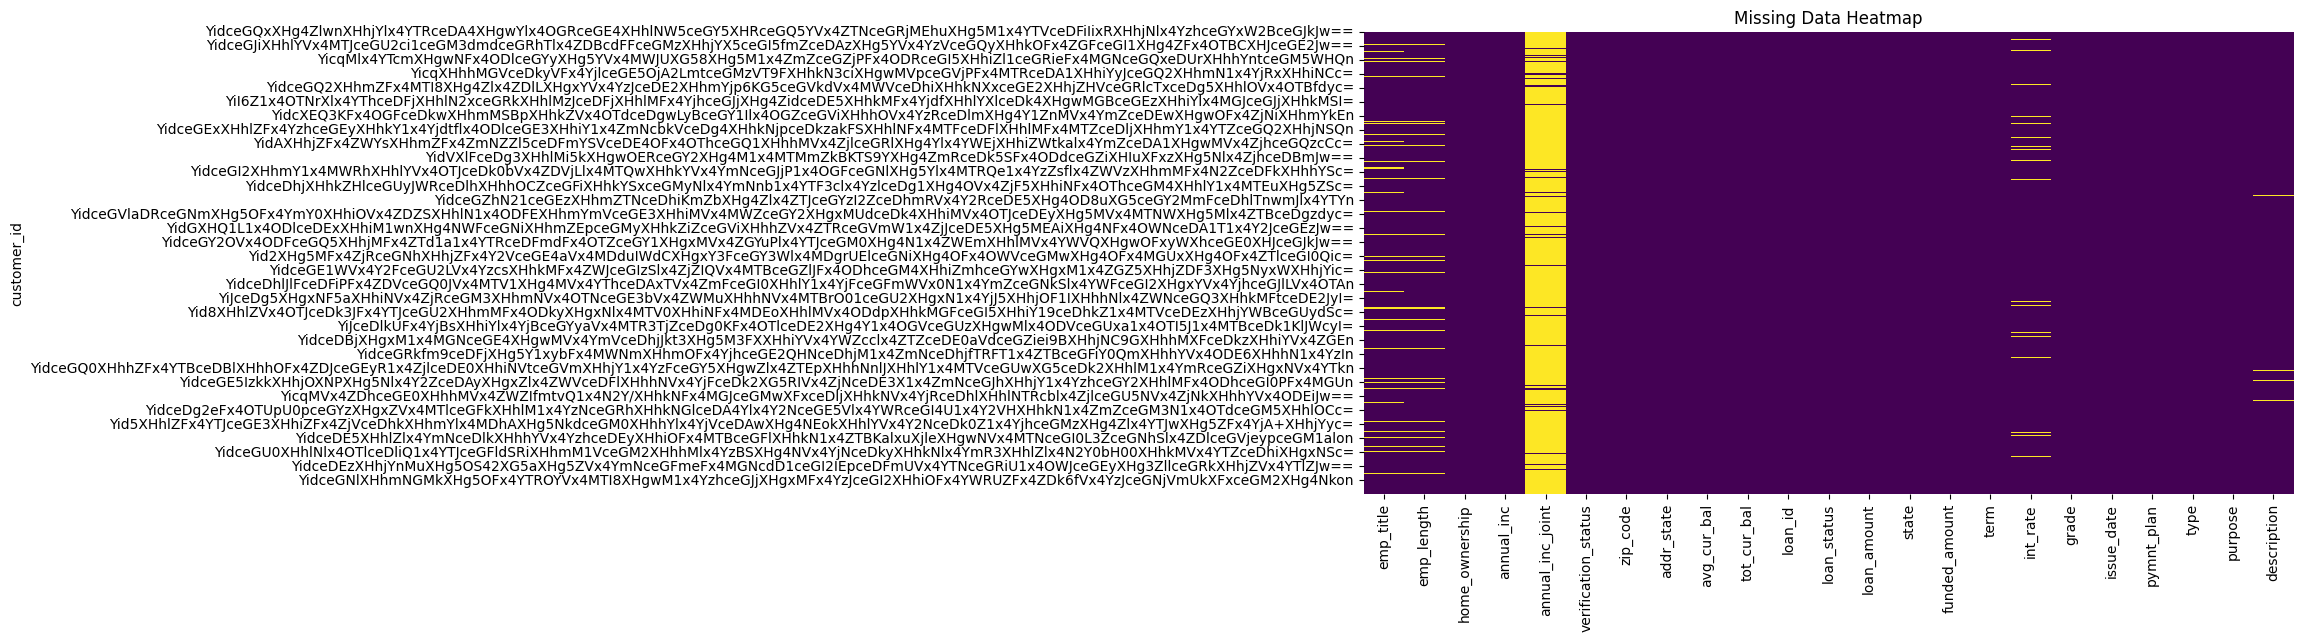

In [96]:
plt.figure(figsize=(12, 6))
sns.heatmap(fintech_data_df_clean.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

### Let's Analyis every missing feature 

# 1. For `annual_inc_joint` (`92.944876%`) is  `MNAR`
 because it directly depends on whether the loan is individual or joint. Since joint income information is irrelevant for individual or direct pay loans, the missing data occurs when such loans are involved.

In [97]:
missing_joint_income_by_type = fintech_data_df_clean.groupby('type')['annual_inc_joint'].apply(lambda x: x.isnull().sum())

total_counts_by_type = fintech_data_df_clean['type'].value_counts()

missing_data_comparison = pd.DataFrame({
    'Total Count': total_counts_by_type,
    'Missing Count': missing_joint_income_by_type
})

missing_data_comparison['Percentage Missing'] = (missing_data_comparison['Missing Count'] / missing_data_comparison['Total Count']) * 100

print(missing_data_comparison)


            Total Count  Missing Count  Percentage Missing
type                                                      
direct_pay           43             43               100.0
individual        25080          25080               100.0
joint                87              0                 0.0
joint_app          1820              0                 0.0


# 2. For `description`(`0.891602%`)is `MCAR`
AS it's optional and not required for loan processing. The missingness does not depend on other factors.

# 3. For `int_rate`(`4.402516%`) is `MAR` 
as it could be missing for loans that have not yet been processed, approved, or loans that might have special conditions according to the `grade` of this loan as there is a high correlation between `grade` and `int_rate`and The chi-square test results  suggests that the missingness of `int_rate `could be related to the `loan amount`, indicating that the missing data mechanism might be classified as MAR 

In [98]:

def calculate_missing_percentage(data, feature):
    missing_count = data.groupby(feature)['int_rate'].apply(lambda x: x.isnull().sum())
    total_count = data[feature].value_counts()
    comparison_df = pd.DataFrame({
        'Total Count': total_count,
        'Missing Count': missing_count
    })
    comparison_df['Percentage Missing'] = (comparison_df['Missing Count'] / comparison_df['Total Count']) * 100
    return comparison_df

missing_by_grade = calculate_missing_percentage(fintech_data_df_clean, 'grade')
print("Missing 'int_rate' by Grade:\n", missing_by_grade)

fintech_data_df_clean['loan_amount_bin'] = pd.cut(fintech_data_df_clean['loan_amount'], bins=[0, 5000, 10000, 20000, 30000, 40000, 50000, np.inf], labels=['0-5k', '5-10k', '10-20k', '20-30k', '30-40k', '40-50k', '50k+'])
missing_by_loan_amount = calculate_missing_percentage(fintech_data_df_clean, 'loan_amount_bin')
print("\nMissing 'int_rate' by Loan Amount Bin:\n", missing_by_loan_amount)

missing_by_home_ownership = calculate_missing_percentage(fintech_data_df_clean, 'home_ownership')
print("\nMissing 'int_rate' by Home Ownership:\n", missing_by_home_ownership)



Missing 'int_rate' by Grade:
        Total Count  Missing Count  Percentage Missing
grade                                                
1             1173             45            3.836317
2             1115             60            5.381166
3             1149             44            3.829417
4             1137             49            4.309587
5             1178             52            4.414261
6             1558             76            4.878049
7             1550             65            4.193548
8             1632             82            5.024510
9             1584             87            5.492424
10            1656             84            5.072464
11            1530             55            3.594771
12            1549             64            4.131698
13            1552             70            4.510309
14            1452             68            4.683196
15            1534             50            3.259452
16             761             38            4.99343

C:\Users\ALLAM\AppData\Local\Temp\ipykernel_43816\3810381812.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  missing_count = data.groupby(feature)['int_rate'].apply(lambda x: x.isnull().sum())


In [99]:
missing_int_rate = fintech_data_df_clean.groupby('grade')['int_rate'].apply(lambda x: x.isnull().sum())

total_counts_by_grade = fintech_data_df_clean['grade'].value_counts()

missing_data_comparison_int_rate = pd.DataFrame({
    'Total Count': total_counts_by_grade,
    'Missing Count': missing_int_rate
})

missing_data_comparison_int_rate['Percentage Missing'] = (missing_data_comparison_int_rate['Missing Count'] / missing_data_comparison_int_rate['Total Count']) * 100

print(missing_data_comparison_int_rate)

       Total Count  Missing Count  Percentage Missing
grade                                                
1             1173             45            3.836317
2             1115             60            5.381166
3             1149             44            3.829417
4             1137             49            4.309587
5             1178             52            4.414261
6             1558             76            4.878049
7             1550             65            4.193548
8             1632             82            5.024510
9             1584             87            5.492424
10            1656             84            5.072464
11            1530             55            3.594771
12            1549             64            4.131698
13            1552             70            4.510309
14            1452             68            4.683196
15            1534             50            3.259452
16             761             38            4.993430
17             728          

In [100]:
missing_int_rate = fintech_data_df_clean.groupby('pymnt_plan')['int_rate'].apply(lambda x: x.isnull().sum())

total_counts_by_pymant_plan = fintech_data_df_clean['pymnt_plan'].value_counts()

missing_data_comparison_int_rate = pd.DataFrame({
    'Total Count': total_counts_by_pymant_plan,
    'Missing Count': missing_int_rate
})

missing_data_comparison_int_rate['Percentage Missing'] = (missing_data_comparison_int_rate['Missing Count'] / missing_data_comparison_int_rate['Total Count']) * 100

print(missing_data_comparison_int_rate)

            Total Count  Missing Count  Percentage Missing
pymnt_plan                                                
False             27026           1190            4.403167
True                  4              0            0.000000


Here we can say that loans that  has `pymnat_plan`equal to `False` has missing `int_rate` values but with very low percent of missing values which leaves us to `MAR` 

In [101]:
missing_int_rate = fintech_data_df_clean.groupby('type')['int_rate'].apply(lambda x: x.isnull().sum())

total_counts_by_type = fintech_data_df_clean['type'].value_counts()

missing_data_comparison_int_rate = pd.DataFrame({
    'Total Count': total_counts_by_type,
    'Missing Count': missing_int_rate
})

missing_data_comparison_int_rate['Percentage Missing'] = (missing_data_comparison_int_rate['Missing Count'] / missing_data_comparison_int_rate['Total Count']) * 100

print(missing_data_comparison_int_rate)

            Total Count  Missing Count  Percentage Missing
type                                                      
direct_pay           43              0            0.000000
individual        25080           1117            4.453748
joint                87              1            1.149425
joint_app          1820             72            3.956044


In [102]:

fintech_data_df_clean['missing_int_rate'] = fintech_data_df_clean['int_rate'].isnull()

cross_tab_grade = pd.crosstab(fintech_data_df_clean['loan_amount'], fintech_data_df_clean['missing_int_rate'])

chi2, p, dof, expected = chi2_contingency(cross_tab_grade)

print(f"Chi-Square Statistic for loan amount vs. Missing int_rate: {chi2}")
print(f"P-value: {p}")


Chi-Square Statistic for loan amount vs. Missing int_rate: 1365.2982941773034
P-value: 0.000589240456643521


# The chi-square test results  
suggests that the missingness of int_rate could be related to the loan amount, indicating that the missing data mechanism might be classified as MAR 

# 4. For `emp_title` (`8.590455%`) is `MNAR` 


In [103]:
bins = [0, 30000, 60000, 100000, 150000, np.inf]
labels = ['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High']
fintech_data_df_clean['income_range_title'] = pd.cut(fintech_data_df_clean['annual_inc'], bins=bins, labels=labels, include_lowest=True)

fintech_data_df_clean['emp_title_missing'] = fintech_data_df_clean['emp_title'].isnull()
contingency_table = pd.crosstab(fintech_data_df_clean['income_range_title'], fintech_data_df_clean['emp_title_missing'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic for emp_title vs. income_range:", chi2_stat)
print("P-value:", p_value)

print("\nContingency Table:")
print(contingency_table)

Chi-Square Statistic for emp_title vs. income_range: 1515.7858523006917
P-value: 0.0

Contingency Table:
emp_title_missing   False  True 
income_range_title              
Low                  1320    601
Medium-Low           9045    955
Medium               9007    522
Medium-High          3722    172
High                 1614     72


The pattern observed suggests Missing Not At Random (MNAR). In MNAR, the probability of a value being missing is related to the unobserved value itself or some other hidden pattern. Here, the likelihood of having a missing emp_title appears to be connected to the income_range, with lower-income individuals having a higher probability of missing job titles.

This relationship indicates that the missingness in emp_title is not random but related to the characteristics of the data itself, such as income level. Therefore, we can categorize this as MNAR, where the missing values are systematically linked to the observed data (income ranges).


# 5. For `emp_length`(`6.799852%`) is `MNAR` 


In [104]:
missing_emp_title = fintech_data_df_clean.groupby('emp_length')['emp_title'].apply(lambda x: x.isnull().sum())

total_counts_by_emp_length = fintech_data_df_clean['emp_length'].value_counts()

missing_data_comparison_int_rate = pd.DataFrame({
    'Total Count': total_counts_by_emp_length,
    'Missing Count': missing_emp_title
})

missing_data_comparison_int_rate['Percentage Missing'] = (missing_data_comparison_int_rate['Missing Count'] / missing_data_comparison_int_rate['Total Count']) * 100

print(missing_data_comparison_int_rate)

            Total Count  Missing Count  Percentage Missing
emp_length                                                
1 year             1780             11            0.617978
10+ years          8878             36            0.405497
2 years            2416             10            0.413907
3 years            2165             14            0.646651
4 years            1587              8            0.504096
5 years            1691              4            0.236546
6 years            1163              5            0.429923
7 years            1036              6            0.579151
8 years            1095              7            0.639269
9 years             920              1            0.108696
< 1 year           2461            391           15.887850


In [105]:
fintech_data_df_clean['emp_length_missing'] = fintech_data_df_clean['emp_length'].isnull()

def categorize_income(income):
    if income < 30000:
        return 'Low'
    elif income < 60000:
        return 'Medium-Low'
    elif income < 90000:
        return 'Medium'
    elif income < 120000:
        return 'Medium-High'
    else:
        return 'High'

fintech_data_df_clean['income_range_length'] = fintech_data_df_clean['annual_inc'].apply(categorize_income)

contingency_table = pd.crosstab(fintech_data_df_clean['emp_length_missing'], fintech_data_df_clean['income_range_length'])

chi2, p_value, _, _ = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic for emp_length vs. income_range: {chi2}")
print(f"P-value: {p_value}")
print("\nContingency Table:")
print(contingency_table)


Chi-Square Statistic for emp_length vs. income_range: 1889.7732872708948
P-value: 0.0

Contingency Table:
income_range_length  High   Low  Medium  Medium-High  Medium-Low
emp_length_missing                                              
False                3838  1062    7898         3830        8564
True                   61   495     380          121         781


This implies that the pattern of missingness in `emp_length` is likely Missing Not at Random (`MNAR`), meaning that the probability of `emp_length` being missing depends on the income range.
This pattern indicates that customers with lower incomes are more likely to have missing employment length data than those with higher incomes.

The results suggest that income level influences the likelihood of having missing `emp_length` data, supporting the conclusion that the missingness is `MNAR`.

## Handling Missing data

# 1. Handling Missing Data for `annual_inc_joint`
Since i have discovered that the `annual_inc_joint` is `MNAR`  because it directly depends on whether the loan is individual or joint. Since joint income information is irrelevant for individual or direct pay loans, the missing data occurs when such loans are involved.

# Impute missing values in 'annual_inc_joint' with zero for MNAR


In [106]:

def imputing_missing_values_annual_inc_joint(df):
    print("> imputing missing values annual_inc_joint")
    df['annual_inc_joint'].fillna(0, inplace=True)
    return df

In [107]:
fintech_data_df_clean = imputing_missing_values_annual_inc_joint(fintech_data_df_clean)

> imputing missing values annual_inc_joint


C:\Users\ALLAM\AppData\Local\Temp\ipykernel_43816\635624986.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['annual_inc_joint'].fillna(0, inplace=True)


In [108]:

missing_values_after = fintech_data_df_clean['annual_inc_joint'].isnull().sum()
print(f"Missing values in 'annual_inc_joint' after imputation: {missing_values_after}")


Missing values in 'annual_inc_joint' after imputation: 0


# 2. Handling Missing values in `description` 
Since i found that the `description` feature has only (`0.891602%`) missing values ,and it's optional , not required for loan processing. The missingness does not depend on other factors. 
So i can deal with it as `MCAR` and Calculate the mode of `description` for each `purpose` group and  Fill missing values in `description` with the mode of `description` for each `purpose`


# Step 1: Visualize data BEFORE imputation (ignoring missing values) for `description`

C:\Users\ALLAM\AppData\Local\Temp\ipykernel_43816\1643626176.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_descriptions.values, y=top_descriptions.index, palette='viridis')


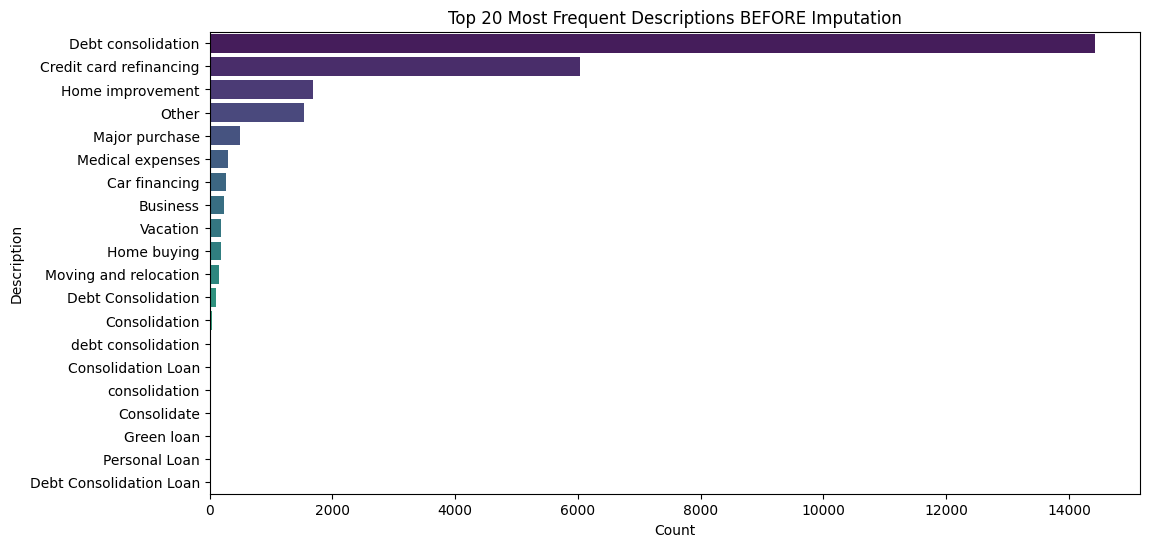

In [109]:
top_n = 20
top_descriptions = fintech_data_df_clean['description'].value_counts().nlargest(top_n)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_descriptions.values, y=top_descriptions.index, palette='viridis')
plt.title(f'Top {top_n} Most Frequent Descriptions BEFORE Imputation')
plt.xlabel('Count')
plt.ylabel('Description')
plt.show()

In [110]:
def imputing_missing_values_description(df ):
  
    mode_per_group = df.groupby('purpose')['description'].transform(lambda x: x.mode()[0] if not x.mode().empty else x.name)
    df['description'].fillna(mode_per_group, inplace=True)
    return df

In [111]:
fintech_data_df_clean=imputing_missing_values_description(fintech_data_df_clean)
print(fintech_data_df_clean)

                                                                         emp_title  \
customer_id                                                                          
YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE...                registered_nurse   
YidPXHg4YSlJXHgwMFx4ZTBcblx4ZDlceGZmW25ceGNjXHg...  financial_readiness_specialist   
YidceGU2XHhiZVx4MTZceGZiXHhlMVx4ZmVceGQ0XHhmYyx...                      sanitation   
YidceGZkXHhkYlx4YWE7XHg4M1x4YzhZXHhkM0R0e1x4ZDZ...                    grant_writer   
YidceGQxXHhlN1x4YjdceGNkXHhiYVx4ZDZceGEyXHgxMSZ...                   asst._manager   
...                                                                            ...   
YidceDkwXHhjNlx4Y2NIXHhlOVx4YTFceGYzXHhhYVx4OGJ...          medical/vascular_tech.   
YiJceDFlXHhkMVx4ZWMnSVx4YjQ3V1hceDg5XHgwMF5ceDA...                     shoe_cutter   
Yic7XHhjZFVceGQyXHhhMVx4YjhceDFhXHhlMEtceGZiXHR...                      crew_chief   
YidpIzxceGViXHhkYVx4ZjdceGZiXHg5YkxeXHhmNmRceDE...    

C:\Users\ALLAM\AppData\Local\Temp\ipykernel_43816\314024060.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['description'].fillna(mode_per_group, inplace=True)


In [112]:

missing_description_count = fintech_data_df_clean['description'].isnull().sum()
print(f"Missing values in 'description' after imputation: {missing_description_count}")



Missing values in 'description' after imputation: 0


# Step 2: Visualize data AFTER imputation for `descritpion`

C:\Users\ALLAM\AppData\Local\Temp\ipykernel_43816\1386789779.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_descriptions.values, y=top_descriptions.index, palette='viridis')


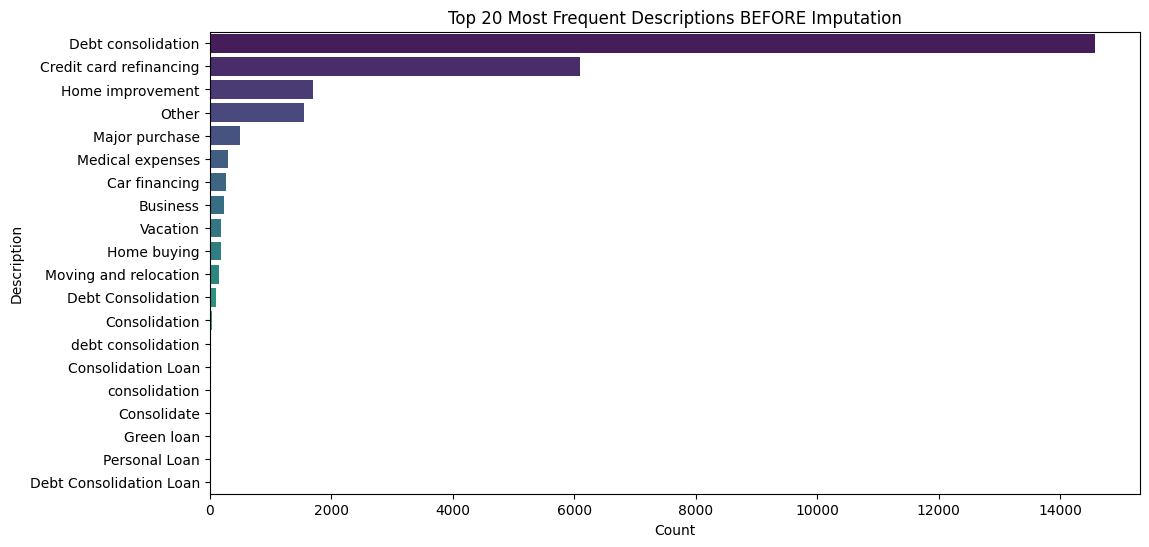

In [113]:
top_n = 20
top_descriptions = fintech_data_df_clean['description'].value_counts().nlargest(top_n)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_descriptions.values, y=top_descriptions.index, palette='viridis')
plt.title(f'Top {top_n} Most Frequent Descriptions BEFORE Imputation')
plt.xlabel('Count')
plt.ylabel('Description')
plt.show()

# 3. Handling Missing data in `int_rate` 
Since `int_rate`is missing only with (`4.402516%`)  as it could be missing for loans that have not yet been processed, approved, or loans that might have special conditions due to high correlation with `grade` , so it can be `MAR` and we can impute the missing values with groupby the `grade` for mean of `int_rate` for each grade and then define a function to fill missing `int_rat` values based on the mode of `int_rate` for each `grade`

In [114]:
average_int_rate_by_grade = fintech_data_df_clean.groupby('grade')['int_rate'].mean()

print(average_int_rate_by_grade)
print(fintech_data_df_clean.columns)

grade
1     0.072558
2     0.072199
3     0.072559
4     0.072809
5     0.072412
6     0.108535
7     0.108516
8     0.108911
9     0.108538
10    0.108454
11    0.144042
12    0.144358
13    0.144300
14    0.143803
15    0.143958
16    0.188831
17    0.189146
18    0.187777
19    0.187785
20    0.188055
21    0.221361
22    0.219448
23    0.221419
24    0.219208
25    0.220911
26    0.256356
27    0.259697
28    0.257007
29    0.260357
30    0.261477
31    0.280350
32    0.285214
33    0.277478
34    0.278590
35    0.288267
Name: int_rate, dtype: float64
Index(['emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'annual_inc_joint', 'verification_status', 'zip_code', 'addr_state',
       'avg_cur_bal', 'tot_cur_bal', 'loan_id', 'loan_status', 'loan_amount',
       'state', 'funded_amount', 'term', 'int_rate', 'grade', 'issue_date',
       'pymnt_plan', 'type', 'purpose', 'description', 'loan_amount_bin',
       'missing_int_rate', 'income_range_title', 'emp_title_missing'

# Step 1: Visualize `int_rate` BEFORE imputation (drop missing values)

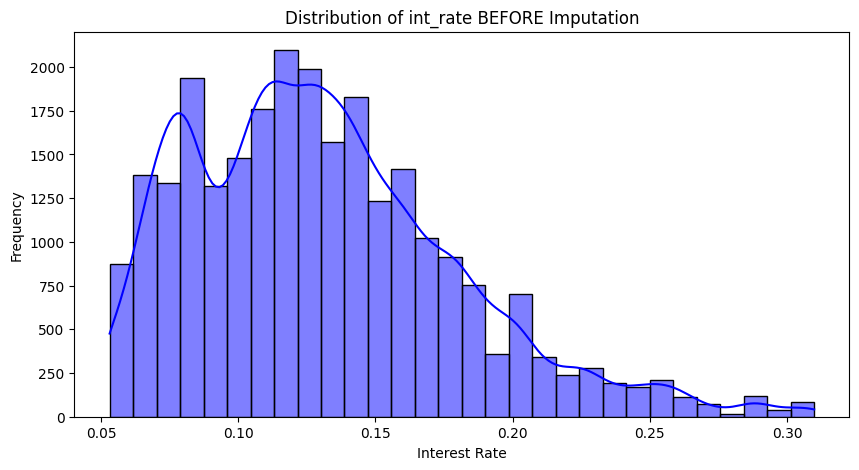

In [115]:
plt.figure(figsize=(10, 5))
sns.histplot(fintech_data_df_clean['int_rate'].dropna(), kde=True, color='blue', bins=30)
plt.title('Distribution of int_rate BEFORE Imputation')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

In [116]:

def imputing_missing_values_int_rate(df):

    mode_per_group = df.groupby('grade')['int_rate'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)
    df['int_rate'] = df.apply(lambda row: mode_per_group[row['grade']] if pd.isna(row['int_rate']) else row['int_rate'], axis=1)
    return df

In [117]:
fintech_data_df_clean=imputing_missing_values_int_rate(fintech_data_df_clean)

In [118]:

missing_int_rate_count = fintech_data_df_clean['int_rate'].isnull().sum()
print(f"Missing values in 'int_rate' after imputation: {missing_int_rate_count}")

Missing values in 'int_rate' after imputation: 0


# Step 2: Visualize `int_rate` AFTER imputation (including filled values)

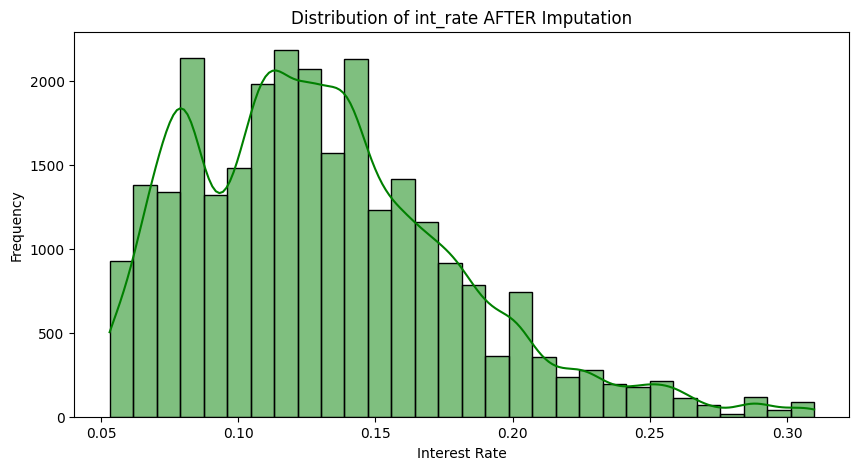

In [119]:
plt.figure(figsize=(10, 5))
sns.histplot(fintech_data_df_clean['int_rate'], kde=True, color='green', bins=30)
plt.title('Distribution of int_rate AFTER Imputation')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

# 4. Handling Missing data in `emp_title`
Calculate Income Ranges (income_range_per_title):
Group by emp_title and calculate min, max, and avg income for each job title.
Find the Closest emp_title (find_closest_title function):
This function takes an annual_income value and finds the job title with the closest average income range.
Impute Missing Values:
Using the vectorization , If emp_title is missing, use the find_closest_title function to determine the closest matching job title based on annual_inc.

In [120]:

# def imputing_missing_values_emp_title(df):

#     # annual_income_col = 'annual_inc'
#     # emp_title_col = 'emp_title'

#     # income_ranges = df.groupby(emp_title_col)[annual_income_col].agg(['min', 'max'])
#     # income_ranges['avg'] = (income_ranges['min'] + income_ranges['max']) / 2

#     # missing_emp_title_mask = df[emp_title_col].isna()
    
#     # if missing_emp_title_mask.any():
#     #     diff = np.abs(df.loc[missing_emp_title_mask, annual_income_col].values[:, None] - income_ranges['avg'].values)
#     #     closest_idx = diff.argmin(axis=1)
#     #     closest_titles = income_ranges.iloc[closest_idx].index
        
#     #     df.loc[missing_emp_title_mask, emp_title_col] = pd.Series(closest_titles, index=df.loc[missing_emp_title_mask].index)
    
#     # return df

In [121]:

def imputing_missing_values_emp_title(df):
    print("> Imputing missing values for emp_title")
    
    annual_income_col = 'annual_inc'
    emp_title_col = 'emp_title'
    # Step 1: Fill missing emp_title values by grouping by each unique annual_inc and using the mode of emp_title within that group
    emp_title_mode_by_income = df.groupby(annual_income_col)[emp_title_col].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    missing_emp_title_mask = df[emp_title_col].isna()
    df.loc[missing_emp_title_mask, emp_title_col] = df.loc[missing_emp_title_mask, annual_income_col].map(emp_title_mode_by_income)
    # Step 2: Identify any remaining missing emp_title values
    remaining_missing_mask = df[emp_title_col].isna()
    # Step 3: For remaining missing values, define income bins and calculate mode within each bin
    income_bin_width = 10000
    income_bins = pd.cut(df[annual_income_col], bins=np.arange(0, df[annual_income_col].max() + income_bin_width, income_bin_width))
    emp_title_mode_by_income_bin = df.groupby(income_bins, observed=False)[emp_title_col].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    
    df.loc[remaining_missing_mask, emp_title_col] = df.loc[remaining_missing_mask, annual_income_col].apply(
        lambda x: emp_title_mode_by_income_bin[income_bins[df[annual_income_col] == x].values[0]]
    )
    remaining_missing_mask = df[emp_title_col].isna()
    if remaining_missing_mask.any():
        common_emp_title = df[emp_title_col].mode().iloc[0]
        df.loc[remaining_missing_mask, emp_title_col] = common_emp_title
    return df


In [122]:
fintech_data_df_clean = imputing_missing_values_emp_title(fintech_data_df_clean)


> Imputing missing values for emp_title


In [123]:

missing_emp_title_count = fintech_data_df_clean['emp_title'].isnull().sum()
print(f"Missing values in 'emp_title' after imputation: {missing_emp_title_count}")

Missing values in 'emp_title' after imputation: 0


# 5. Handling Missing Data in `emp_length`
Using the `emp_title`  , i will use mode value for `emp_length` for these feature to impute with.

In [ ]:
def imputing_missing_values_emp_length(df):
    mode_emp_length_by_title = df.groupby('emp_title')['emp_length'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
    df['emp_length'] = df['emp_length'].fillna(df['emp_title'].map(mode_emp_length_by_title))

    return df


In [125]:
fintech_data_df_clean = imputing_missing_values_emp_length(fintech_data_df_clean)

In [126]:
missing_emp_length_count = fintech_data_df_clean['emp_length'].isnull()
print(f"Missing values in 'emp_length' after imputation: {missing_emp_length_count}")
fintech_data_df_clean[fintech_data_df_clean['emp_length'].isnull()]

Missing values in 'emp_length' after imputation: customer_id
YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE4XHhlNW5ceGY5XHRceGQ5YVx4ZTNceGRjMEhuXHg5M1x4YTVceDFiIixRXHhjNlx4YzhceGYxW2BceGJkJw==        False
YidPXHg4YSlJXHgwMFx4ZTBcblx4ZDlceGZmW25ceGNjXHg4MFx4OGFceGM2P1x4OGFceDg0XHhjNERceDFjZlx4OTFceDBlXHgxMEJceGVkXHg3Zlx4ODJceDliXHhiZlx4OTMn    False
YidceGU2XHhiZVx4MTZceGZiXHhlMVx4ZmVceGQ0XHhmYyxceGM3XHhlYWg1XHgxYlx4MTJceDEyXHhlNmtceDAzZUQpY1x4ZTdceGQwXHg5YVx4YzdRKT1XMCc=                False
YidceGZkXHhkYlx4YWE7XHg4M1x4YzhZXHhkM0R0e1x4ZDZceDFmXHg5NVx4MDB1XHhmOFx4ZTIjXHhkNlx4ZjNceDk4WVFceGQzXHg5OVx4YjdceGMySTBceGI3ZCc=            False
YidceGQxXHhlN1x4YjdceGNkXHhiYVx4ZDZceGEyXHgxMSZ5XHhlNjZQXFx6XHg4MVx4MDNCflx4YmFpXHhlM1x4MGZceDllXHhmN19ceGZjc1x4OWVPcywn                    False
                                                                                                                                            ...  
YidceDkwXHhjNlx4Y2NIXHhlOVx4YTFceGYzXHhhYVx4OGJHXHg5N3ZceGVjXHh

emp_title emp_length  \
customer_id                                                                
YidceDEwXHgwM19ceDg2KV5ceGYxXHg4Ylx4ZmFceDk2XHh...       cook        NaN   
YidceGRlXHhlNDliXHhiN1x4YzZPXHhmYWJ1XHhjOFx4MTd...  attendant        NaN   
YidceGVhRVx4YzN0XHhkZFx4ZGFLXHhhZV81VVx4YzBceGN...    manager        NaN   
YidceDg0XHhiZiJceDFkXHg4NGRceDg1WkhceGE3V1x4ZDZ...    manager        NaN   
YidceGFjflx4YTheVFx4YmEtXHg4OVx4YmNGa1x4YjJceGF...       cook        NaN   
...                                                       ...        ...   
YicqXHhjZVx4ZmNceGRkXHhiMyJ+XHhiZVx4MTEgXHhmZlx...    manager        NaN   
YidgXHhhMDRceGYyXHhkNltceDExeVx4YWZWXHhiZlx4MWN...    teacher        NaN   
YiJceGY4XHhiMUhceDk3XHhjOVx4OWRceGVhMC1dWydceDh...    manager        NaN   
YidceGYyXHgwZXRceDgzVVx4ZTBceDBjY1x4MDNyXHhmOFx...    teacher        NaN   
YidceGMxfFx4ZDZceDA1XHhjNklceGVjZlx4YWRceGZhXHh...       cook        NaN   

                                                   home_ownership  annual_inc  \
customer_id                                                                     
YidceDEwXHgwM19ceDg2KV5ceGYxXHg4Ylx4ZmFceDk2XHh...           RENT     16344.0   
YidceGRlXHhlNDliXHhiN1x4YzZPXHhmYWJ1XHhjOFx4MTd...            OWN      9517.0   
YidceGVhRVx4YzN0XHhkZFx4ZGFLXHhhZV81VVx4YzBceGN...       MORTGAGE     36266.0   
YidceDg0XHhiZiJceDFkXHg4NGRceDg1WkhceGE3V1x4ZDZ...           RENT     20076.0   
YidceGFjflx4YTheVFx4YmEtXHg4OVx4YmNGa1x4YjJceGF...            OWN     16100.0   
...                                                           ...         ...   
YicqXHhjZVx4ZmNceGRkXHhiMyJ+XHhiZVx4MTEgXHhmZlx...       MORTGAGE     27624.0   
YidgXHhhMDRceGYyXHhkNltceDExeVx4YWZWXHhiZlx4MWN...       MORTGAGE     59376.0   
YiJceGY4XHhiMUhceDk3XHhjOVx4OWRceGVhMC1dWydceDh...            OWN     39984.0   
YidceGYyXHgwZXRceDgzVVx4ZTBceDBjY1x4MDNyXHhmOFx...       MORTGAGE     79825.0   
YidceGMxfFx4ZDZceDA1XHhjNklceGVjZlx4YWRceGZhXHh...           RENT     15156.0   

                                                    annual_inc_joint  \
customer_id                                                            
YidceDEwXHgwM19ceDg2KV5ceGYxXHg4Ylx4ZmFceDk2XHh...          103564.0   
YidceGRlXHhlNDliXHhiN1x4YzZPXHhmYWJ1XHhjOFx4MTd...               0.0   
YidceGVhRVx4YzN0XHhkZFx4ZGFLXHhhZV81VVx4YzBceGN...               0.0   
YidceDg0XHhiZiJceDFkXHg4NGRceDg1WkhceGE3V1x4ZDZ...               0.0   
YidceGFjflx4YTheVFx4YmEtXHg4OVx4YmNGa1x4YjJceGF...               0.0   
...                                                              ...   
YicqXHhjZVx4ZmNceGRkXHhiMyJ+XHhiZVx4MTEgXHhmZlx...               0.0   
YidgXHhhMDRceGYyXHhkNltceDExeVx4YWZWXHhiZlx4MWN...               0.0   
YiJceGY4XHhiMUhceDk3XHhjOVx4OWRceGVhMC1dWydceDh...               0.0   
YidceGYyXHgwZXRceDgzVVx4ZTBceDBjY1x4MDNyXHhmOFx...          115046.0   
YidceGMxfFx4ZDZceDA1XHhjNklceGVjZlx4YWRceGZhXHh...               0.0   

                                                   verification_status  \
customer_id                                                              
YidceDEwXHgwM19ceDg2KV5ceGYxXHg4Ylx4ZmFceDk2XHh...            Verified   
YidceGRlXHhlNDliXHhiN1x4YzZPXHhmYWJ1XHhjOFx4MTd...            Verified   
YidceGVhRVx4YzN0XHhkZFx4ZGFLXHhhZV81VVx4YzBceGN...        Not Verified   
YidceDg0XHhiZiJceDFkXHg4NGRceDg1WkhceGE3V1x4ZDZ...            Verified   
YidceGFjflx4YTheVFx4YmEtXHg4OVx4YmNGa1x4YjJceGF...        Not Verified   
...                                                                ...   
YicqXHhjZVx4ZmNceGRkXHhiMyJ+XHhiZVx4MTEgXHhmZlx...            Verified   
YidgXHhhMDRceGYyXHhkNltceDExeVx4YWZWXHhiZlx4MWN...            Verified   
YiJceGY4XHhiMUhceDk3XHhjOVx4OWRceGVhMC1dWydceDh...            Verified   
YidceGYyXHgwZXRceDgzVVx4ZTBceDBjY1x4MDNyXHhmOFx...        Not Verified   
YidceGMxfFx4ZDZceDA1XHhjNklceGVjZlx4YWRceGZhXHh...        Not Verified   

                                                   zip_code addr_state  \
customer_id                        

In [130]:
missing_emp_length_count = fintech_data_df_clean['emp_length'].isnull().sum()
print(f"Missing values in 'emp_length' after imputation: {missing_emp_length_count}")

Missing values in 'emp_length' after imputation: 2


# Here i wanted to handled the two null values that was remaining `motor_vehicle_rep` and `licensed` 
by finding the original values from dataset and choose the mode representation for it 

In [122]:
filtered_rows = fintech_data_df_clean[
    fintech_data_df_clean['emp_title'].str.contains('motor_vehicle_rep', case=False, na=False) |
    fintech_data_df_clean['emp_title'].str.contains('licensed', case=False, na=False)
]

print(filtered_rows)

                                                                                   emp_title  \
customer_id                                                                                    
Yid2XHhmM05ceGZjZ1x4OGUjPVx4MGN9XHhkOFwnXHhlMD5...                 licensed_vocational_nurse   
YiJceDBiXHhlMElceDgzXHgwZlx4YjBceGM3XHhhNVx4YTl...                         licensed_optician   
YidceDExXHhlZVx4OGRceDliXHhkNlx4Y2RXbj1ceGYyXHh...                   licensed_representative   
YidceDAyXHg5NnpceGZhXHhmMVolXHgxY1x4ZWJceGE1XHh...              motor_vehicle_representative   
Yic2XHhjNlx4ZGVcXFx4ZWNQXHhiMVx4YjlqXHgwMlx4YjZ...                         motor_vehicle_rep   
YidceDE3XHhkYVx4ZGJceDliWCNceDgwXHg5ZDslXHhmNVx...                                  licensed   
Yid4dV5ceGQ5XHhhN1x4ZDh4XHhjZGJceDE1XHhkMHxceGM...                 licensed_vocational_nurse   
YicqXHg5Mlx4OTlceGU5XHhjOTpceGUwXHg4Nlx4YjJceGI...              motor_vehicle_representative   
YidnIFx4ZjJceGUwXHhjOWNceDE2PEozKnpceGRl

In [123]:
fintech_data_df_clean['emp_title'] = fintech_data_df_clean['emp_title'].replace('motor_vehicle_rep', 'motor_vehicle_representative')

In [124]:
licensed_titles = fintech_data_df_clean[fintech_data_df_clean['emp_title'].str.contains('licensed', case=False, na=False)]
most_frequent_licensed_title = licensed_titles['emp_title'].mode()[0]
fintech_data_df_clean['emp_title'] = fintech_data_df_clean['emp_title'].replace('licensed', most_frequent_licensed_title)
print(f"Most frequent 'emp_title' containing 'licensed': {most_frequent_licensed_title}")


Most frequent 'emp_title' containing 'licensed': licensed_vocational_nurse


In [125]:
fintech_data_df_clean[fintech_data_df_clean['emp_length'].isnull()]

emp_title  \
customer_id                                                                        
Yic2XHhjNlx4ZGVcXFx4ZWNQXHhiMVx4YjlqXHgwMlx4YjZ...  motor_vehicle_representative   
YidceDE3XHhkYVx4ZGJceDliWCNceDgwXHg5ZDslXHhmNVx...     licensed_vocational_nurse   

                                                   emp_length home_ownership  \
customer_id                                                                    
Yic2XHhjNlx4ZGVcXFx4ZWNQXHhiMVx4YjlqXHgwMlx4YjZ...        NaN           RENT   
YidceDE3XHhkYVx4ZGJceDliWCNceDgwXHg5ZDslXHhmNVx...        NaN            OWN   

                                                    annual_inc  \
customer_id                                                      
Yic2XHhjNlx4ZGVcXFx4ZWNQXHhiMVx4YjlqXHgwMlx4YjZ...     61000.0   
YidceDE3XHhkYVx4ZGJceDliWCNceDgwXHg5ZDslXHhmNVx...    100000.0   

                                                    annual_inc_joint  \
customer_id                                                            
Yic2XHhjNlx4ZGVcXFx4ZWNQXHhiMVx4YjlqXHgwMlx4YjZ...               0.0   
YidceDE3XHhkYVx4ZGJceDliWCNceDgwXHg5ZDslXHhmNVx...               0.0   

                                                   verification_status  \
customer_id                                                              
Yic2XHhjNlx4ZGVcXFx4ZWNQXHhiMVx4YjlqXHgwMlx4YjZ...        Not Verified   
YidceDE3XHhkYVx4ZGJceDliWCNceDgwXHg5ZDslXHhmNVx...            Verified   

                                                   zip_code addr_state  \
customer_id                                                              
Yic2XHhjNlx4ZGVcXFx4ZWNQXHhiMVx4YjlqXHgwMlx4YjZ...    912xx         CA   
YidceDE3XHhkYVx4ZGJceDliWCNceDgwXHg5ZDslXHhmNVx...    028xx         RI   

                                                    avg_cur_bal  tot_cur_bal  \
customer_id                                                                    
Yic2XHhjNlx4ZGVcXFx4ZWNQXHhiMVx4YjlqXHgwMlx4YjZ...       1643.0      18070.0   
YidceDE3XHhkYVx4ZGJceDliWCNceDgwXHg5ZDslXHhmNVx...      26144.0     261441.0   

                                                    ...  pymnt_plan  \
customer_id                                         ...               
Yic2XHhjNlx4ZGVcXFx4ZWNQXHhiMVx4YjlqXHgwMlx4YjZ...  ...       False   
YidceDE3XHhkYVx4ZGJceDliWCNceDgwXHg5ZDslXHhmNVx...  ...       False   

                                                          type  \
customer_id                                                      
Yic2XHhjNlx4ZGVcXFx4ZWNQXHhiMVx4YjlqXHgwMlx4YjZ...  individual   
YidceDE3XHhkYVx4ZGJceDliWCNceDgwXHg5ZDslXHhmNVx...  individual   

                                                               purpose  \
customer_id                                                              
Yic2XHhjNlx4ZGVcXFx4ZWNQXHhiMVx4YjlqXHgwMlx4YjZ...  debt_consolidation   
YidceDE3XHhkYVx4ZGJceDliWCNceDgwXHg5ZDslXHhmNVx...  debt_consolidation   

                                                           description  \
customer_id                                                              
Yic2XHhjNlx4ZGVcXFx4ZWNQXHhiMVx4YjlqXHgwMlx4YjZ...  Debt consolidation   
YidceDE3XHhkYVx4ZGJceDliWCNceDgwXHg5ZDslXHhmNVx...  Debt consolidation   

                                                    loan_amount_bin  \
customer_id                                                           
Yic2XHhjNlx4ZGVcXFx4ZWNQXHhiMVx4YjlqXHgwMlx4YjZ...           10-20k   
YidceDE3XHhkYVx4ZGJceDliWCNceDgwXHg5ZDslXHhmNVx...           20-30k   

                                                   missing_int_rate  \
customer_id                                                           
Yic2XHhjNlx4ZGVcXFx4ZWNQXHhiMVx4YjlqXHgwMlx4YjZ...            False   
YidceDE3XHhkYVx4ZGJceDliWCNceDgwXHg5ZDslXHhmNVx...            False   

                                                    income_range_title  \
customer_id                                                              
Yic2XHhjNlx4ZGVcXFx4ZWNQXHhiMVx4YjlqXHgwMlx4YjZ...              Medium   
YidceDE3

In [126]:
mode_emp_length_by_title = fintech_data_df_clean.groupby('emp_title')['emp_length'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

fintech_data_df_clean['emp_length'] = fintech_data_df_clean['emp_length'].fillna(fintech_data_df_clean['emp_title'].map(mode_emp_length_by_title))
missing_emp_length_count = fintech_data_df_clean['emp_length'].isnull()
print(f"Missing values in 'emp_length' after imputation: {missing_emp_length_count}")
fintech_data_df_clean[fintech_data_df_clean['emp_length'].isnull()]

Missing values in 'emp_length' after imputation: customer_id
YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE4XHhlNW5ceGY5XHRceGQ5YVx4ZTNceGRjMEhuXHg5M1x4YTVceDFiIixRXHhjNlx4YzhceGYxW2BceGJkJw==        False
YidPXHg4YSlJXHgwMFx4ZTBcblx4ZDlceGZmW25ceGNjXHg4MFx4OGFceGM2P1x4OGFceDg0XHhjNERceDFjZlx4OTFceDBlXHgxMEJceGVkXHg3Zlx4ODJceDliXHhiZlx4OTMn    False
YidceGU2XHhiZVx4MTZceGZiXHhlMVx4ZmVceGQ0XHhmYyxceGM3XHhlYWg1XHgxYlx4MTJceDEyXHhlNmtceDAzZUQpY1x4ZTdceGQwXHg5YVx4YzdRKT1XMCc=                False
YidceGZkXHhkYlx4YWE7XHg4M1x4YzhZXHhkM0R0e1x4ZDZceDFmXHg5NVx4MDB1XHhmOFx4ZTIjXHhkNlx4ZjNceDk4WVFceGQzXHg5OVx4YjdceGMySTBceGI3ZCc=            False
YidceGQxXHhlN1x4YjdceGNkXHhiYVx4ZDZceGEyXHgxMSZ5XHhlNjZQXFx6XHg4MVx4MDNCflx4YmFpXHhlM1x4MGZceDllXHhmN19ceGZjc1x4OWVPcywn                    False
                                                                                                                                            ...  
YidceDkwXHhjNlx4Y2NIXHhlOVx4YTFceGYzXHhhYVx4OGJHXHg5N3ZceGVjXHh

Empty DataFrame
Columns: [emp_title, emp_length, home_ownership, annual_inc, annual_inc_joint, verification_status, zip_code, addr_state, avg_cur_bal, tot_cur_bal, loan_id, loan_status, loan_amount, state, funded_amount, term, int_rate, grade, issue_date, pymnt_plan, type, purpose, description, loan_amount_bin, missing_int_rate, income_range_title, emp_title_missing, emp_length_missing, income_range_length]
Index: []

[0 rows x 29 columns]

In [127]:
fintech_data_df_clean[fintech_data_df_clean['emp_length'].isnull()]

Empty DataFrame
Columns: [emp_title, emp_length, home_ownership, annual_inc, annual_inc_joint, verification_status, zip_code, addr_state, avg_cur_bal, tot_cur_bal, loan_id, loan_status, loan_amount, state, funded_amount, term, int_rate, grade, issue_date, pymnt_plan, type, purpose, description, loan_amount_bin, missing_int_rate, income_range_title, emp_title_missing, emp_length_missing, income_range_length]
Index: []

[0 rows x 29 columns]

# Create a new column called `emp_length_years` that represents the number of years from the `emp_length` values

In [ ]:
def map_emp_length_to_years_numeric(df):
    emp_length_mapping = {
        '10+ years': 11,
        '< 1 year': 0.5
    }

    for i in range(1, 10):
        emp_length_mapping[f'{i} years'] = float(i)

    df['emp_length_years'] = df['emp_length'].map(emp_length_mapping)
    return df

In [129]:
fintech_data_df_clean= map_emp_length_to_years_numeric(fintech_data_df_clean)


In [130]:

print(fintech_data_df_clean[['emp_length', 'emp_length_years']].head(10))
print(fintech_data_df_clean['emp_length_years'].isnull().sum())

                                                   emp_length  \
customer_id                                                     
YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE...    8 years   
YidPXHg4YSlJXHgwMFx4ZTBcblx4ZDlceGZmW25ceGNjXHg...  10+ years   
YidceGU2XHhiZVx4MTZceGZiXHhlMVx4ZmVceGQ0XHhmYyx...    3 years   
YidceGZkXHhkYlx4YWE7XHg4M1x4YzhZXHhkM0R0e1x4ZDZ...    4 years   
YidceGQxXHhlN1x4YjdceGNkXHhiYVx4ZDZceGEyXHgxMSZ...    2 years   
YidceDE2fVx4YjhQX1x4ZDJceGQ4XHgwYiNceGM3XHg5OVx...  10+ years   
YidceDgwXHgxMlx4YzhoXHg4MXRceGNmJVx4OTRceGY0alx...  10+ years   
YidceDlkVlx4ZmJceDg0XHhiZXpcdFx4ZjdceGIyXHhmNFx...    8 years   
YidceDE5c1RceGM5OFx4ZmZceGI0VTEwVlx4YjZlTWZceGV...   < 1 year   
YiciXHhlZjV8elx4MGJrJThceDFleFx4ZmZceDg4XHg5MFx...    9 years   

                                                    emp_length_years  
customer_id                                                           
YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE...               8.0  
YidPXH

## Findings and conclusions

# Observing Missing Data 
1. Here we can see that only `emp_title` , `emp_length` , `annual_inc_joint` , `int_rate` and `description` has null values
2. For `annual_inc_joint` (`92.944876%`) is  `MNAR`
 because it directly depends on whether the loan is individual or joint. Since joint income information is irrelevant for individual or direct pay loans, the missing data occurs when such loans are involved.
3.  For `description`(`0.891602%`)is `MCAR`
AS it's optional and not required for loan processing. The missingness does not depend on other factors.
4. For `int_rate`(`4.402516%`) is `MAR` 
as it could be missing for loans that have not yet been processed, approved, or loans that might have special conditions according to the `grade` of this loan as there is a high correlation between `grade` and `int_rate`and The chi-square test results  suggests that the missingness of `int_rate `could be related to the `loan amount`, indicating that the missing data mechanism might be classified as MAR 
5.  For `emp_title` (`8.590455%`) is `MNAR` 
The pattern observed suggests Missing Not At Random (MNAR). In MNAR, the probability of a value being missing is related to the unobserved value itself or some other hidden pattern. Here, the likelihood of having a missing emp_title appears to be connected to the income_range, with lower-income individuals having a higher probability of missing job titles.
This relationship indicates that the missingness in emp_title is not random but related to the characteristics of the data itself, such as income level. Therefore, we can categorize this as MNAR, where the missing values are systematically linked to the observed data (income ranges).

6.  For `emp_length`(`6.799852%`) is `MNAR` 
This implies that the pattern of missingness in `emp_length` is likely Missing Not at Random (`MNAR`), meaning that the probability of `emp_length` being missing depends on the income range.
This pattern indicates that customers with lower incomes are more likely to have missing employment length data than those with higher incomes.

The results suggest that income level influences the likelihood of having missing `emp_length` data, supporting the conclusion that the missingness is `MNAR`.

# Handling Missing Data 
1.  Handling Missing Data for `annual_inc_joint`
Since i have discovered that the `annual_inc_joint` is `MNAR`  because it directly depends on whether the loan is individual or joint. Since joint income information is irrelevant for individual or direct pay loans, the missing data occurs when such loans are involved.
Impute missing values in `annual_inc_joint` with zero for MNAR


2.  Handling Missing values in `description` 
Since i found that the `description` feature has only (`0.891602%`) missing values ,and it's optional , not required for loan processing. The missingness does not depend on other factors. 
So i can deal with it as `MCAR` and Calculate the mode of `description` for each `purpose` group and  Fill missing values in `description` with the mode of `description` for each `purpose`

3.  Handling Missing data in `int_rate` 
Since `int_rate`is missing only with (`4.402516%`)  as it could be missing for loans that have not yet been processed, approved, or loans that might have special conditions due to high correlation with `grade` , so it can be `MAR` and we can impute the missing values with groupby the `grade` for mean of `int_rate` for each grade and then define a function to fill missing `int_rat` values based on the mode of `int_rate` for each `grade`

4.  Handling Missing data in `emp_title`
Calculate Income Ranges (income_range_per_title):
Group by emp_title and calculate min, max, and avg income for each job title.
Find the Closest emp_title (find_closest_title function):
This function takes an annual_income value and finds the job title with the closest average income range.
Impute Missing Values:
Using the vectorization , If emp_title is missing, use the find_closest_title function to determine the closest matching job title based on annual_inc.

5.  Handling Missing Data in `emp_length`
Using the `emp_title` after imputation for the missing values , i will use mode value for `emp_length` for these feature to impute with.

6. create a new column called `emp_length_years` that represents the number of years from the `emp_length` values

7.  Here i wanted to handled the two null values that was remaining `motor_vehicle_rep` and `licensed` which was `emp_title` values  for missing `emp_length` by finding the original values from dataset and choose the mode representation for it 

8.  Dropping `emp_length`



# Detecting Outliers 

# visualize the distribution of all numeric columns in the DataFrame
To see more and detect outliers

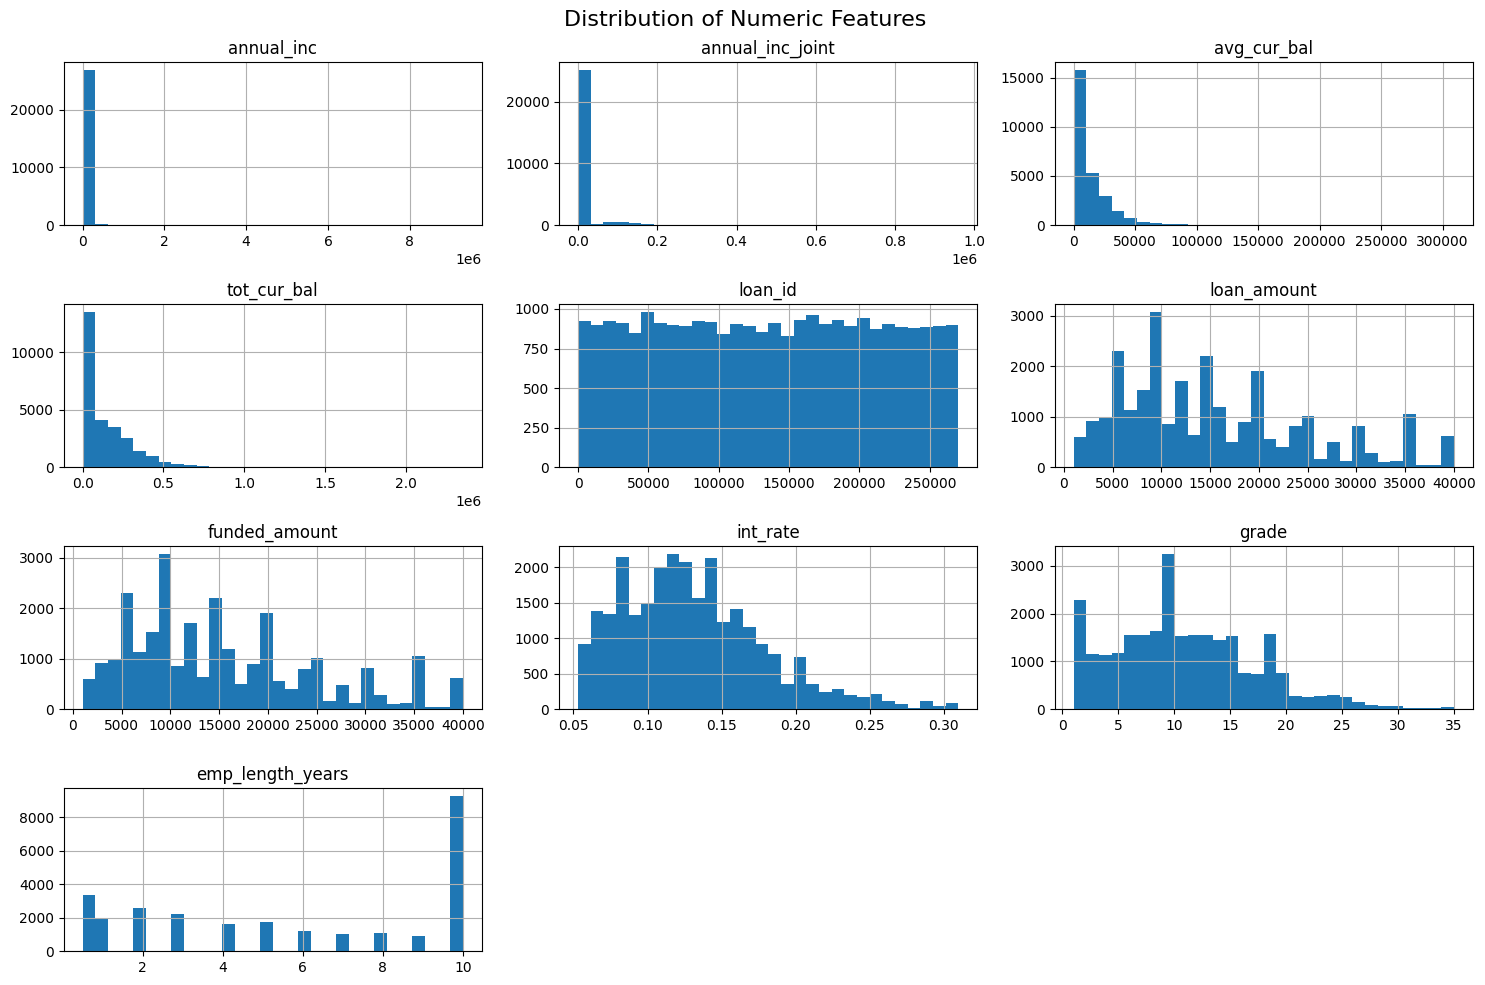

In [131]:
numeric_columns = fintech_data_df_clean.select_dtypes(include=['number'])
numeric_columns.hist(bins=30, figsize=(15, 10), layout=(int(np.ceil(len(numeric_columns.columns) / 3)), 3))
plt.suptitle('Distribution of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()


# Plot histograms with KDE (Kernel Density Estimation) for all numeric features in a DataFrame,

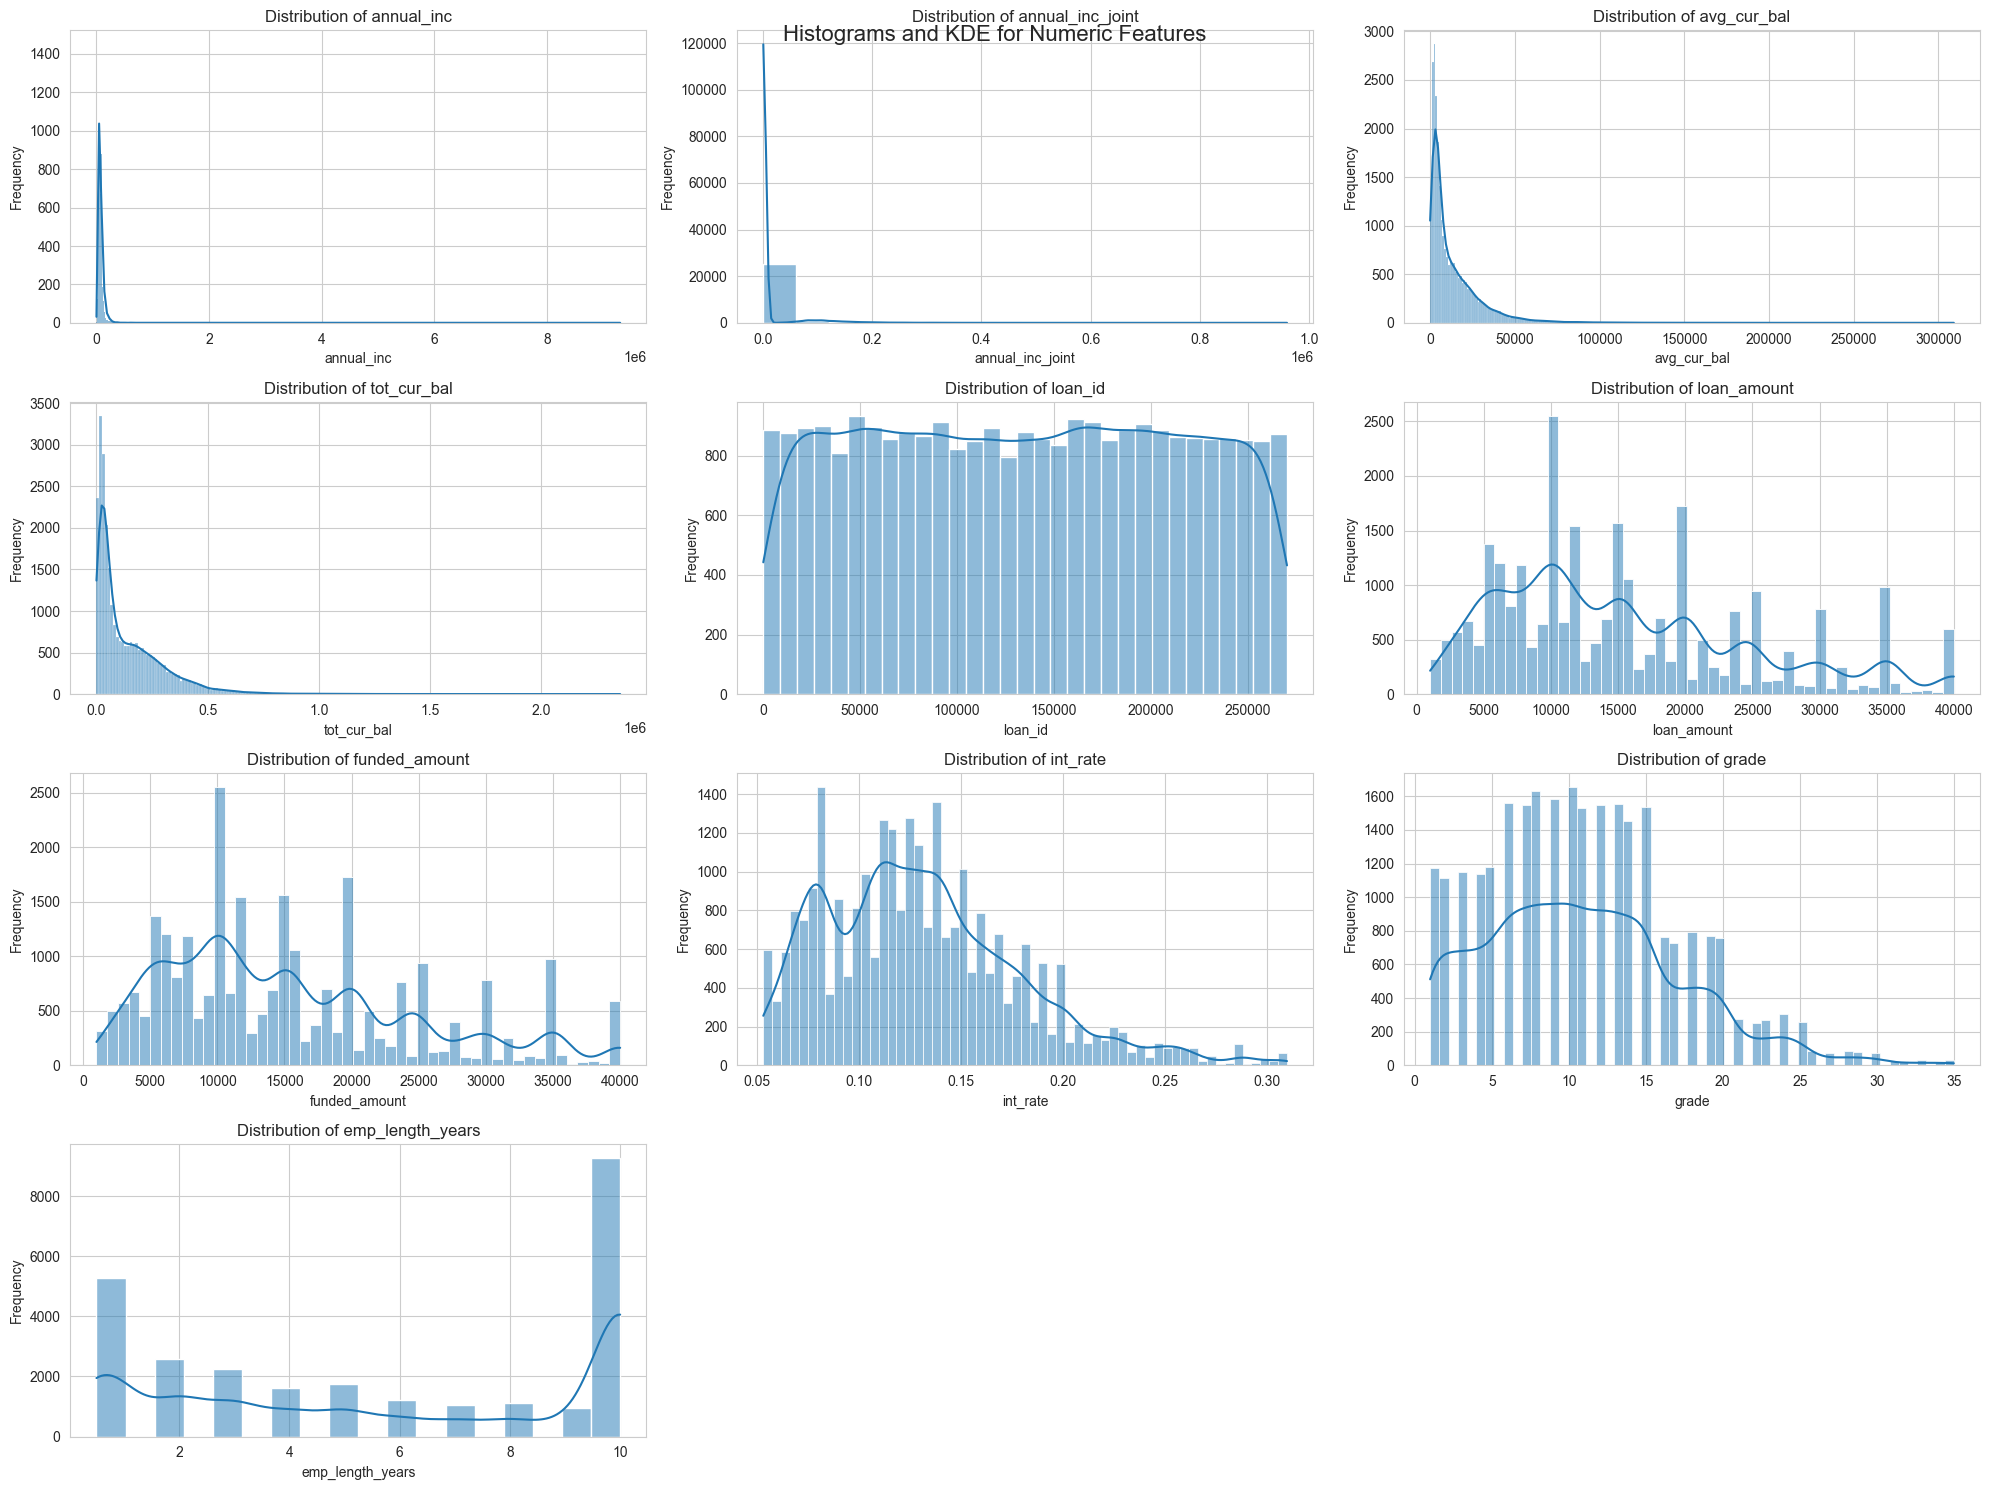

In [132]:
numeric_columns = fintech_data_df_clean.select_dtypes(include=['number'])

sns.set_style('whitegrid')
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns.columns, 1):
    plt.subplot(4, 3, i) 
    sns.histplot(numeric_columns[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Histograms and KDE for Numeric Features', fontsize=16)
plt.show()

## Ignoring the `loan_id` , `zip_code` ,`emp_length`and `grade` from our calculation for outliers
Becuase `loan_id` is unique not missing for each loan and `zip_code` is not missing will known for each area and for `emp_length` we have full data not missing with ranges from <1 year to 10+years no more and already created another column geting years in integer values and for `grade` we already have specified range so no need for detection outliers

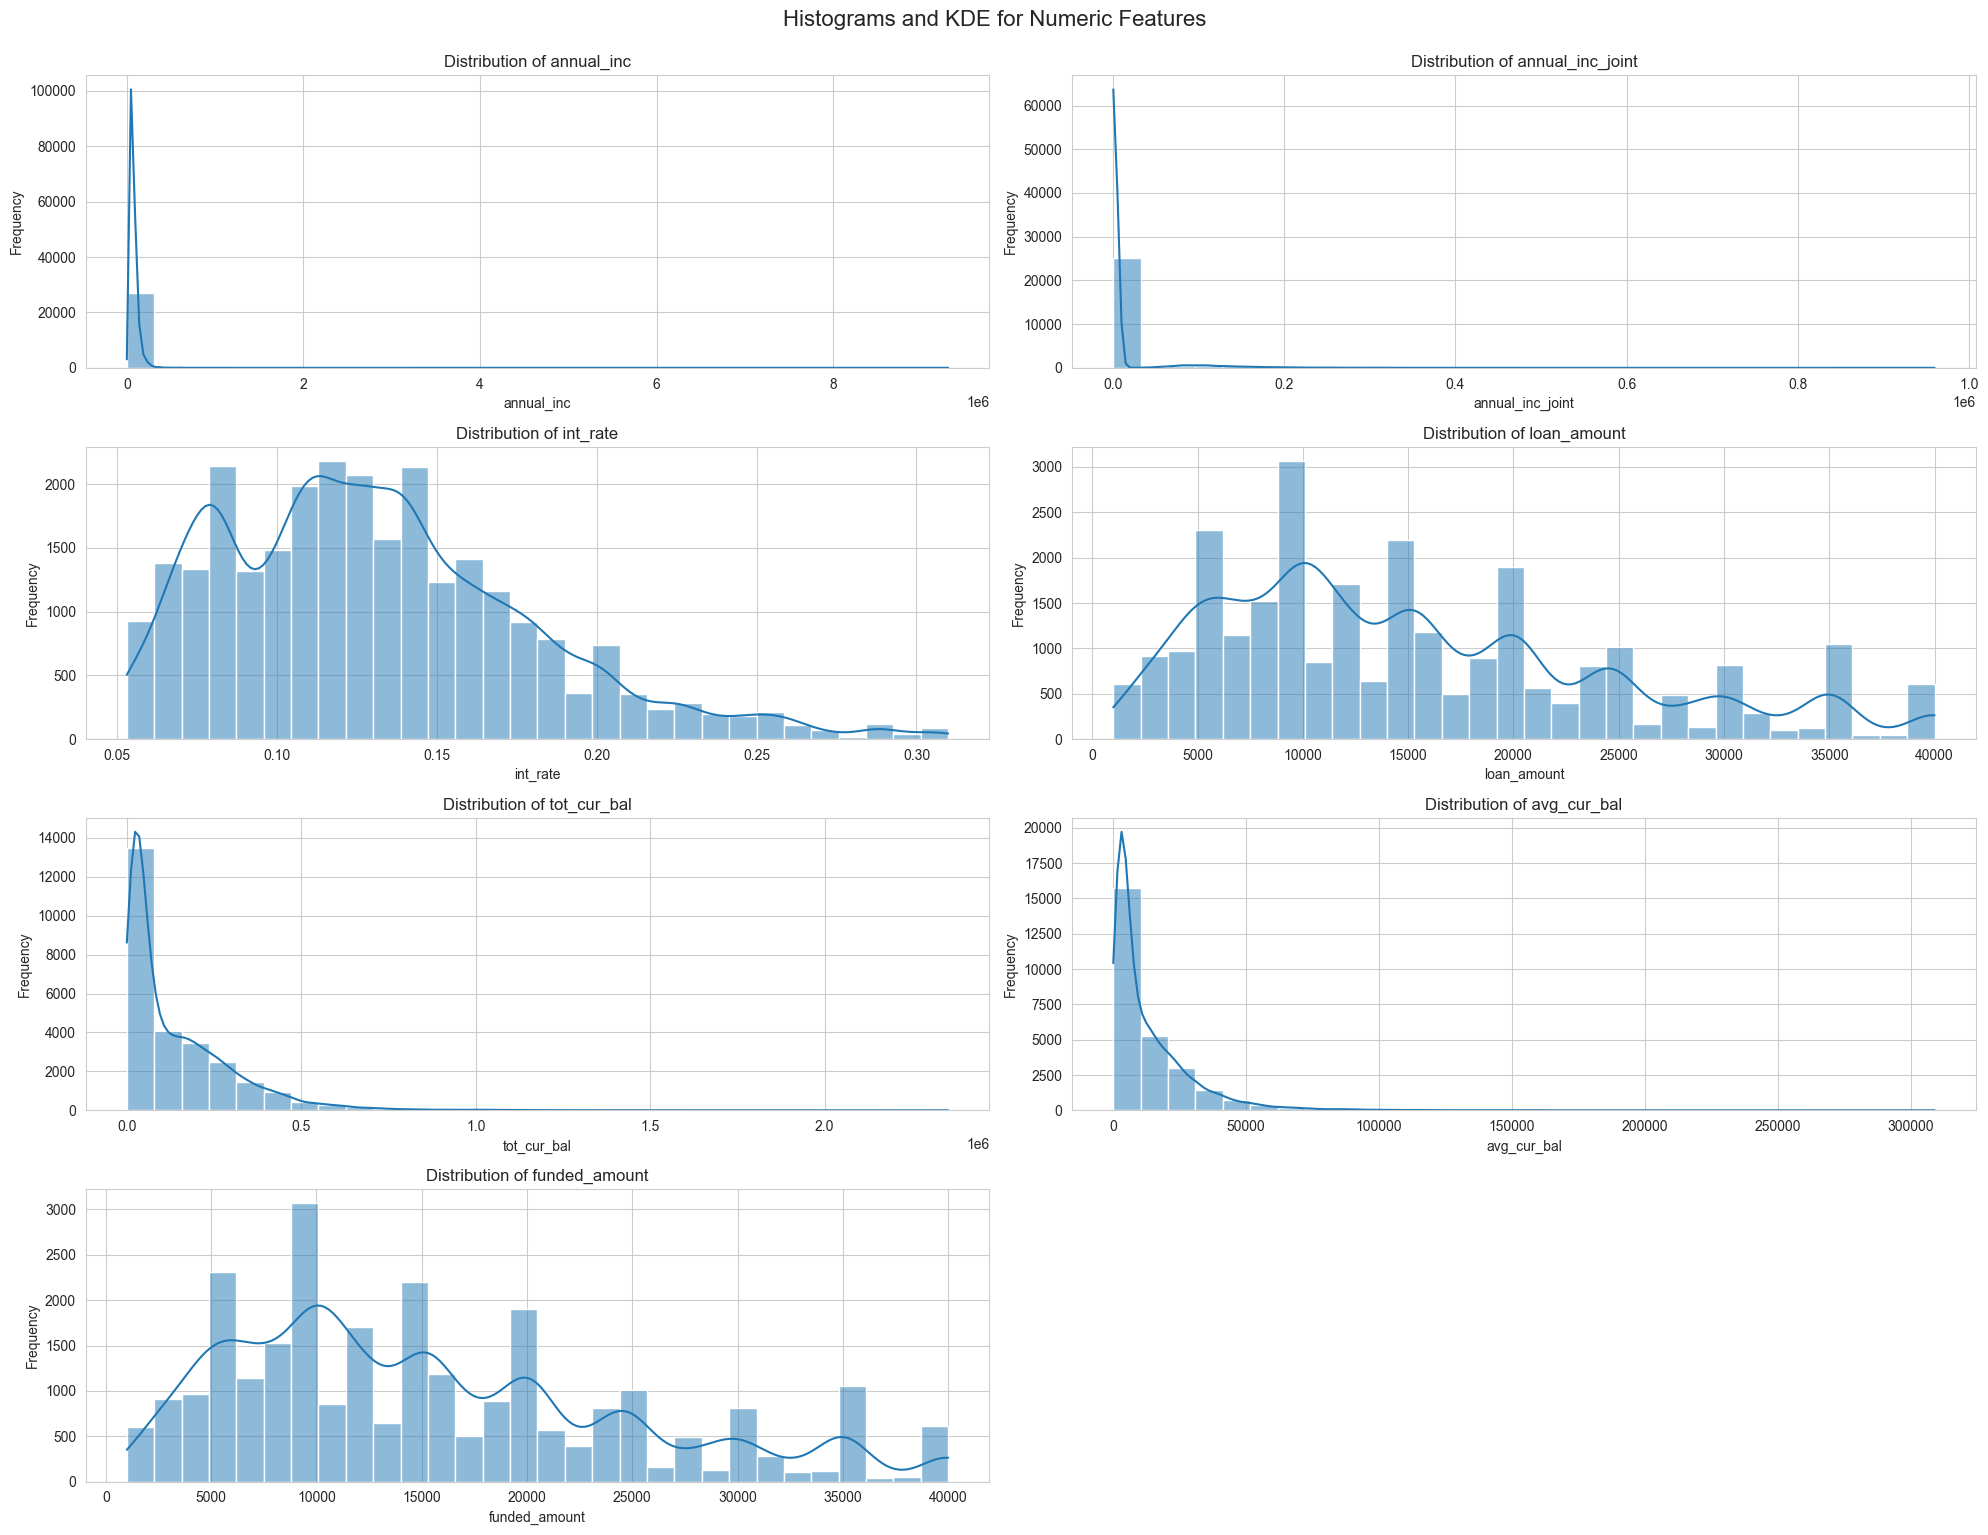

In [133]:
numeric_columns = fintech_data_df_clean[['annual_inc', 'annual_inc_joint', 'int_rate', 'loan_amount', 'tot_cur_bal', 'avg_cur_bal', 'funded_amount']]

sns.set_style('whitegrid')
plt.figure(figsize=(20, 15))

for i, col in enumerate(numeric_columns.columns, 1):
    plt.subplot(4, 2, i)  
    sns.histplot(numeric_columns[col], kde=True, bins=30)  
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Histograms and KDE for Numeric Features', fontsize=16, y=1.02)  
plt.show()


# 1. `annual_inc` and `annual_inc_joint`
Mthod 1 IQR Method.
These features are heavily skewed towards lower values, with a long tail on the right. The IQR method works well for skewed data, as it uses the median and quartiles to identify outliers.

In [134]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 -1.5*IQR
    upper_bound = Q3 + 1.5 *IQR
    outlier_mask = (df[column] <lower_bound)|(df[column]>upper_bound)
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.axvline(lower_bound, color='r', linestyle='--', label=f'Lower Bound:{lower_bound:.2f}')
    plt.axvline(upper_bound, color='g', linestyle='--', label=f'Upper Bound:{upper_bound:.2f}')
    plt.title(f'Box Plot for {column} with Outlier Bounds')
    plt.legend()
    plt.show()
    print(f'Outlier detection for {column}:')
    print(f'Lower bound: {lower_bound}, Upper bound: {upper_bound}')
    print(f'Number of outliers detected: {len(outlier_mask[outlier_mask])} ({len(outlier_mask[outlier_mask]) / len(df) * 100:.3f}%)')

    return lower_bound, upper_bound, outlier_mask



# `annual_inc`

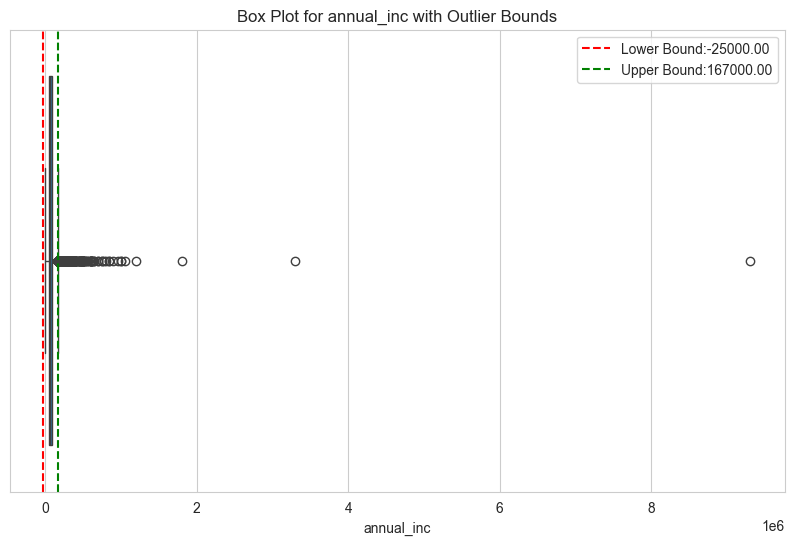

Outlier detection for annual_inc:
Lower bound: -25000.0, Upper bound: 167000.0
Number of outliers detected: 1315 (4.865%)


In [135]:
lower_bound_annual_inc, upper_bound_annual_inc, outlier_mask_annual_inc = detect_outliers_iqr(fintech_data_df_clean, 'annual_inc')

In [136]:
fintech_data_df_clean['annual_inc_joint'].isnull().sum()

0

# `annual_inc_joint`

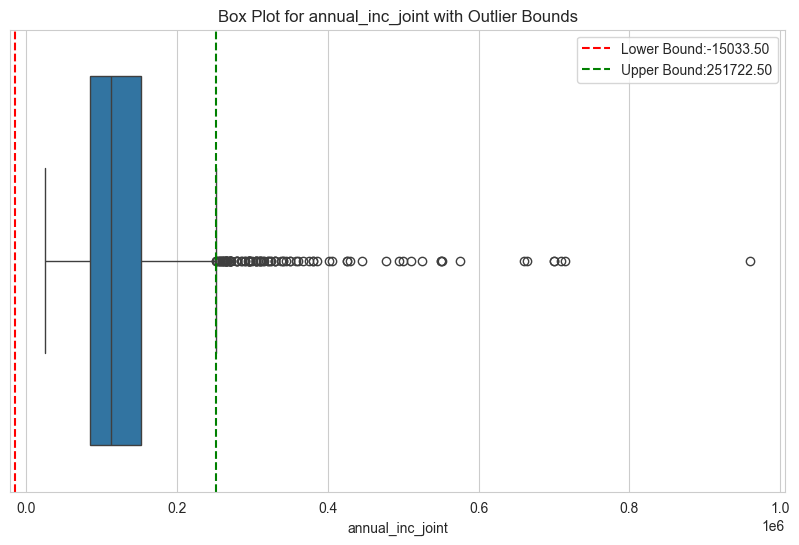

Outlier detection for annual_inc_joint:
Lower bound: -15033.5, Upper bound: 251722.5
Number of outliers detected: 98 (5.139%)


In [137]:
non_zero_annual_inc_joint = fintech_data_df_clean[fintech_data_df_clean['annual_inc_joint'] != 0]['annual_inc_joint']

non_zero_annual_inc_joint_df = non_zero_annual_inc_joint.reset_index(drop=True).to_frame()

lower_bound, upper_bound, outlier_mask = detect_outliers_iqr(non_zero_annual_inc_joint_df, 'annual_inc_joint')





# 2. `int_rate`:
Best Method: Z-Score Method.
The distribution appears more symmetric than other features. The Z-score method can effectively identify outliers in normally distributed or near-normal data.

In [138]:
def detect_outliers_zscore(df, column, threshold=3):
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    outlier_mask = np.abs(z_scores) > threshold
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Z-Score Distribution for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    print(f'Outlier detection for {column}:')
    print(f'Number of outliers detected: {outlier_mask.sum()} ({outlier_mask.sum() / len(df) * 100:.3f}%)')

    return outlier_mask

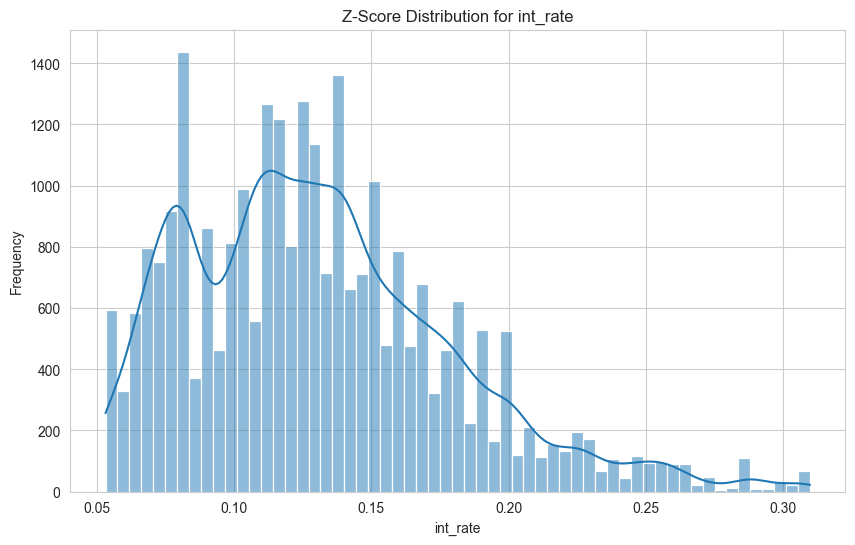

Outlier detection for int_rate:
Number of outliers detected: 260 (0.962%)


In [139]:
outlier_mask_int_rate = detect_outliers_zscore(fintech_data_df_clean, 'int_rate')

# 3. `loan_amount` and `funded_amount`
Best Method: IQR Method.
These features show multimodal distributions with some peaks, which indicates a non-normal distribution. The IQR method is better suited for such distributions as it is less sensitive to non-normality.

`loan_amount`

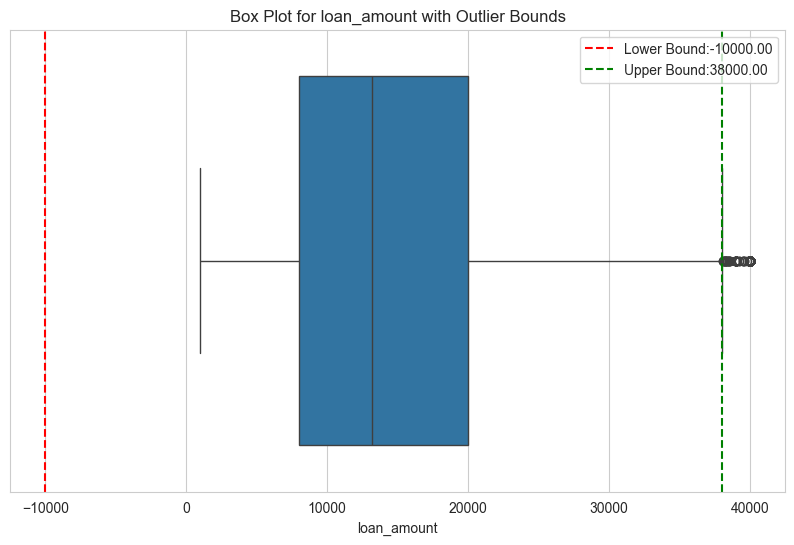

Outlier detection for loan_amount:
Lower bound: -10000.0, Upper bound: 38000.0
Number of outliers detected: 626 (2.316%)


In [140]:
lower_bound_annual_inc, upper_bound_annual_inc, outlier_mask_annual_inc = detect_outliers_iqr(fintech_data_df_clean, 'loan_amount')

`funded_amount`

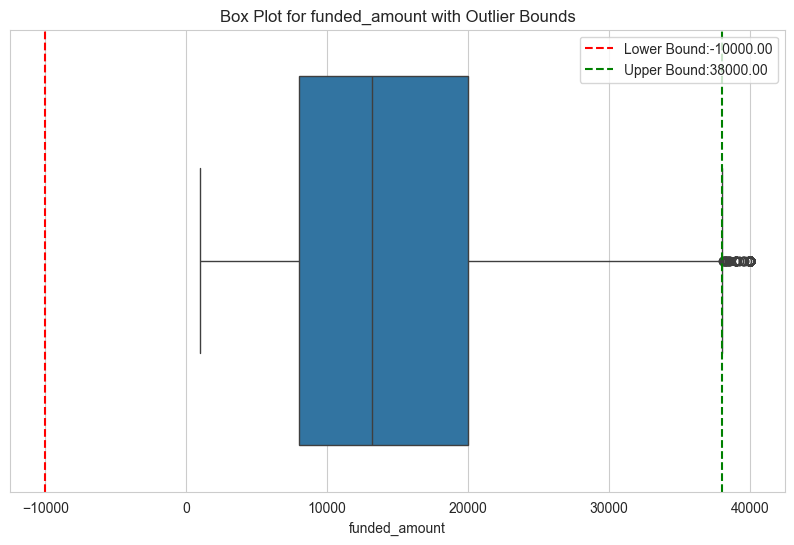

Outlier detection for funded_amount:
Lower bound: -10000.0, Upper bound: 38000.0
Number of outliers detected: 626 (2.316%)


In [141]:
lower_bound_annual_inc, upper_bound_annual_inc, outlier_mask_annual_inc = detect_outliers_iqr(fintech_data_df_clean, 'funded_amount')

# 4.  `tot_cur_bal` and `avg_cur_bal`
Best Method: IQR Method.
These features show a significant right skew, indicating that some customers have very high balances. The IQR method is robust for identifying outliers in skewed distributions.

`tot_cur_bal`

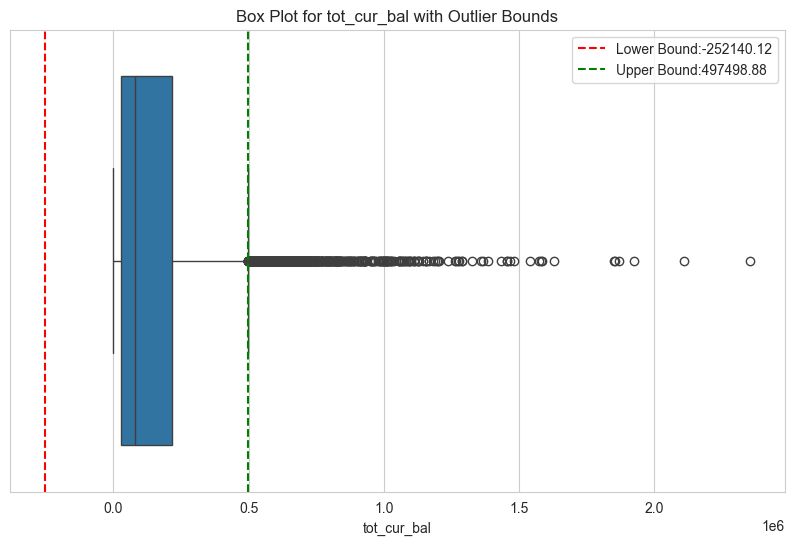

Outlier detection for tot_cur_bal:
Lower bound: -252140.125, Upper bound: 497498.875
Number of outliers detected: 944 (3.492%)


In [142]:
lower_bound_annual_inc, upper_bound_annual_inc, outlier_mask_annual_inc = detect_outliers_iqr(fintech_data_df_clean, 'tot_cur_bal')

`avg_cur_bal`

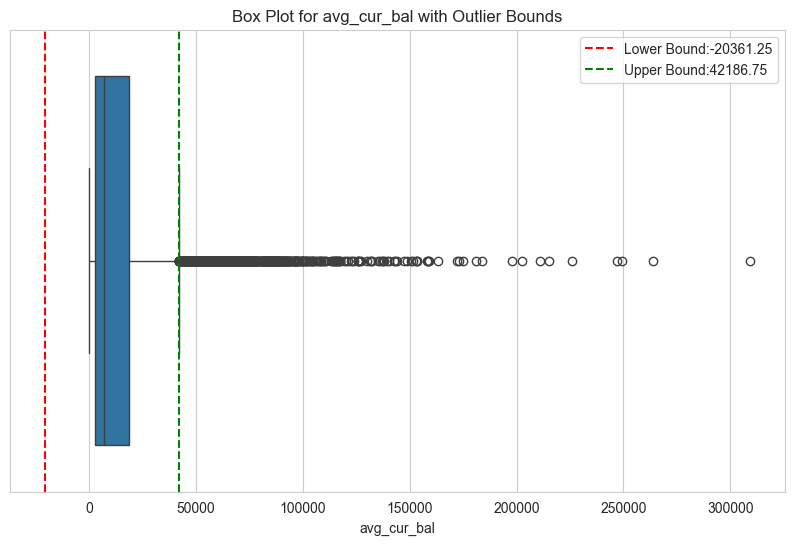

Outlier detection for avg_cur_bal:
Lower bound: -20361.25, Upper bound: 42186.75
Number of outliers detected: 1450 (5.364%)


In [143]:
lower_bound_annual_inc, upper_bound_annual_inc, outlier_mask_annual_inc = detect_outliers_iqr(fintech_data_df_clean, 'avg_cur_bal')

## Handling outliers

# 1. Handling Outliers in `int_rate` 
The distribution of int_rate is skewed, and a log transformation can help make it more normally distributed by compressing the range of values and reducing the impact of extreme outliers.

In [144]:
def plot_histogram_with_kde(df, column_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column_name], bins=30, kde=True)
    plt.title(f'KDE and Histogram for {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()


In [145]:

def plot_original_vs_transformed_kde_hist(df, column_name, transformed_column_name):
    fig, ax = plt.subplots(1, 2, figsize=(15, 7))

    sns.histplot(df[column_name], ax=ax[0], kde=True)
    ax[0].set_title(f'Original {column_name} Distribution')
    ax[0].set_xlabel(column_name)
    ax[0].set_ylabel('Frequency')

    sns.histplot(df[transformed_column_name], ax=ax[1], kde=True)
    ax[1].set_title(f'Transformed {column_name} Distribution')
    ax[1].set_xlabel(transformed_column_name)
    ax[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

In [146]:
def handling_outliers_log_transformation(df, column_name):

    if column_name == 'annual_inc_joint':
        new_column_name = f"{column_name}_log_transformation"
        df[new_column_name] = np.where(
            df['annual_inc_joint'] > 0,
            np.log1p(df['annual_inc_joint']),
            np.nan
        )
    else:
        new_column_name = f"{column_name}_log_transformation"
        df[new_column_name] = np.log1p(df[column_name])

    return df

In [147]:
fintech_data_df_clean = handling_outliers_log_transformation(fintech_data_df_clean,'int_rate')

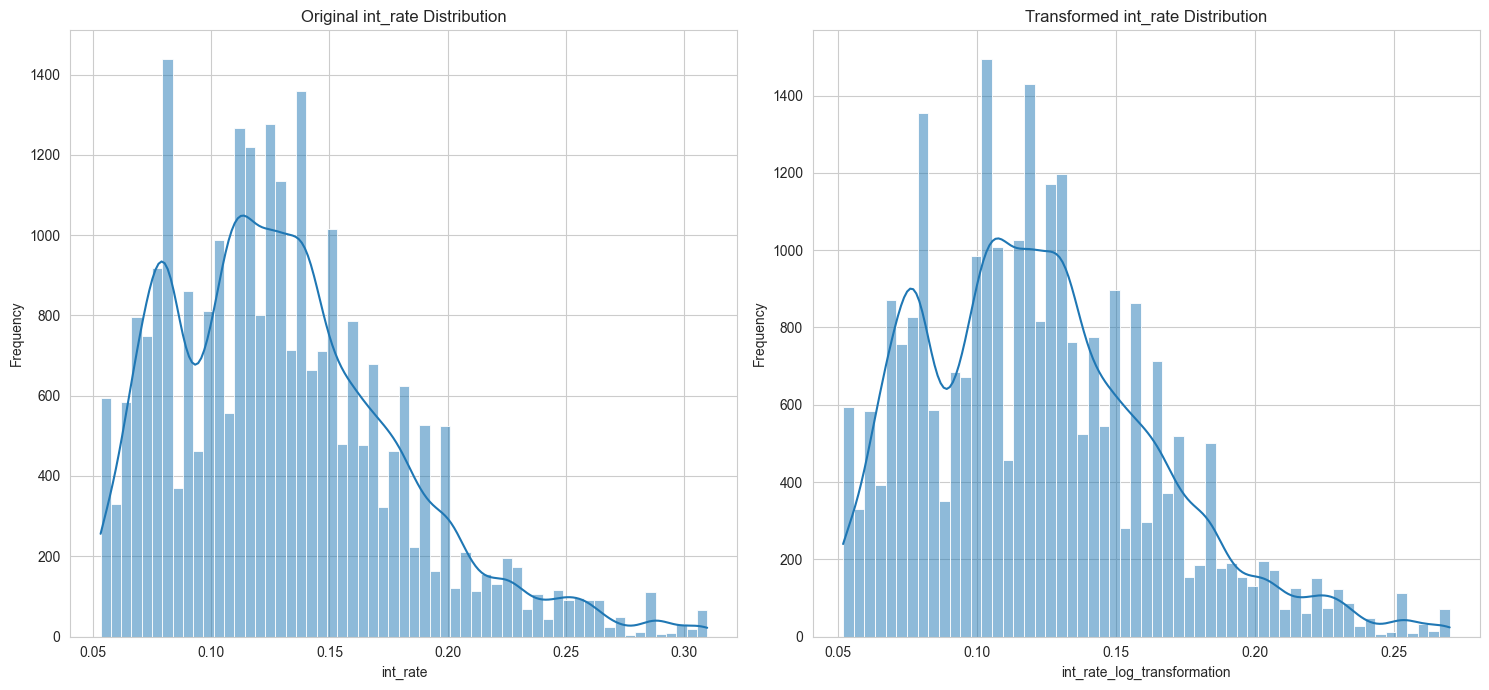

In [148]:
plot_original_vs_transformed_kde_hist(fintech_data_df_clean,'int_rate','int_rate_log_transformation')


# The transformed values are now on a different scale. (-ve scale )
as the interpretation of the transformed values differs from the original scale.

# Using Root Square Transformation to handle the `int_rate` outlires

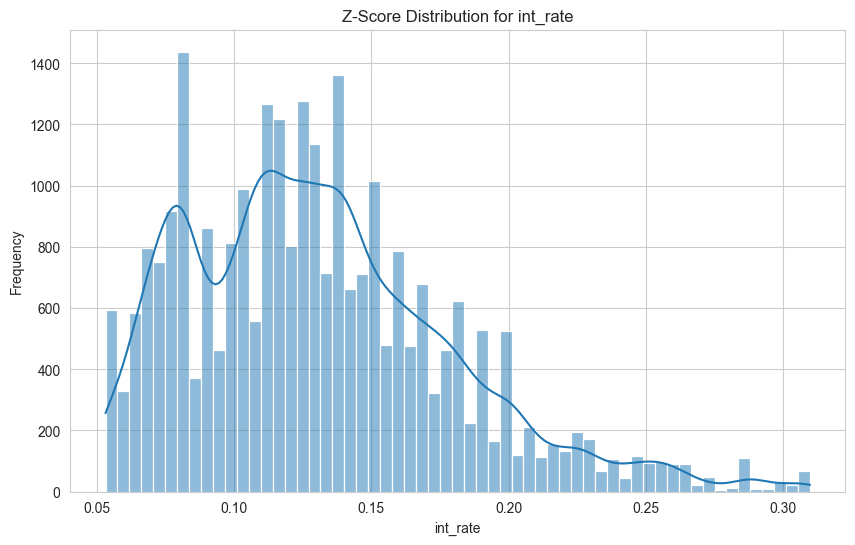

Outlier detection for int_rate:
Number of outliers detected: 260 (0.962%)


In [149]:
outliers_before = detect_outliers_zscore(fintech_data_df_clean, 'int_rate')


In [150]:

def handling_outliers_sqrt_transformation(df, column_name):
    
    new_column_name = f"{column_name}_sqrt_transformation"
    df[new_column_name] = np.sqrt(df[column_name])
    return df

In [151]:

fintech_data_df_clean = handling_outliers_sqrt_transformation(fintech_data_df_clean,'int_rate')


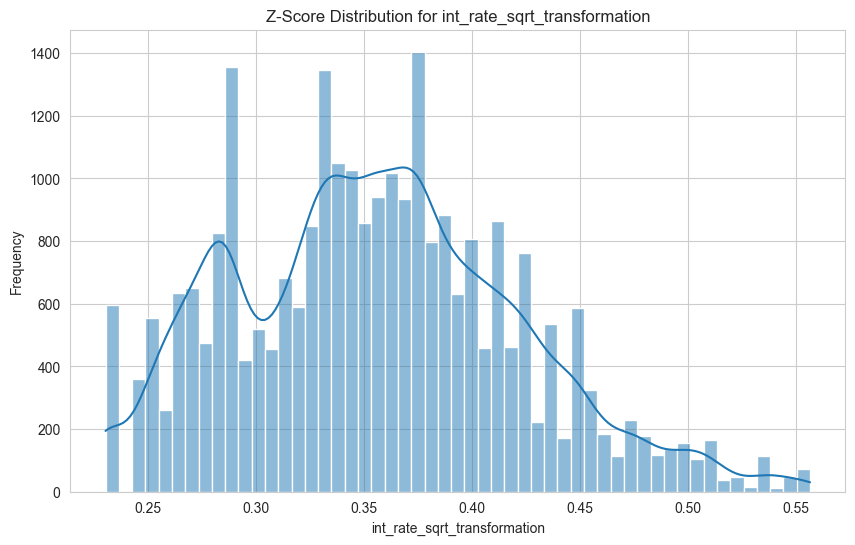

Outlier detection for int_rate_sqrt_transformation:
Number of outliers detected: 66 (0.244%)


In [152]:
outliers_after = detect_outliers_zscore(fintech_data_df_clean, 'int_rate_sqrt_transformation')


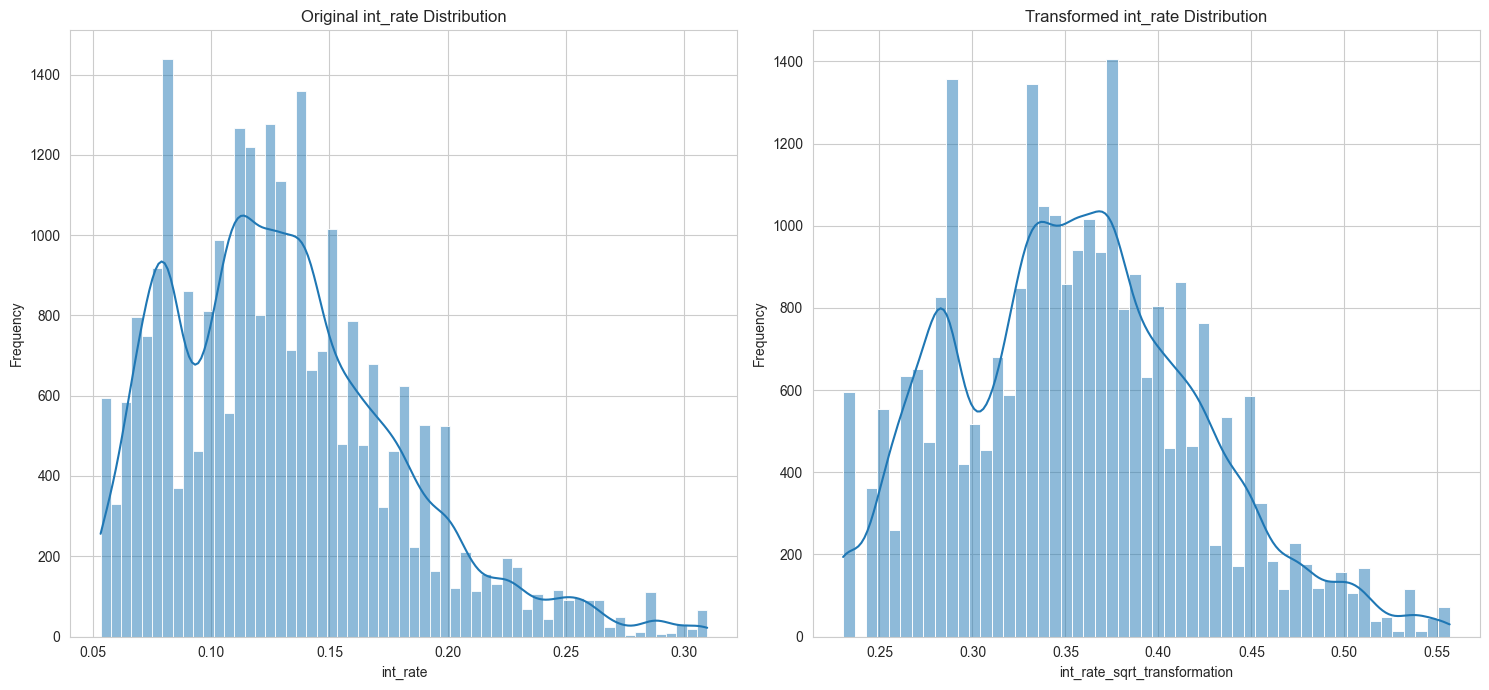

In [153]:
plot_original_vs_transformed_kde_hist(fintech_data_df_clean,'int_rate','int_rate_sqrt_transformation')

# The square root transformation applied to the `int_rate `feature
 reduces skewness and mitigates the influence of extreme values, resulting in a more symmetrical distribution. The Z-score comparison before and after the transformation shows fewer extreme outliers, indicating effective outlier handling while preserving the data's overall trends.

In [154]:
fintech_data_df_clean[['int_rate','int_rate_sqrt_transformation']]

int_rate  \
customer_id                                                    
YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE...    0.1249   
YidPXHg4YSlJXHgwMFx4ZTBcblx4ZDlceGZmW25ceGNjXHg...    0.1531   
YidceGU2XHhiZVx4MTZceGZiXHhlMVx4ZmVceGQ0XHhmYyx...    0.1416   
YidceGZkXHhkYlx4YWE7XHg4M1x4YzhZXHhkM0R0e1x4ZDZ...    0.1261   
YidceGQxXHhlN1x4YjdceGNkXHhiYVx4ZDZceGEyXHgxMSZ...    0.1799   
...                                                      ...   
YidceDkwXHhjNlx4Y2NIXHhlOVx4YTFceGYzXHhhYVx4OGJ...    0.1333   
YiJceDFlXHhkMVx4ZWMnSVx4YjQ3V1hceDg5XHgwMF5ceDA...    0.1447   
Yic7XHhjZFVceGQyXHhhMVx4YjhceDFhXHhlMEtceGZiXHR...    0.2899   
YidpIzxceGViXHhkYVx4ZjdceGZiXHg5YkxeXHhmNmRceDE...    0.1797   
Yicjc1x4YWZUXHhiMlx4ZmF2XHhiMlx4ZTJceDk2XHhlMlx...    0.0671   

                                                    int_rate_sqrt_transformation  
customer_id                                                                       
YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE...                      0.353412  
YidPXHg4YSlJXHgwMFx4ZTBcblx4ZDlceGZmW25ceGNjXHg...                      0.391280  
YidceGU2XHhiZVx4MTZceGZiXHhlMVx4ZmVceGQ0XHhmYyx...                      0.376298  
YidceGZkXHhkYlx4YWE7XHg4M1x4YzhZXHhkM0R0e1x4ZDZ...                      0.355106  
YidceGQxXHhlN1x4YjdceGNkXHhiYVx4ZDZceGEyXHgxMSZ...                      0.424146  
...                                                                          ...  
YidceDkwXHhjNlx4Y2NIXHhlOVx4YTFceGYzXHhhYVx4OGJ...                      0.365103  
YiJceDFlXHhkMVx4ZWMnSVx4YjQ3V1hceDg5XHgwMF5ceDA...                      0.380395  
Yic7XHhjZFVceGQyXHhhMVx4YjhceDFhXHhlMEtceGZiXHR...                      0.538424  
YidpIzxceGViXHhkYVx4ZjdceGZiXHg5YkxeXHhmNmRceDE...                      0.423910  
Yicjc1x4YWZUXHhiMlx4ZmF2XHhiMlx4ZTJceDk2XHhlMlx...                      0.259037  

[27030 rows x 2 columns]

# 2. Handling Outliers in `tot_cur_bal`

Here i used capping but since we are dealing with salaries and money amounts capping is not the best way to deal with it so i will use transformations instead. 

In [155]:
def cap_outliers_iqr(df, column, new_column_name, iqr_factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_threshold = Q3 + iqr_factor * IQR
    lower_threshold = Q1 - iqr_factor * IQR
    df[new_column_name] = np.where(df[column] > upper_threshold, upper_threshold, df[column])
    df[new_column_name] = np.where(df[new_column_name] < lower_threshold, lower_threshold, df[new_column_name])
    return df

In [156]:
def plot_iqr_boxplot(df, original_column, capped_column):
    Q1 = df[original_column].quantile(0.25)
    Q3 = df[original_column].quantile(0.75)
    IQR = Q3 - Q1
    upper_threshold = Q3 + 1.5 * IQR
    lower_threshold = Q1 - 1.5 * IQR
    original_outliers = ((df[original_column] > upper_threshold) | (df[original_column] < lower_threshold)).sum()
    original_outlier_percent = (original_outliers / len(df)) * 100

    capped_outliers = ((df[capped_column] > upper_threshold) | (df[capped_column] < lower_threshold)).sum()
    capped_outlier_percent = (capped_outliers / len(df)) * 100

    print(f'Original outliers in {original_column}: {original_outliers} ({original_outlier_percent:.2f}%)')
    print(f'Outliers after capping in {capped_column}: {capped_outliers} ({capped_outlier_percent:.2f}%)')
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    sns.boxplot(y=df[original_column], ax=ax[0])
    ax[0].set_title(f'IQR Box Plot for {original_column} Before Capping')
    ax[0].set_ylabel(original_column)

    sns.boxplot(y=df[capped_column], ax=ax[1])
    ax[1].set_title(f'IQR Box Plot for {capped_column} After Capping')
    ax[1].set_ylabel(capped_column)

    plt.tight_layout()
    plt.show()


In [157]:
fintech_data_df_clean = cap_outliers_iqr(fintech_data_df_clean, 'tot_cur_bal', 'tot_cur_bal_capped')

Original outliers in tot_cur_bal: 944 (3.49%)
Outliers after capping in tot_cur_bal_capped: 0 (0.00%)


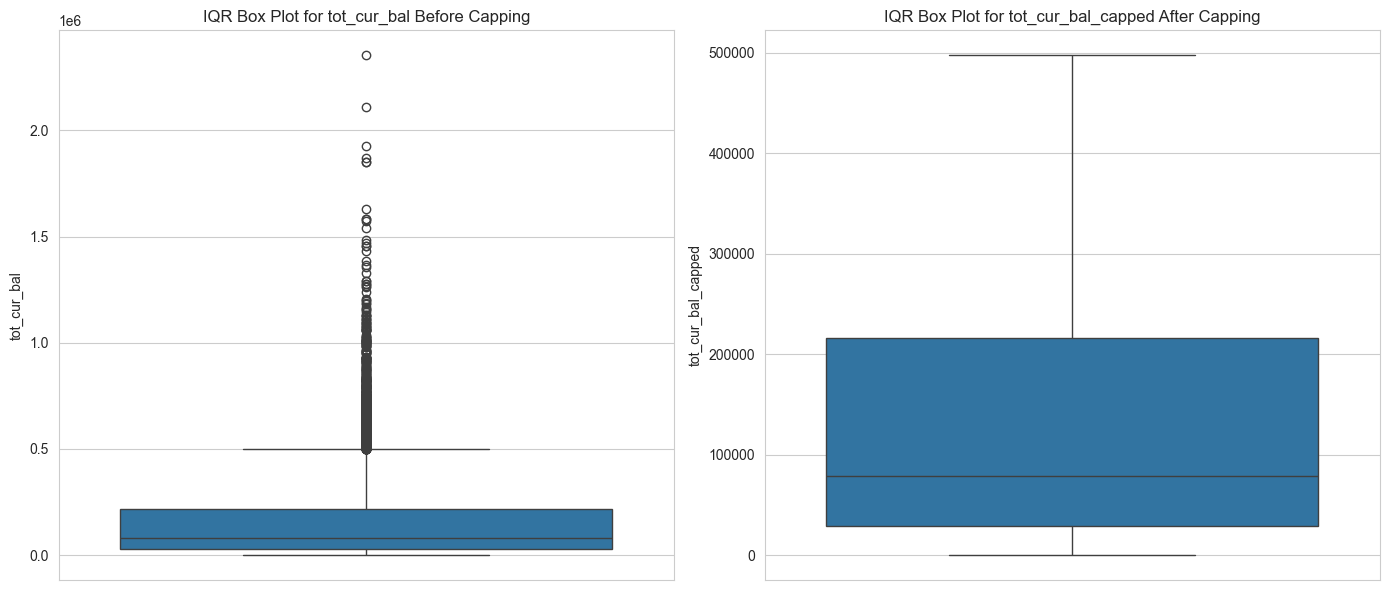

In [158]:
plot_iqr_boxplot(fintech_data_df_clean, 'tot_cur_bal', 'tot_cur_bal_capped')

The box plots for `tot_cur_bal` show the data before and after capping based on the IQR method. Before capping, there were numerous extreme outliers above 500,000, significantly affecting the data distribution. After capping, these outliers were adjusted within the upper threshold, resulting in a more uniform range and eliminating the influence of extreme values. This adjustment improves the data's consistency, making it more suitable for further analysis.

# 2. Using Log transformation 

In [159]:

fintech_data_df_clean = handling_outliers_log_transformation(fintech_data_df_clean,'tot_cur_bal')
print(fintech_data_df_clean[['tot_cur_bal', 'tot_cur_bal_log_transformation']].head())


                                                    tot_cur_bal  \
customer_id                                                       
YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE...      60710.0   
YidPXHg4YSlJXHgwMFx4ZTBcblx4ZDlceGZmW25ceGNjXHg...     304779.0   
YidceGU2XHhiZVx4MTZceGZiXHhlMVx4ZmVceGQ0XHhmYyx...      29363.0   
YidceGZkXHhkYlx4YWE7XHg4M1x4YzhZXHhkM0R0e1x4ZDZ...      22076.0   
YidceGQxXHhlN1x4YjdceGNkXHhiYVx4ZDZceGEyXHgxMSZ...      23782.0   

                                                    tot_cur_bal_log_transformation  
customer_id                                                                         
YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE...                       11.013880  
YidPXHg4YSlJXHgwMFx4ZTBcblx4ZDlceGZmW25ceGNjXHg...                       12.627345  
YidceGU2XHhiZVx4MTZceGZiXHhlMVx4ZmVceGQ0XHhmYyx...                       10.287525  
YidceGZkXHhkYlx4YWE7XHg4M1x4YzhZXHhkM0R0e1x4ZDZ...                       10.002292  
YidceGQxXHhlN1x4Yjdc

Original outliers in tot_cur_bal: 944 (3.49%)
Outliers after capping in tot_cur_bal_log_transformation: 0 (0.00%)


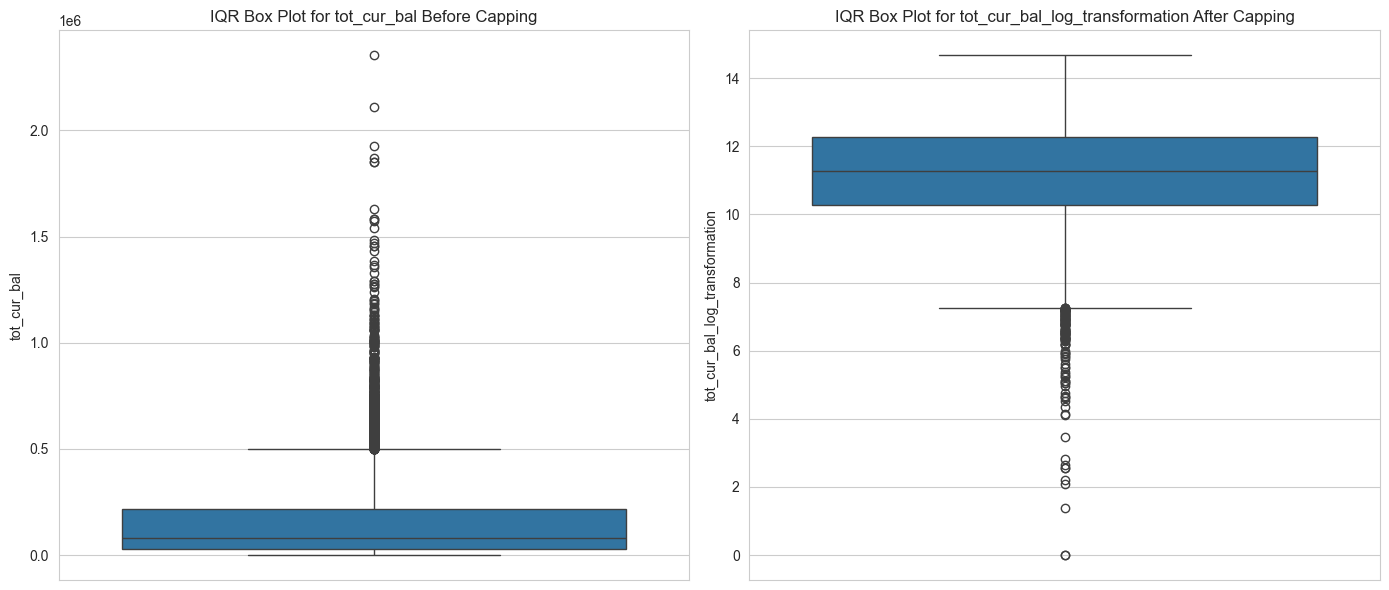

In [160]:
plot_iqr_boxplot(fintech_data_df_clean, 'tot_cur_bal', 'tot_cur_bal_log_transformation')

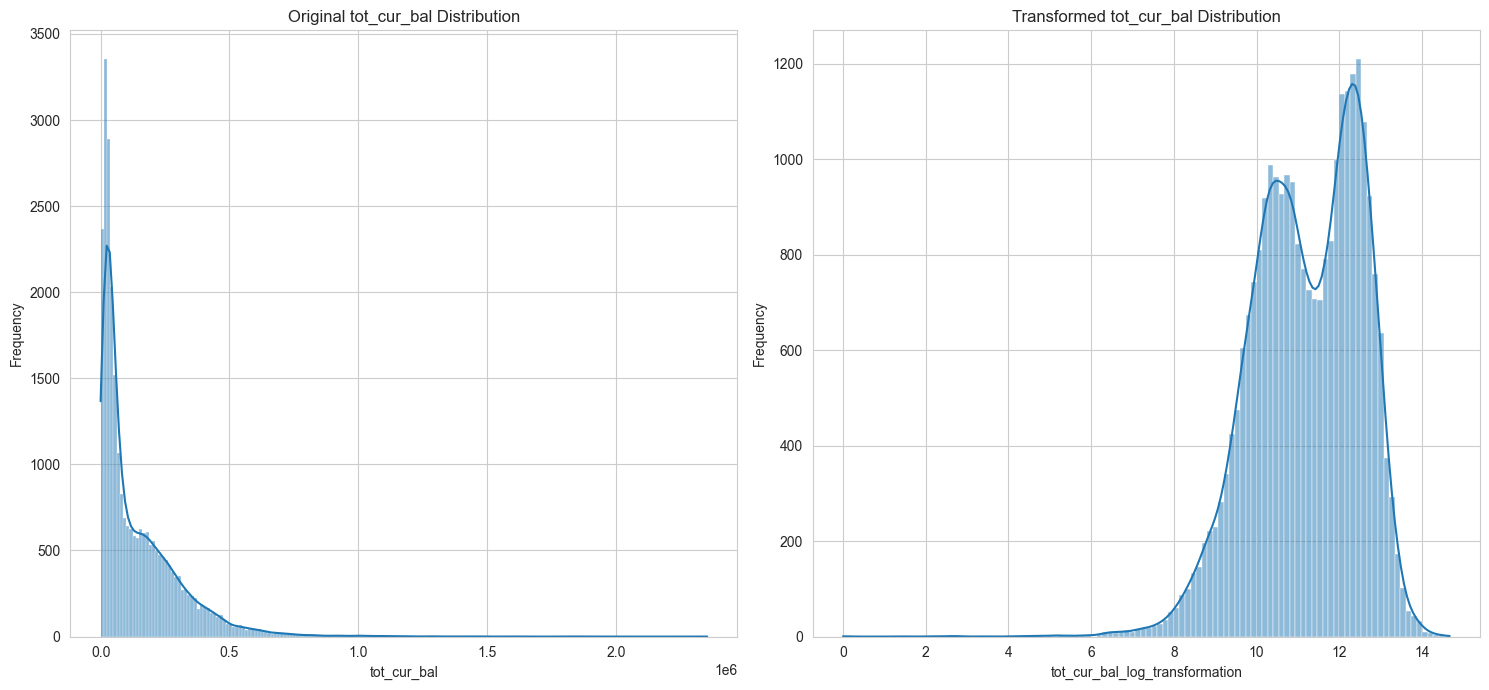

In [161]:
plot_original_vs_transformed_kde_hist(fintech_data_df_clean,'tot_cur_bal', 'tot_cur_bal_log_transformation')


The KDE and histogram for the log-transformed `tot_cur_bal` show that the log transformation helped make the data more normal by reducing skewness. There are multiple peaks, suggesting different groups in the data (possibly various customer types). Most values are between 8 and 12 on the log scale, indicating where most customer balances lie. The left tail shows some very low values. Overall, the transformation helped reveal these patterns clearly.

# 3. Handle Outlier in `avg_cur_bal`

Same i will consider log transformation
as its acutal money data 

In [162]:
fintech_data_df_clean = cap_outliers_iqr(fintech_data_df_clean, 'avg_cur_bal', 'avg_cur_bal_capped')

Original outliers in avg_cur_bal: 1450 (5.36%)
Outliers after capping in avg_cur_bal_capped: 0 (0.00%)


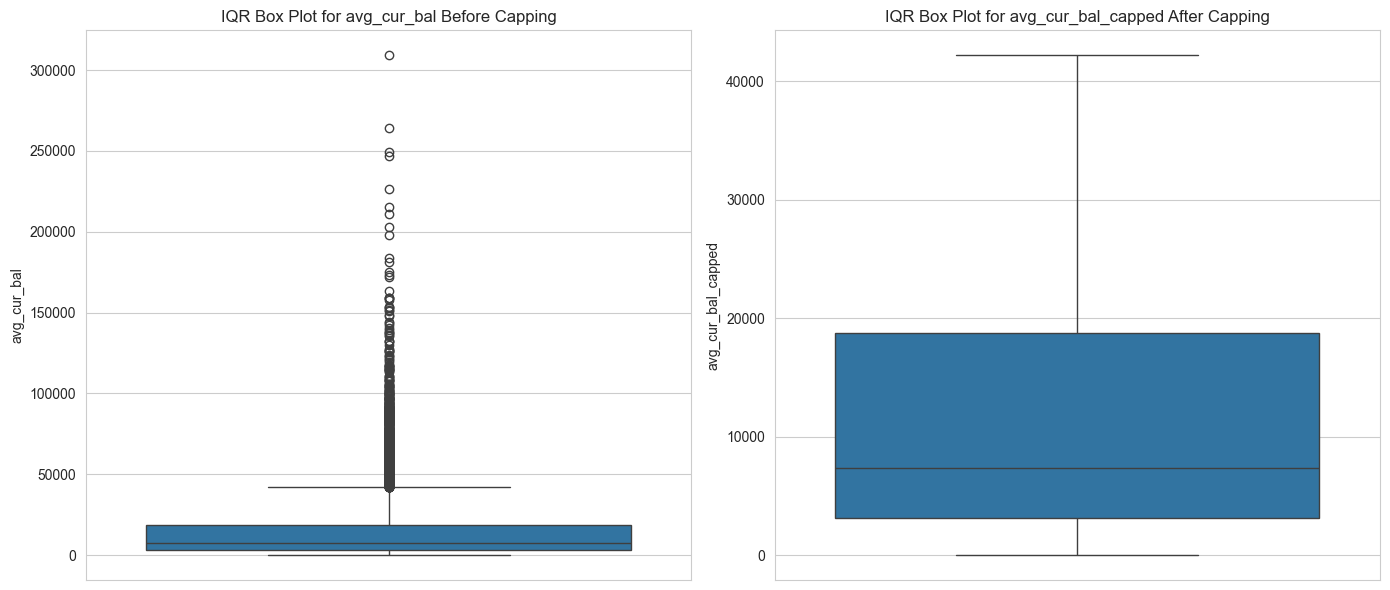

In [163]:
plot_iqr_boxplot(fintech_data_df_clean, 'avg_cur_bal', 'avg_cur_bal_capped')

# The box plots for `avg_cur_bal`
 demonstrate a significant change after applying IQR-based capping. Before capping, there were numerous extreme outliers above 50,000, skewing the data distribution. After capping, these extreme values have been adjusted to fall within the upper threshold, resulting in a more consistent range. This approach helps reduce the impact of outliers, making the data more suitable for analysis.

# 2. Log Transformation

In [164]:
fintech_data_df_clean= handling_outliers_log_transformation(fintech_data_df_clean,'avg_cur_bal')


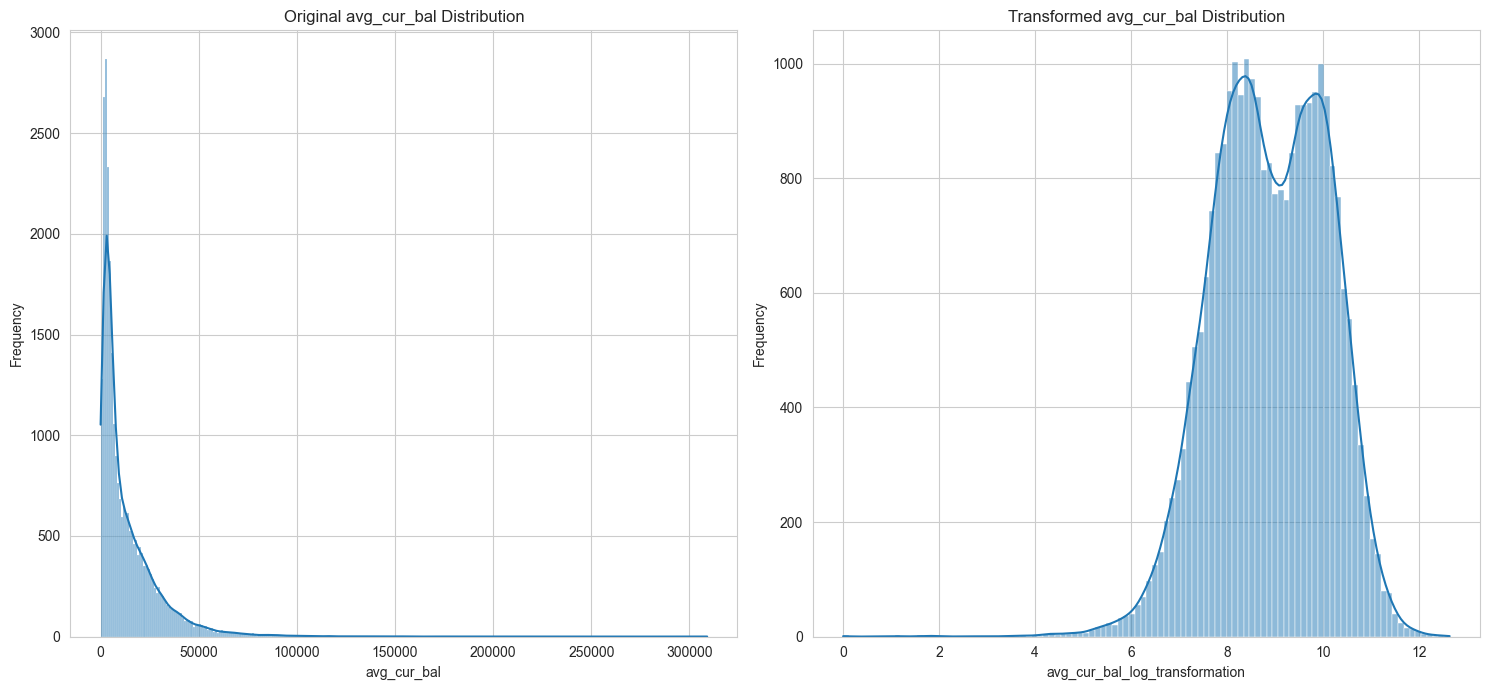

In [165]:
plot_original_vs_transformed_kde_hist(fintech_data_df_clean,'avg_cur_bal','avg_cur_bal_log_transformation')

This plot shows the distribution of the log-transformed total current balance (`avg_cur_bal`). By using the log transformation, the original skewness in the data has been reduced, making the distribution more bell-shaped. The presence of multiple peaks suggests that there could be different segments of customers with varying avg_cur_bal levels. Most avg_cur_bal lie within the log values of 8 to 12, while fewer customers have very high or very low avg_cur_bal. The transformation helped in visualizing the data more clearly and understanding the spread of customer avg_cur_bal.

# 4. Handle Outlier in `loan_amount`
using capping 

In [166]:
fintech_data_df_clean = cap_outliers_iqr(fintech_data_df_clean, 'loan_amount', 'loan_amount_capped')

Original outliers in loan_amount: 626 (2.32%)
Outliers after capping in loan_amount_capped: 0 (0.00%)


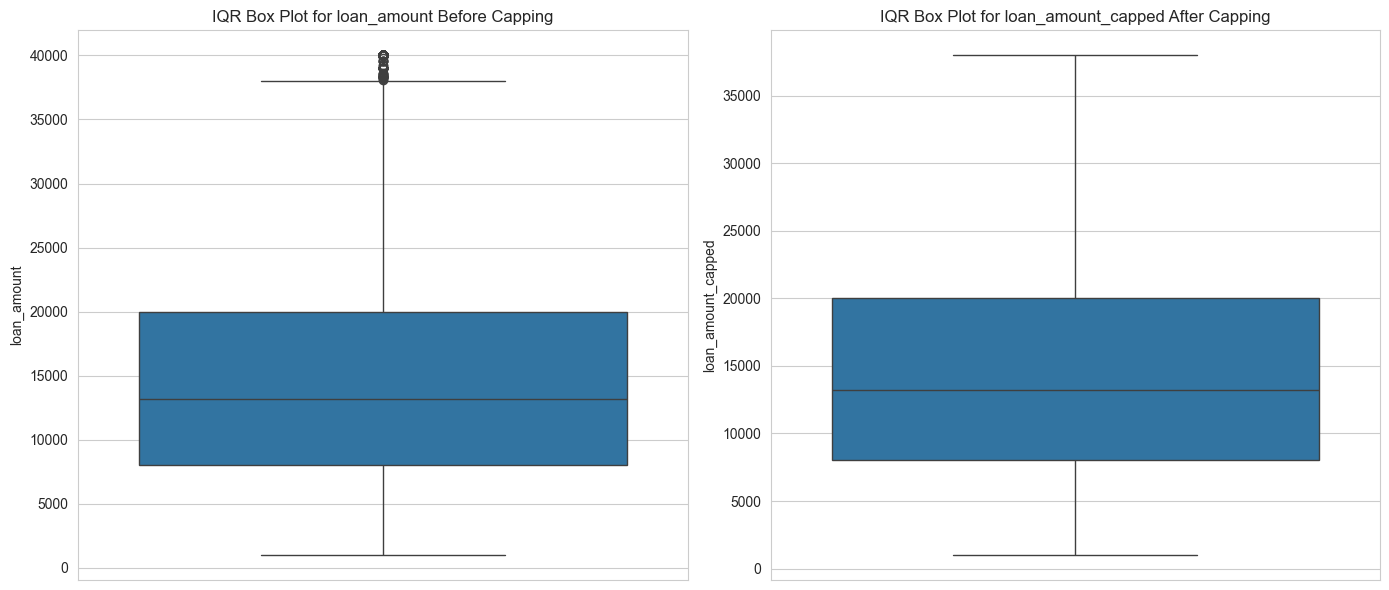

In [167]:
plot_iqr_boxplot(fintech_data_df_clean, 'loan_amount', 'loan_amount_capped')

# The box plots for the `loan_amount` column 
show a reduction in extreme values after applying IQR-based capping. Before capping, several outliers above 35,000 are visible, while after capping, these values are adjusted to fall within the upper threshold. This approach effectively minimizes the influence of extreme loan amounts, improving the consistency of the data for analysis

# 2. Using log transformation

In [168]:
fintech_data_df_clean = handling_outliers_log_transformation(fintech_data_df_clean,'loan_amount')

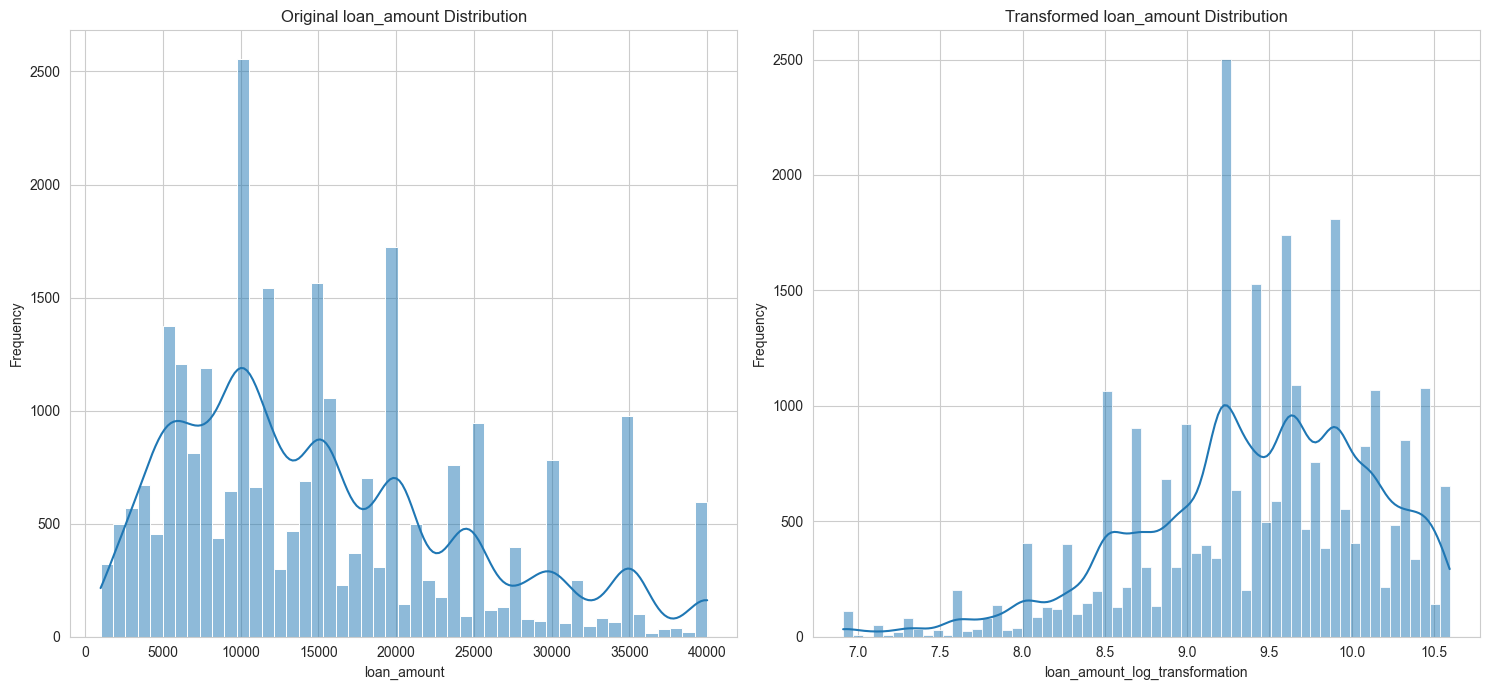

In [169]:
plot_original_vs_transformed_kde_hist(fintech_data_df_clean,'loan_amount','loan_amount_log_transformation')

This plot displays the KDE and histogram for the log-transformed `loan_amount`, showing the distribution after transformation. The log transformation has made the data more symmetric, reducing skewness. The histogram reveals multiple peaks, indicating different customer segments with varying loan_amount levels. The most common log values fall between 8 and 10.5, suggesting that a significant portion of customers have loan_amount within this range. The smooth KDE curve helps to visualize the overall shape and density of the data, showing the variations in customer loan_amount distribution.

# 5. Handling outliers for `funded_amount` 
it is the same data of `loan_amount` so we can use the capped column of `loan_amount` but to be more safely i will handle it just in case 

In [170]:
fintech_data_df_clean = cap_outliers_iqr(fintech_data_df_clean, 'funded_amount', 'funded_amount_capped')

Original outliers in funded_amount: 626 (2.32%)
Outliers after capping in funded_amount_capped: 0 (0.00%)


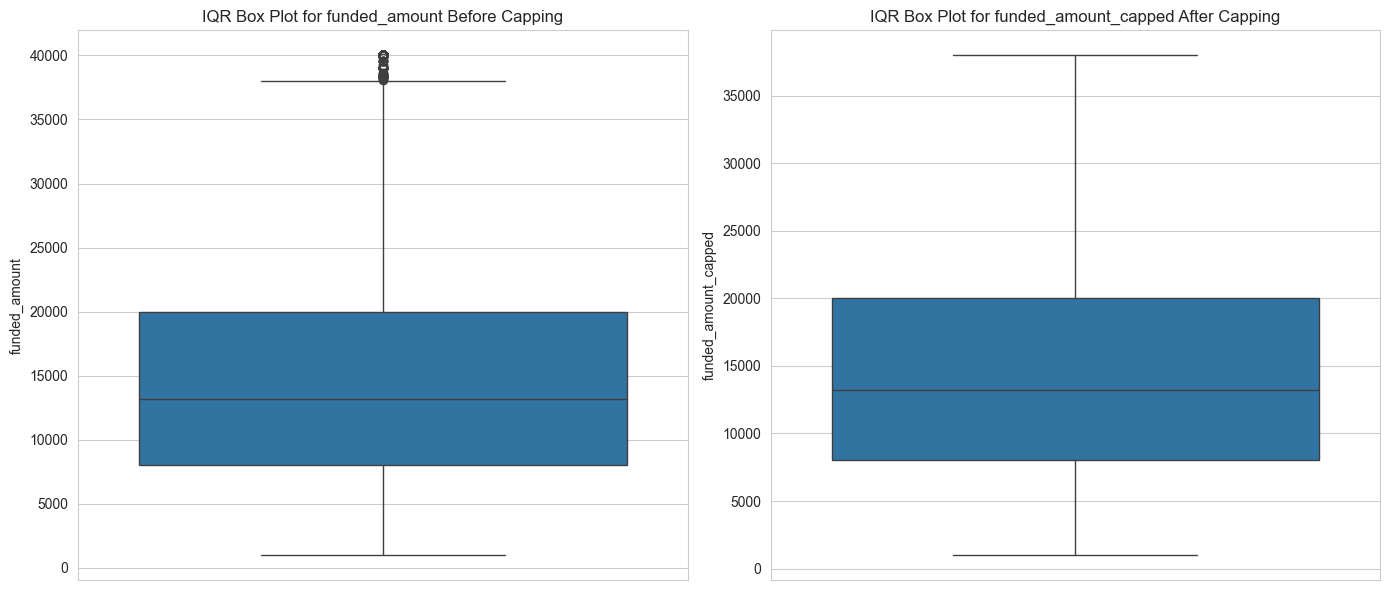

In [171]:
plot_iqr_boxplot(fintech_data_df_clean, 'funded_amount', 'funded_amount_capped')

# 2. Using log transfomration

In [172]:
fintech_data_df_clean = handling_outliers_log_transformation(fintech_data_df_clean,'funded_amount')


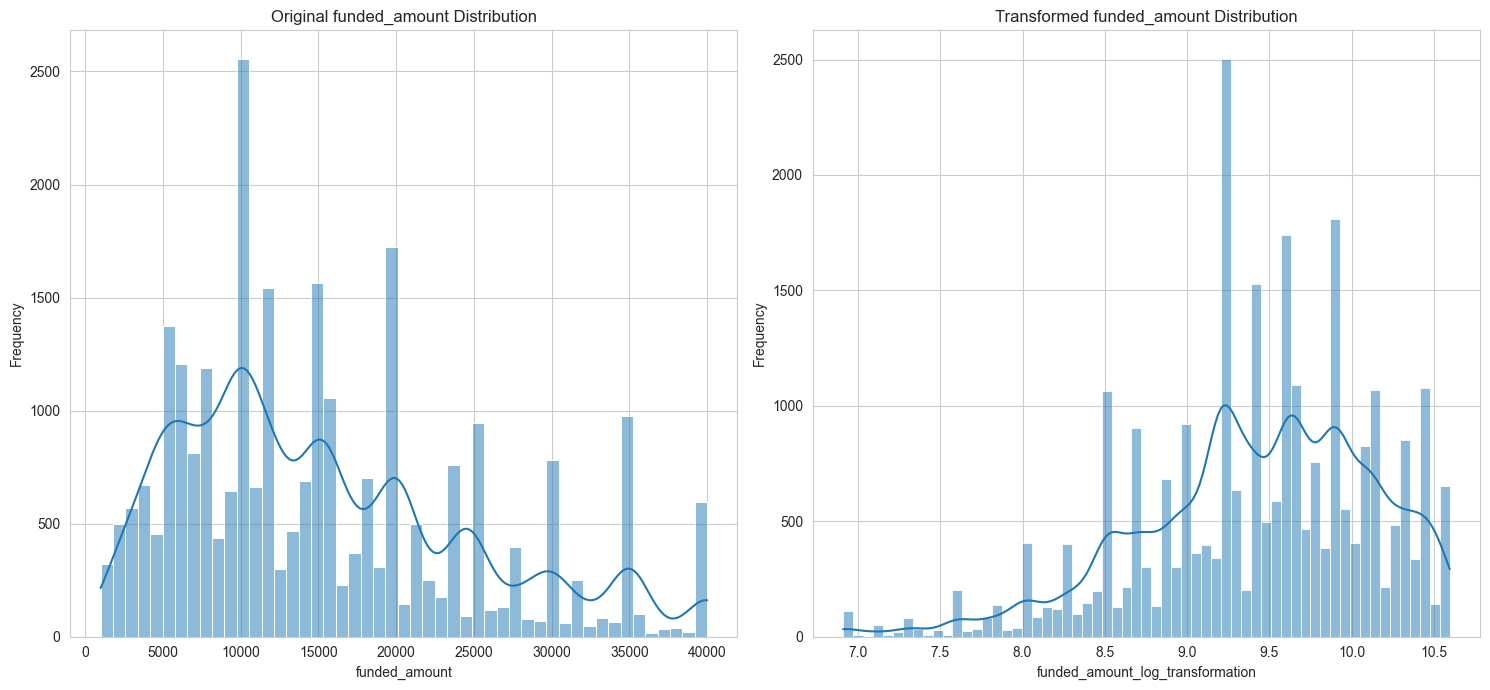

In [173]:
plot_original_vs_transformed_kde_hist(fintech_data_df_clean,'funded_amount','funded_amount_log_transformation')

The plot shows the KDE and histogram for the log-transformed `funded_amount`. By applying the log transformation, the skewness in the original data is reduced, resulting in a more normalized distribution. The distribution appears multimodal, with several peaks around 8.5, 9.0, and 9.5 on the log scale, suggesting different clusters or ranges of funded amounts. The most common log-transformed values are concentrated between 8.5 and 10.5, indicating a higher frequency of funded amounts within this range. The KDE curve provides a smoothed estimate of the density, which helps visualize the shape of the data distribution clearly.

# 6. Handling outliers for `annual_inc` 
Using Capping 

In [174]:
fintech_data_df_clean = cap_outliers_iqr(fintech_data_df_clean, 'annual_inc', 'annual_inc_capped')

Original outliers in annual_inc: 1315 (4.86%)
Outliers after capping in annual_inc_capped: 0 (0.00%)


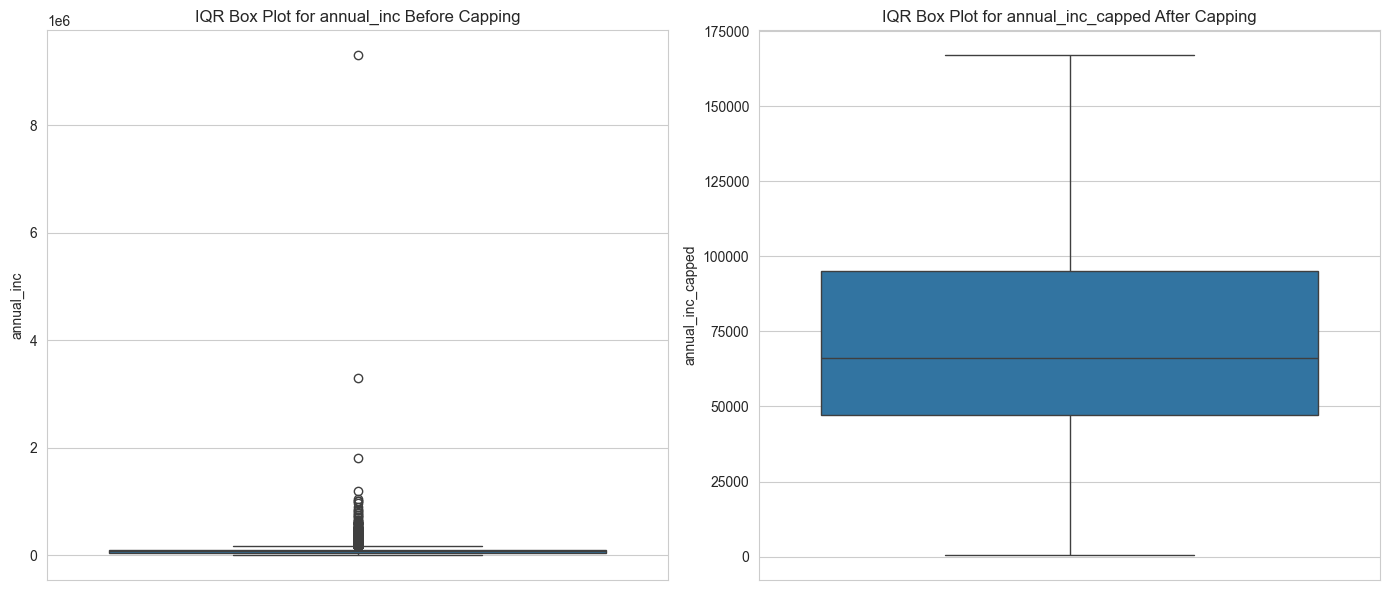

In [175]:
plot_iqr_boxplot(fintech_data_df_clean, 'annual_inc', 'annual_inc_capped')

# The box plots for `annual_inc` 
show the effect of capping based on the IQR method. Before capping, there were several extreme outliers exceeding 2 million, which significantly skewed the data distribution. After applying capping, these outliers were brought within the upper threshold, resulting in a more balanced and consistent distribution. This adjustment helps to reduce the impact of extreme values, making the data more suitable for further analysis.

# 2. Using Log Transformation

In [176]:
fintech_data_df_clean = handling_outliers_log_transformation(fintech_data_df_clean,'annual_inc')


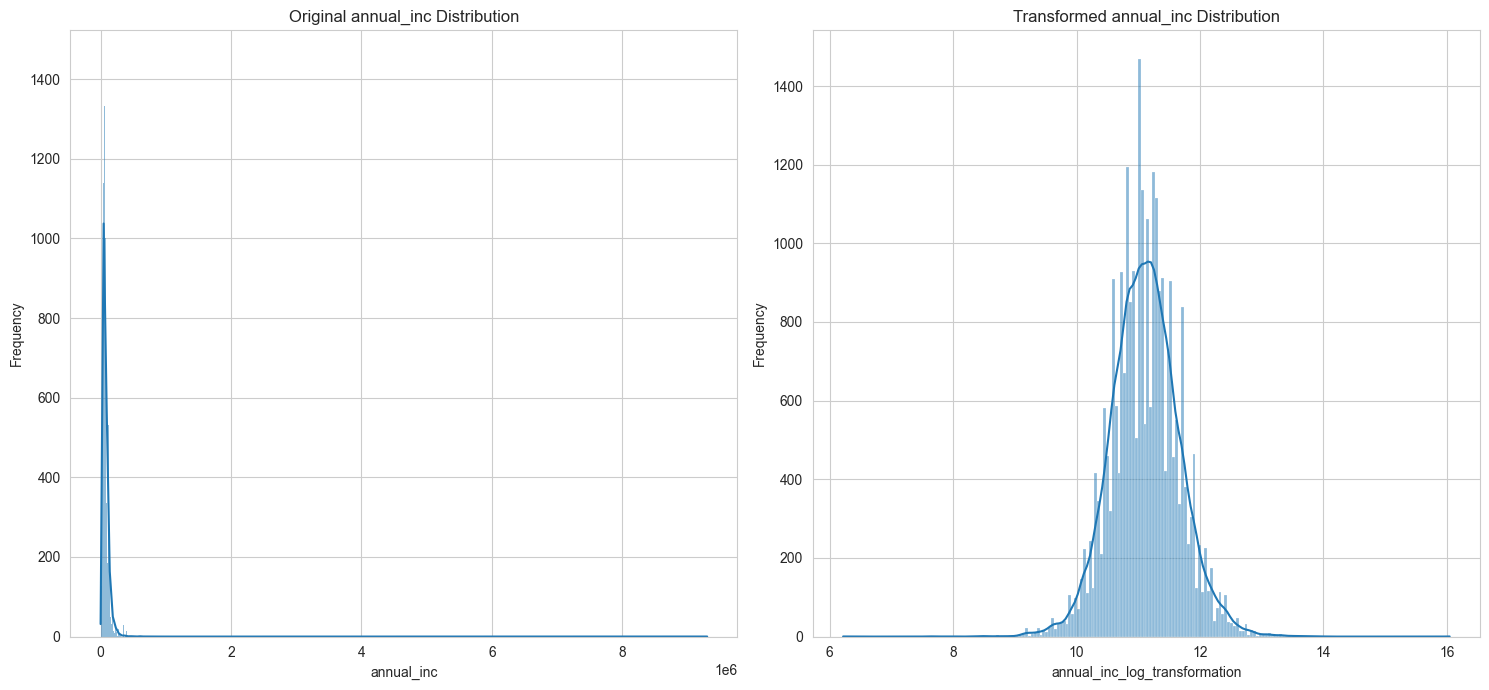

In [177]:
plot_original_vs_transformed_kde_hist(fintech_data_df_clean,'annual_inc','annual_inc_log_transformation')

The plot illustrates the KDE and histogram for the log-transformed `annual_inc` (annual income). The log transformation helps normalize the data, making it easier to analyze and visualize. 

In this distribution, we can see that the data is approximately normally distributed, with the highest frequency occurring around the log value of 10 to 12. This indicates that the majority of the observations fall within a certain range of annual incomes. The KDE curve provides a smoothed representation of this distribution, clearly showing the central tendency and spread of the data. 

Overall, the log transformation appears effective in reducing skewness and clarifying the underlying distribution of annual income in the dataset.

# 6. Handling outliers for `annual_inc_joint` 


using Log Transformation 

In [178]:
fintech_data_df_clean = handling_outliers_log_transformation(fintech_data_df_clean,'annual_inc_joint')

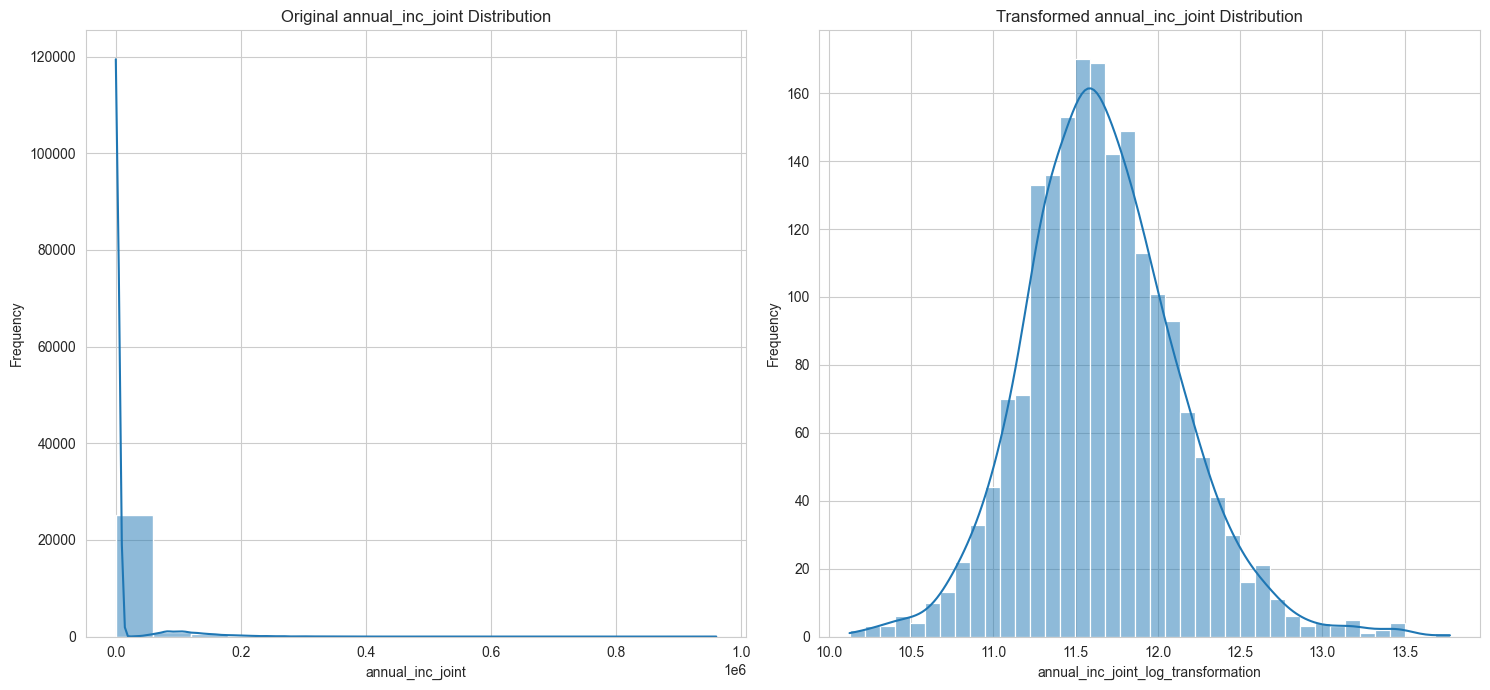

In [179]:
plot_original_vs_transformed_kde_hist(fintech_data_df_clean,'annual_inc_joint','annual_inc_joint_log_transformation')

Excluding the zero imputed values , this plot helps visualize how the log-transformed annual_inc_joint data is distributed, providing insights into the financial situation of joint income borrowers in the dataset.

## Findings and conclusions

# Observing outliers
1. Ignoring the `loan_id` ,`emp_length_year`and `grade` from our calculation for outliers
Becuase `loan_id` is unique not missing for each loan  is not missing will known for each area and for `emp_length_year` we have full data not missing with ranges from <1 year to 10+years no more and already created another column geting years in integer values and for `grade` we already have specified range so no need for detection outliers
2. `annual_inc` and `annual_inc_joint`
Best Method: IQR Method.
These features are heavily skewed towards lower values, with a long tail on the right. The IQR method works well for skewed data, as it uses the median and quartiles to identify outliers.
but ignoring the zero imputed vales for `annual_inc_joint` in detecting the outliers 
3.  `int_rate`:
Best Method: Z-Score Method.
The distribution appears more symmetric than other features. The Z-score method can effectively identify outliers in normally distributed or near-normal data.
4.  `loan_amount` and `funded_amount`
Best Method: IQR Method.
These features show multimodal distributions with some peaks, which indicates a non-normal distribution. The IQR method is better suited for such distributions as it is less sensitive to non-normality.
5.  `tot_cur_bal` and `avg_cur_bal`
Best Method: IQR Method.
These features show a significant right skew, indicating that some customers have very high balances. The IQR method is robust for identifying outliers in skewed distributions.

# Handling Outliers

1.  Handling Outliers in `int_rate` :
The distribution of int_rate is skewed, and a log transformation can help make it more normally distributed by compressing the range of values and reducing the impact of extreme outliers.
But the transformed values are now on a different scale. 
as the interpretation of the transformed values differs from the original scale.
Using Root Square Transformation to handle the `int_rate` outlires:
The square root transformation applied to the `int_rate `feature
 reduces skewness and mitigates the influence of extreme values, resulting in a more symmetrical distribution. The Z-score comparison before and after the transformation shows fewer extreme outliers, indicating effective outlier handling while preserving the data's overall trends.

 2.  Handling Outliers in `tot_cur_bal` :
The KDE and histogram for the log-transformed `tot_cur_bal` show that the log transformation helped make the data more normal by reducing skewness. There are multiple peaks, suggesting different groups in the data (possibly various customer types). Most values are between 8 and 12 on the log scale, indicating where most customer balances lie. The left tail shows some very low values. Overall, the transformation helped reveal these patterns clearly.

 3.  Handle Outlier in `avg_cur_bal` :  
  This plot shows the distribution of the log-transformed total current balance (`avg_cur_bal`). By using the log transformation, the original skewness in the data has been reduced, making the distribution more bell-shaped. The presence of multiple peaks suggests that there could be different segments of customers with varying avg_cur_bal levels. Most avg_cur_bal lie within the log values of 8 to 12, while fewer customers have very high or very low avg_cur_bal. The transformation helped in visualizing the data more clearly and understanding the spread of customer avg_cur_bal.
 
4.  Handle Outlier in `loan_amount` :
This plot displays the KDE and histogram for the log-transformed `loan_amount`, showing the distribution after transformation. The log transformation has made the data more symmetric, reducing skewness. The histogram reveals multiple peaks, indicating different customer segments with varying loan_amount levels. The most common log values fall between 8 and 10.5, suggesting that a significant portion of customers have loan_amount within this range. The smooth KDE curve helps to visualize the overall shape and density of the data, showing the variations in customer loan_amount distribution.

5.  Handling outliers for `funded_amount` :
it is the same data of `loan_amount` so we can useing log transformation.

6.  Handling outliers for `annual_inc`: 
The plot illustrates the KDE and histogram for the log-transformed `annual_inc` (annual income). The log transformation helps normalize the data, making it easier to analyze and visualize. 
7. Handling Outliers for `annual_inc_joint` ignoring the zero imputed vales as `MNAR` Using log transformation.



# 4 - Data transformation and feature eng.

## 4.1 - Adding Columns

# 1. Add `month_number` Column:

In [ ]:
def create_month_number_column(df):
    df['issue_date'] = pd.to_datetime(df['issue_date'])
    df['month_number'] = df['issue_date'].dt.month
    return df

In [ ]:
fintech_data_df_clean = create_month_number_column(fintech_data_df_clean)

In [182]:
print(fintech_data_df_clean[['issue_date', 'month_number']].head())


                                                   issue_date  month_number
customer_id                                                                
YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE... 2014-03-14             3
YidPXHg4YSlJXHgwMFx4ZTBcblx4ZDlceGZmW25ceGNjXHg... 2016-04-16             4
YidceGU2XHhiZVx4MTZceGZiXHhlMVx4ZmVceGQ0XHhmYyx... 2014-03-14             3
YidceGZkXHhkYlx4YWE7XHg4M1x4YzhZXHhkM0R0e1x4ZDZ... 2018-03-18             3
YidceGQxXHhlN1x4YjdceGNkXHhiYVx4ZDZceGEyXHgxMSZ... 2017-03-17             3


# 2. Add `salary_can_cover` Column:

In [ ]:

def create_salary_can_cover_column(df):
    df['salary_can_cover'] = (df['annual_inc'] >= df['loan_amount']).astype(int)
    return df

In [ ]:
fintech_data_df_clean = create_salary_can_cover_column(fintech_data_df_clean)

In [185]:
print(fintech_data_df_clean[['annual_inc', 'loan_amount', 'salary_can_cover']].head())


                                                    annual_inc  loan_amount  \
customer_id                                                                   
YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE...     85000.0      20000.0   
YidPXHg4YSlJXHgwMFx4ZTBcblx4ZDlceGZmW25ceGNjXHg...     98000.0      30000.0   
YidceGU2XHhiZVx4MTZceGZiXHhlMVx4ZmVceGQ0XHhmYyx...     45000.0       7000.0   
YidceGZkXHhkYlx4YWE7XHg4M1x4YzhZXHhkM0R0e1x4ZDZ...     52000.0      12000.0   
YidceGQxXHhlN1x4YjdceGNkXHhiYVx4ZDZceGEyXHgxMSZ...     34000.0       9600.0   

                                                    salary_can_cover  
customer_id                                                           
YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE...                 1  
YidPXHg4YSlJXHgwMFx4ZTBcblx4ZDlceGZmW25ceGNjXHg...                 1  
YidceGU2XHhiZVx4MTZceGZiXHhlMVx4ZmVceGQ0XHhmYyx...                 1  
YidceGZkXHhkYlx4YWE7XHg4M1x4YzhZXHhkM0R0e1x4ZDZ...                 1  
YidceGQxXHhlN1x4Yjdc

# 3. Add `letter_grade` Column:

In [ ]:

def create_letter_grade_column(df):

    grade_mapping = {
        1: 'A', 2: 'A', 3: 'A', 4: 'A', 5: 'A',
        6: 'B', 7: 'B', 8: 'B', 9: 'B', 10: 'B',
        11: 'C', 12: 'C', 13: 'C', 14: 'C', 15: 'C',
        16: 'D', 17: 'D', 18: 'D', 19: 'D', 20: 'D',
        21: 'E', 22: 'E', 23: 'E', 24: 'E', 25: 'E',
        26: 'F', 27: 'F', 28: 'F', 29: 'F', 30: 'F',
        31: 'G', 32: 'G', 33: 'G', 34: 'G', 35: 'G'
    }
    df['letter_grade'] = df['grade'].map(grade_mapping)
    return df

In [ ]:
fintech_data_df_clean = create_letter_grade_column(fintech_data_df_clean)


In [188]:

print(fintech_data_df_clean[['grade', 'letter_grade']].head())


                                                    grade letter_grade
customer_id                                                           
YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE...      7            B
YidPXHg4YSlJXHgwMFx4ZTBcblx4ZDlceGZmW25ceGNjXHg...     11            C
YidceGU2XHhiZVx4MTZceGZiXHhlMVx4ZmVceGQ0XHhmYyx...     15            C
YidceGZkXHhkYlx4YWE7XHg4M1x4YzhZXHhkM0R0e1x4ZDZ...     13            C
YidceGQxXHhlN1x4YjdceGNkXHhiYVx4ZDZceGEyXHgxMSZ...     20            D


In [189]:
fintech_data_df_clean.columns

Index(['emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'annual_inc_joint', 'verification_status', 'zip_code', 'addr_state',
       'avg_cur_bal', 'tot_cur_bal', 'loan_id', 'loan_status', 'loan_amount',
       'state', 'funded_amount', 'term', 'int_rate', 'grade', 'issue_date',
       'pymnt_plan', 'type', 'purpose', 'description', 'loan_amount_bin',
       'missing_int_rate', 'income_range_title', 'emp_title_missing',
       'emp_length_missing', 'income_range_length', 'emp_length_years',
       'int_rate_log_transformation', 'int_rate_sqrt_transformation',
       'tot_cur_bal_capped', 'tot_cur_bal_log_transformation',
       'avg_cur_bal_capped', 'avg_cur_bal_log_transformation',
       'loan_amount_capped', 'loan_amount_log_transformation',
       'funded_amount_capped', 'funded_amount_log_transformation',
       'annual_inc_capped', 'annual_inc_log_transformation',
       'annual_inc_joint_log_transformation', 'month_number',
       'salary_can_cover', 'letter_grad

# 4. Add `installment_per_month` Column:

In [ ]:
def create_installment_per_month_column(df):

    def calculate_installment(row):
        P = row['loan_amount']
        r = row['int_rate'] / 12 / 100 
        n = int(row['term'].split()[0]) 
        if r == 0:  
            return P / n
        M = P * (r * (1 + r) ** n) / ((1 + r) ** n - 1)
        return M
    
    df['installment_per_month'] = df.apply(calculate_installment, axis=1)
    return df




In [ ]:
fintech_data_df_clean = create_installment_per_month_column(fintech_data_df_clean)


In [192]:

print(fintech_data_df_clean[['loan_amount', 'int_rate', 'term', 'installment_per_month']].head())


                                                    loan_amount  int_rate  \
customer_id                                                                 
YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE...      20000.0    0.1249   
YidPXHg4YSlJXHgwMFx4ZTBcblx4ZDlceGZmW25ceGNjXHg...      30000.0    0.1531   
YidceGU2XHhiZVx4MTZceGZiXHhlMVx4ZmVceGQ0XHhmYyx...       7000.0    0.1416   
YidceGZkXHhkYlx4YWE7XHg4M1x4YzhZXHhkM0R0e1x4ZDZ...      12000.0    0.1261   
YidceGQxXHhlN1x4YjdceGNkXHhiYVx4ZDZceGEyXHgxMSZ...       9600.0    0.1799   

                                                          term  \
customer_id                                                      
YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE...   36 months   
YidPXHg4YSlJXHgwMFx4ZTBcblx4ZDlceGZmW25ceGNjXHg...   36 months   
YidceGU2XHhiZVx4MTZceGZiXHhlMVx4ZmVceGQ0XHhmYyx...   36 months   
YidceGZkXHhkYlx4YWE7XHg4M1x4YzhZXHhkM0R0e1x4ZDZ...   36 months   
YidceGQxXHhlN1x4YjdceGNkXHhiYVx4ZDZceGEyXHgxMSZ...   36 months  

## 4.2 - Encoding

# 1. Encoding for `home_ownership` for the values `RENT` , `OWN` , `MORTGAGE` AND `OTHER` 
since we have only 4 values we can use 1 hot encoding for `home_ownership` as One-hot encoding is used for categorical variables that do not have an intrinsic order.
 `home_ownership` represent distinct categories with no natural order

I have created a function to be used for all One-Hot encoding features 

In [ ]:
def apply_one_hot_encoding(df, feature_name):
    one_hot_encoded = pd.get_dummies(df[feature_name], prefix=feature_name)
    df = pd.concat([df, one_hot_encoded], axis=1)
    return df


In [ ]:
fintech_data_df_clean = apply_one_hot_encoding(fintech_data_df_clean, 'home_ownership')
print(fintech_data_df_clean.head())

                                                                         emp_title  \
customer_id                                                                          
YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE...                registered_nurse   
YidPXHg4YSlJXHgwMFx4ZTBcblx4ZDlceGZmW25ceGNjXHg...  financial_readiness_specialist   
YidceGU2XHhiZVx4MTZceGZiXHhlMVx4ZmVceGQ0XHhmYyx...                      sanitation   
YidceGZkXHhkYlx4YWE7XHg4M1x4YzhZXHhkM0R0e1x4ZDZ...                    grant_writer   
YidceGQxXHhlN1x4YjdceGNkXHhiYVx4ZDZceGEyXHgxMSZ...                   asst._manager   

                                                   emp_length home_ownership  \
customer_id                                                                    
YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE...    8 years           RENT   
YidPXHg4YSlJXHgwMFx4ZTBcblx4ZDlceGZmW25ceGNjXHg...  10+ years       MORTGAGE   
YidceGU2XHhiZVx4MTZceGZiXHhlMVx4ZmVceGQ0XHhmYyx...    3 years            OWN 

In [195]:
fintech_data_df_clean.sample()

emp_title  \
customer_id                                                                     
YidceDg2TVx4YWUkXHhiMlx4ZDFceGE1XHgwMXlceDBmeVx...  1st_american_home_tenders   

                                                   emp_length home_ownership  \
customer_id                                                                    
YidceDg2TVx4YWUkXHhiMlx4ZDFceGE1XHgwMXlceDBmeVx...   < 1 year           RENT   

                                                    annual_inc  \
customer_id                                                      
YidceDg2TVx4YWUkXHhiMlx4ZDFceGE1XHgwMXlceDBmeVx...     65000.0   

                                                    annual_inc_joint  \
customer_id                                                            
YidceDg2TVx4YWUkXHhiMlx4ZDFceGE1XHgwMXlceDBmeVx...               0.0   

                                                   verification_status  \
customer_id                                                              
YidceDg2TVx4YWUkXHhiMlx4ZDFceGE1XHgwMXlceDBmeVx...     Source Verified   

                                                   zip_code addr_state  \
customer_id                                                              
YidceDg2TVx4YWUkXHhiMlx4ZDFceGE1XHgwMXlceDBmeVx...    770xx         TX   

                                                    avg_cur_bal  tot_cur_bal  \
customer_id                                                                    
YidceDg2TVx4YWUkXHhiMlx4ZDFceGE1XHgwMXlceDBmeVx...       5392.0      26962.0   

                                                    ...  \
customer_id                                         ...   
YidceDg2TVx4YWUkXHhiMlx4ZDFceGE1XHgwMXlceDBmeVx...  ...   

                                                    annual_inc_log_transformation  \
customer_id                                                                         
YidceDg2TVx4YWUkXHhiMlx4ZDFceGE1XHgwMXlceDBmeVx...                      11.082158   

                                                   annual_inc_joint_log_transformation  \
customer_id                                                                              
YidceDg2TVx4YWUkXHhiMlx4ZDFceGE1XHgwMXlceDBmeVx...                                 NaN   

                                                    month_number  \
customer_id                                                        
YidceDg2TVx4YWUkXHhiMlx4ZDFceGE1XHgwMXlceDBmeVx...             6   

                                                   salary_can_cover  \
customer_id                                                           
YidceDg2TVx4YWUkXHhiMlx4ZDFceGE1XHgwMXlceDBmeVx...                1   

                                                    letter_grade  \
customer_id                                                        
YidceDg2TVx4YWUkXHhiMlx4ZDFceGE1XHgwMXlceDBmeVx...             D   

                                                   installment_per_month  \
customer_id                                                                
YidceDg2TVx4YWUkXHhiMlx4ZDFceGE1XHgwMXlceDBmeVx...            334.815549   

                                                    home_ownership_MORTGAGE  \
customer_id                                                                   
YidceDg2TVx4YWUkXHhiMlx4ZDFceGE1XHgwMXlceDBmeVx...                    False   

                                                    home_ownership_OTHER  \
customer_id                                                                
YidceDg2TVx4YWUkXHhiMlx4ZDFceGE1XHgwMXlceDBmeVx...                 False   

                                                   home_ownership_OWN  \
customer_id                                                             
YidceDg2TVx4YWUkXHhiMlx4ZDFceGE1XHgwMXlceDBmeVx...              False   

                                                    home_ownership_RENT  
customer_id                                                              
YidceDg2TVx4YWUkXHhiMlx4ZDFceGE1XHgwMXlceDBmeVx...                 True  

[1 rows x 51

# 2. Encoding for `verification_status` for the values `Verified` , `Not Verified` , `Source Verified` 
since we have only 3 values we can use 1 hot encoding for `verification_status` as One-hot encoding is used for categorical variables that do not have an intrinsic order.
 `verification_status` represent distinct categories with no natural order

In [ ]:
fintech_data_df_clean = apply_one_hot_encoding(fintech_data_df_clean, 'verification_status')
print(fintech_data_df_clean.head())

                                                                         emp_title  \
customer_id                                                                          
YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE...                registered_nurse   
YidPXHg4YSlJXHgwMFx4ZTBcblx4ZDlceGZmW25ceGNjXHg...  financial_readiness_specialist   
YidceGU2XHhiZVx4MTZceGZiXHhlMVx4ZmVceGQ0XHhmYyx...                      sanitation   
YidceGZkXHhkYlx4YWE7XHg4M1x4YzhZXHhkM0R0e1x4ZDZ...                    grant_writer   
YidceGQxXHhlN1x4YjdceGNkXHhiYVx4ZDZceGEyXHgxMSZ...                   asst._manager   

                                                   emp_length home_ownership  \
customer_id                                                                    
YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE...    8 years           RENT   
YidPXHg4YSlJXHgwMFx4ZTBcblx4ZDlceGZmW25ceGNjXHg...  10+ years       MORTGAGE   
YidceGU2XHhiZVx4MTZceGZiXHhlMVx4ZmVceGQ0XHhmYyx...    3 years            OWN 

In [197]:
fintech_data_df_clean.sample()

emp_title  \
customer_id                                                              
YidceGY5XHhhMmJceGEwXHhmOWZceDBiXlx4OTJHXHg4Ylx...  jr._escrow_officer   

                                                   emp_length home_ownership  \
customer_id                                                                    
YidceGY5XHhhMmJceGEwXHhmOWZceDBiXlx4OTJHXHg4Ylx...    2 years       MORTGAGE   

                                                    annual_inc  \
customer_id                                                      
YidceGY5XHhhMmJceGEwXHhmOWZceDBiXlx4OTJHXHg4Ylx...    110000.0   

                                                    annual_inc_joint  \
customer_id                                                            
YidceGY5XHhhMmJceGEwXHhmOWZceDBiXlx4OTJHXHg4Ylx...               0.0   

                                                   verification_status  \
customer_id                                                              
YidceGY5XHhhMmJceGEwXHhmOWZceDBiXlx4OTJHXHg4Ylx...     Source Verified   

                                                   zip_code addr_state  \
customer_id                                                              
YidceGY5XHhhMmJceGEwXHhmOWZceDBiXlx4OTJHXHg4Ylx...    920xx         CA   

                                                    avg_cur_bal  tot_cur_bal  \
customer_id                                                                    
YidceGY5XHhhMmJceGEwXHhmOWZceDBiXlx4OTJHXHg4Ylx...      36563.0     402192.0   

                                                    ...  salary_can_cover  \
customer_id                                         ...                     
YidceGY5XHhhMmJceGEwXHhmOWZceDBiXlx4OTJHXHg4Ylx...  ...                 1   

                                                   letter_grade  \
customer_id                                                       
YidceGY5XHhhMmJceGEwXHhmOWZceDBiXlx4OTJHXHg4Ylx...            B   

                                                    installment_per_month  \
customer_id                                                                 
YidceGY5XHhhMmJceGEwXHhmOWZceDBiXlx4OTJHXHg4Ylx...             333.894283   

                                                   home_ownership_MORTGAGE  \
customer_id                                                                  
YidceGY5XHhhMmJceGEwXHhmOWZceDBiXlx4OTJHXHg4Ylx...                    True   

                                                    home_ownership_OTHER  \
customer_id                                                                
YidceGY5XHhhMmJceGEwXHhmOWZceDBiXlx4OTJHXHg4Ylx...                 False   

                                                   home_ownership_OWN  \
customer_id                                                             
YidceGY5XHhhMmJceGEwXHhmOWZceDBiXlx4OTJHXHg4Ylx...              False   

                                                    home_ownership_RENT  \
customer_id                                                               
YidceGY5XHhhMmJceGEwXHhmOWZceDBiXlx4OTJHXHg4Ylx...                False   

                                                    verification_status_Not Verified  \
customer_id                                                                            
YidceGY5XHhhMmJceGEwXHhmOWZceDBiXlx4OTJHXHg4Ylx...                             False   

                                                   verification_status_Source Verified  \
customer_id                                                                              
YidceGY5XHhhMmJceGEwXHhmOWZceDBiXlx4OTJHXHg4Ylx...                                True   

                                                    verification_status_Verified  
customer_id                                                                       
YidceGY5XHhhMmJceGEwXHhmOWZceDBiXlx4OTJHXHg4Ylx...                         False  

[1 rows x 54 columns]

# 3. Encoding for `term` for the values `36 month` , `60 month` 
since we have only 2 values we can use 1 hot encoding for `term` as One-hot encoding is used for categorical variables that no value have higher priority than the other one . 
`term` represent distinct categories with no natural order

In [ ]:
fintech_data_df_clean = apply_one_hot_encoding(fintech_data_df_clean, 'term')
print(fintech_data_df_clean.head())

                                                                         emp_title  \
customer_id                                                                          
YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE...                registered_nurse   
YidPXHg4YSlJXHgwMFx4ZTBcblx4ZDlceGZmW25ceGNjXHg...  financial_readiness_specialist   
YidceGU2XHhiZVx4MTZceGZiXHhlMVx4ZmVceGQ0XHhmYyx...                      sanitation   
YidceGZkXHhkYlx4YWE7XHg4M1x4YzhZXHhkM0R0e1x4ZDZ...                    grant_writer   
YidceGQxXHhlN1x4YjdceGNkXHhiYVx4ZDZceGEyXHgxMSZ...                   asst._manager   

                                                   emp_length home_ownership  \
customer_id                                                                    
YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE...    8 years           RENT   
YidPXHg4YSlJXHgwMFx4ZTBcblx4ZDlceGZmW25ceGNjXHg...  10+ years       MORTGAGE   
YidceGU2XHhiZVx4MTZceGZiXHhlMVx4ZmVceGQ0XHhmYyx...    3 years            OWN 

In [199]:
fintech_data_df_clean.sample()

emp_title  \
customer_id                                                            
YidMd1x4ZDldXHg4Y1x4MGNceGMxXHhkZiNceGVhQS5ceGQ...  automotive_sales   

                                                   emp_length home_ownership  \
customer_id                                                                    
YidMd1x4ZDldXHg4Y1x4MGNceGMxXHhkZiNceGVhQS5ceGQ...    2 years           RENT   

                                                    annual_inc  \
customer_id                                                      
YidMd1x4ZDldXHg4Y1x4MGNceGMxXHhkZiNceGVhQS5ceGQ...     60000.0   

                                                    annual_inc_joint  \
customer_id                                                            
YidMd1x4ZDldXHg4Y1x4MGNceGMxXHhkZiNceGVhQS5ceGQ...               0.0   

                                                   verification_status  \
customer_id                                                              
YidMd1x4ZDldXHg4Y1x4MGNceGMxXHhkZiNceGVhQS5ceGQ...     Source Verified   

                                                   zip_code addr_state  \
customer_id                                                              
YidMd1x4ZDldXHg4Y1x4MGNceGMxXHhkZiNceGVhQS5ceGQ...    549xx         WI   

                                                    avg_cur_bal  tot_cur_bal  \
customer_id                                                                    
YidMd1x4ZDldXHg4Y1x4MGNceGMxXHhkZiNceGVhQS5ceGQ...       3860.0      27017.0   

                                                    ...  \
customer_id                                         ...   
YidMd1x4ZDldXHg4Y1x4MGNceGMxXHhkZiNceGVhQS5ceGQ...  ...   

                                                    installment_per_month  \
customer_id                                                                 
YidMd1x4ZDldXHg4Y1x4MGNceGMxXHhkZiNceGVhQS5ceGQ...             333.721976   

                                                   home_ownership_MORTGAGE  \
customer_id                                                                  
YidMd1x4ZDldXHg4Y1x4MGNceGMxXHhkZiNceGVhQS5ceGQ...                   False   

                                                    home_ownership_OTHER  \
customer_id                                                                
YidMd1x4ZDldXHg4Y1x4MGNceGMxXHhkZiNceGVhQS5ceGQ...                 False   

                                                   home_ownership_OWN  \
customer_id                                                             
YidMd1x4ZDldXHg4Y1x4MGNceGMxXHhkZiNceGVhQS5ceGQ...              False   

                                                    home_ownership_RENT  \
customer_id                                                               
YidMd1x4ZDldXHg4Y1x4MGNceGMxXHhkZiNceGVhQS5ceGQ...                 True   

                                                   verification_status_Not Verified  \
customer_id                                                                           
YidMd1x4ZDldXHg4Y1x4MGNceGMxXHhkZiNceGVhQS5ceGQ...                            False   

                                                    verification_status_Source Verified  \
customer_id                                                                               
YidMd1x4ZDldXHg4Y1x4MGNceGMxXHhkZiNceGVhQS5ceGQ...                                 True   

                                                    verification_status_Verified  \
customer_id                                                                        
YidMd1x4ZDldXHg4Y1x4MGNceGMxXHhkZiNceGVhQS5ceGQ...                         False   

                                                   term_ 36 months  \
customer_id                                                          
YidMd1x4ZDldXHg4Y1x4MGNceGMxXHhkZiNceGVhQS5ceGQ...            True   

                                                    term_ 60 months  
customer_id                                                          
YidMd1x4ZDldXHg4Y1x4MGNceGMxXHhkZiNceG

# 4. Encoding for `loan_status` for the values `Current` , `Fully Paid `,`Charged Off `,`Late (31-120 days) `,`In Grace Period`,`Late (16-30 days)`,`Default`
    

since we have only 7 values we can use 1 hot encoding for `loan_status` as loan statuses represent distinct categories with no natural order

In [ ]:
fintech_data_df_clean = apply_one_hot_encoding(fintech_data_df_clean, 'loan_status')
print(fintech_data_df_clean.head())

                                                                         emp_title  \
customer_id                                                                          
YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE...                registered_nurse   
YidPXHg4YSlJXHgwMFx4ZTBcblx4ZDlceGZmW25ceGNjXHg...  financial_readiness_specialist   
YidceGU2XHhiZVx4MTZceGZiXHhlMVx4ZmVceGQ0XHhmYyx...                      sanitation   
YidceGZkXHhkYlx4YWE7XHg4M1x4YzhZXHhkM0R0e1x4ZDZ...                    grant_writer   
YidceGQxXHhlN1x4YjdceGNkXHhiYVx4ZDZceGEyXHgxMSZ...                   asst._manager   

                                                   emp_length home_ownership  \
customer_id                                                                    
YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE...    8 years           RENT   
YidPXHg4YSlJXHgwMFx4ZTBcblx4ZDlceGZmW25ceGNjXHg...  10+ years       MORTGAGE   
YidceGU2XHhiZVx4MTZceGZiXHhlMVx4ZmVceGQ0XHhmYyx...    3 years            OWN 

In [201]:
fintech_data_df_clean.sample()

emp_title emp_length  \
customer_id                                                               
YidRXHhmZFx4OGRceDkxKlx4MDNceGEyXHhlNFx4ZjlNe1x...  mechanic  10+ years   

                                                   home_ownership  annual_inc  \
customer_id                                                                     
YidRXHhmZFx4OGRceDkxKlx4MDNceGEyXHhlNFx4ZjlNe1x...       MORTGAGE     86000.0   

                                                    annual_inc_joint  \
customer_id                                                            
YidRXHhmZFx4OGRceDkxKlx4MDNceGEyXHhlNFx4ZjlNe1x...               0.0   

                                                   verification_status  \
customer_id                                                              
YidRXHhmZFx4OGRceDkxKlx4MDNceGEyXHhlNFx4ZjlNe1x...        Not Verified   

                                                   zip_code addr_state  \
customer_id                                                              
YidRXHhmZFx4OGRceDkxKlx4MDNceGEyXHhlNFx4ZjlNe1x...    806xx         CO   

                                                    avg_cur_bal  tot_cur_bal  \
customer_id                                                                    
YidRXHhmZFx4OGRceDkxKlx4MDNceGEyXHhlNFx4ZjlNe1x...      24654.0     172580.0   

                                                    ...  \
customer_id                                         ...   
YidRXHhmZFx4OGRceDkxKlx4MDNceGEyXHhlNFx4ZjlNe1x...  ...   

                                                    verification_status_Verified  \
customer_id                                                                        
YidRXHhmZFx4OGRceDkxKlx4MDNceGEyXHhlNFx4ZjlNe1x...                         False   

                                                   term_ 36 months  \
customer_id                                                          
YidRXHhmZFx4OGRceDkxKlx4MDNceGEyXHhlNFx4ZjlNe1x...            True   

                                                    term_ 60 months  \
customer_id                                                           
YidRXHhmZFx4OGRceDkxKlx4MDNceGEyXHhlNFx4ZjlNe1x...            False   

                                                   loan_status_Charged Off  \
customer_id                                                                  
YidRXHhmZFx4OGRceDkxKlx4MDNceGEyXHhlNFx4ZjlNe1x...                   False   

                                                    loan_status_Current  \
customer_id                                                               
YidRXHhmZFx4OGRceDkxKlx4MDNceGEyXHhlNFx4ZjlNe1x...                 True   

                                                   loan_status_Default  \
customer_id                                                              
YidRXHhmZFx4OGRceDkxKlx4MDNceGEyXHhlNFx4ZjlNe1x...               False   

                                                    loan_status_Fully Paid  \
customer_id                                                                  
YidRXHhmZFx4OGRceDkxKlx4MDNceGEyXHhlNFx4ZjlNe1x...                   False   

                                                    loan_status_In Grace Period  \
customer_id                                                                       
YidRXHhmZFx4OGRceDkxKlx4MDNceGEyXHhlNFx4ZjlNe1x...                        False   

                                                   loan_status_Late (16-30 days)  \
customer_id                                                                        
YidRXHhmZFx4OGRceDkxKlx4MDNceGEyXHhlNFx4ZjlNe1x...                         False   

                                                    loan_status_Late (31-120 days)  
customer_id                                                                         
YidRXHhmZFx4OGRceDkxKlx4MDNceGEyXHhlNFx4ZjlNe1x...                           False  

[1 rows x 63 columns]

# 5. Encoding for `type` for the values `individual` , `joint` and `direct_pay`
    
since we have only 3 values we can use 1 hot encoding for `type` as it represent distinct categories values with no natural order .

In [ ]:
fintech_data_df_clean = apply_one_hot_encoding(fintech_data_df_clean, 'type')
print(fintech_data_df_clean.head())

                                                                         emp_title  \
customer_id                                                                          
YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE...                registered_nurse   
YidPXHg4YSlJXHgwMFx4ZTBcblx4ZDlceGZmW25ceGNjXHg...  financial_readiness_specialist   
YidceGU2XHhiZVx4MTZceGZiXHhlMVx4ZmVceGQ0XHhmYyx...                      sanitation   
YidceGZkXHhkYlx4YWE7XHg4M1x4YzhZXHhkM0R0e1x4ZDZ...                    grant_writer   
YidceGQxXHhlN1x4YjdceGNkXHhiYVx4ZDZceGEyXHgxMSZ...                   asst._manager   

                                                   emp_length home_ownership  \
customer_id                                                                    
YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE...    8 years           RENT   
YidPXHg4YSlJXHgwMFx4ZTBcblx4ZDlceGZmW25ceGNjXHg...  10+ years       MORTGAGE   
YidceGU2XHhiZVx4MTZceGZiXHhlMVx4ZmVceGQ0XHhmYyx...    3 years            OWN 

In [203]:
fintech_data_df_clean.sample()

emp_title  \
customer_id                                                              
YiInXHhjM1x4OWRceGRhV1x4ZDMxXHhjN2VceGU5XHgxYlx...  laboratory_manager   

                                                   emp_length home_ownership  \
customer_id                                                                    
YiInXHhjM1x4OWRceGRhV1x4ZDMxXHhjN2VceGU5XHgxYlx...  10+ years            OWN   

                                                    annual_inc  \
customer_id                                                      
YiInXHhjM1x4OWRceGRhV1x4ZDMxXHhjN2VceGU5XHgxYlx...     56000.0   

                                                    annual_inc_joint  \
customer_id                                                            
YiInXHhjM1x4OWRceGRhV1x4ZDMxXHhjN2VceGU5XHgxYlx...               0.0   

                                                   verification_status  \
customer_id                                                              
YiInXHhjM1x4OWRceGRhV1x4ZDMxXHhjN2VceGU5XHgxYlx...        Not Verified   

                                                   zip_code addr_state  \
customer_id                                                              
YiInXHhjM1x4OWRceGRhV1x4ZDMxXHhjN2VceGU5XHgxYlx...    570xx         SD   

                                                    avg_cur_bal  tot_cur_bal  \
customer_id                                                                    
YiInXHhjM1x4OWRceGRhV1x4ZDMxXHhjN2VceGU5XHgxYlx...      10822.0     129869.0   

                                                    ...  loan_status_Current  \
customer_id                                         ...                        
YiInXHhjM1x4OWRceGRhV1x4ZDMxXHhjN2VceGU5XHgxYlx...  ...                 True   

                                                   loan_status_Default  \
customer_id                                                              
YiInXHhjM1x4OWRceGRhV1x4ZDMxXHhjN2VceGU5XHgxYlx...               False   

                                                    loan_status_Fully Paid  \
customer_id                                                                  
YiInXHhjM1x4OWRceGRhV1x4ZDMxXHhjN2VceGU5XHgxYlx...                   False   

                                                   loan_status_In Grace Period  \
customer_id                                                                      
YiInXHhjM1x4OWRceGRhV1x4ZDMxXHhjN2VceGU5XHgxYlx...                       False   

                                                    loan_status_Late (16-30 days)  \
customer_id                                                                         
YiInXHhjM1x4OWRceGRhV1x4ZDMxXHhjN2VceGU5XHgxYlx...                          False   

                                                   loan_status_Late (31-120 days)  \
customer_id                                                                         
YiInXHhjM1x4OWRceGRhV1x4ZDMxXHhjN2VceGU5XHgxYlx...                          False   

                                                    type_direct_pay  \
customer_id                                                           
YiInXHhjM1x4OWRceGRhV1x4ZDMxXHhjN2VceGU5XHgxYlx...            False   

                                                    type_individual  \
customer_id                                                           
YiInXHhjM1x4OWRceGRhV1x4ZDMxXHhjN2VceGU5XHgxYlx...             True   

                                                   type_joint  type_joint_app  
customer_id                                                                    
YiInXHhjM1x4OWRceGRhV1x4ZDMxXHhjN2VceGU5XHgxYlx...      False           False  

[1 rows x 67 columns]

## 6. Encoding for `letter_grade` column that we created from `grade` column using `label encoder` form sklearn becuase the features are ordinal  where the categories have a meaningful order. 

In [204]:
def apply_label_encoding(df, column_name):
    encoder = LabelEncoder()

    new_column_name = f"{column_name}_label_encoded"
    
    df[new_column_name] = encoder.fit_transform(df[column_name])
    return df

In [205]:

fintech_data_df_clean = apply_label_encoding(fintech_data_df_clean, 'letter_grade')
fintech_data_df_clean[['letter_grade', 'letter_grade_label_encoded']].sample(5)

letter_grade  \
customer_id                                                       
YidceGYwXHg5M1x4YWVceGY3XHg4OVx4MDVceDBiXHg5ZnF...            D   
YidceGI2XHhiYlx4MWVceGExbFx4ZmN8XHhlYlx4ZTZnXHg...            C   
YidceDllZFx4ZDZceGYycFx4OWZceGU2XHhkZm52XHg4ZFx...            C   
YidceDBiXHhjMFx4ZTFYXHg5ZStceGM1XHhkYVx4MTdceGY...            C   
Yid3XHhlZFx4ZDNceGY4dlx4ZTIleFx4MTVceGQ1a1x4MWR...            A   

                                                    letter_grade_label_encoded  
customer_id                                                                     
YidceGYwXHg5M1x4YWVceGY3XHg4OVx4MDVceDBiXHg5ZnF...                           3  
YidceGI2XHhiYlx4MWVceGExbFx4ZmN8XHhlYlx4ZTZnXHg...                           2  
YidceDllZFx4ZDZceGYycFx4OWZceGU2XHhkZm52XHg4ZFx...                           2  
YidceDBiXHhjMFx4ZTFYXHg5ZStceGM1XHhkYVx4MTdceGY...                           2  
Yid3XHhlZFx4ZDNceGY4dlx4ZTIleFx4MTVceGQ1a1x4MWR...                           0

## 7. Encoding for `state` column  using `label encoder` from sklearn 
becuase the features are ordinal  where the categories have a lexiographical order based on state appreviation 2 letters . 
I will drop the `state` feature after implementing the bonus .

In [206]:
fintech_data_df_clean = apply_label_encoding(fintech_data_df_clean, 'state')
fintech_data_df_clean[['state', 'state_label_encoded']].sample(10)

state  state_label_encoded
customer_id                                                                  
YidceGU5KFx4MDguXHg4Zlx4YjBceDAxeFx4YjQ6ISIvR1x...    CA                    4
YiInXHg5N1x4ODJceGY0SFx4YmJceGU0V11ceGMwRD1UX2Z...    MA                   18
YidceDFiXHhkN0gibytceGYwfX5ceGZka1x4OWMoXHhiZVx...    FL                    9
YidceGE4SC0oYFx4YmVceDhlXVx4YmFceDBmXHhjOFx4MTF...    SD                   40
YidNIlx4YzRnXHhlN3ZceDAyXHhlNWlceGM5Tn5ceGJjXHh...    LA                   17
YidceGMxXHg5OWRceGE4XHhiYVx4ZTNDXHgwMFx4ZGYpaTd...    CA                    4
Yic7XHgwOFx4OWRceGY1XHhhN1x4OTlceGQ3XHg5MlxyZVx...    CA                    4
YiJceDA4c1xyXHhhMVx4MDJwXHhiY1x4OWRceGY0XHhiMHp...    SC                   39
YidceDk3Ulx4ZDNceGJhMVx4YzRceGMxXHg4MVx4YjRceGM...    KY                   16
YidceGViZlx4ODZFa1x4YmJwXHg4Mlx4ZDVbXHhhMlx4Yzd...    CO                    5

## 8. Encoding for `addr_state` column  using `label encoder` from sklearn 
becuase the features are ordinal  where the categories have a lexiographical order based on state appreviation 2 letters . 
same as the `state` feature

In [207]:
fintech_data_df_clean = apply_label_encoding(fintech_data_df_clean, 'addr_state')
fintech_data_df_clean[['addr_state', 'addr_state_label_encoded']].sample(10)

addr_state  \
customer_id                                                     
YidDaVx4ZmIwXHhlMGk9XHhmY1x4OGNceGNkXHhmZFx4ZTl...         FL   
YidceDBmXHgxZFx4OGRMXHhkMlx4YjdceDgxOmlceGE2XHh...         PA   
YidceGM4dFx4ZTJdXHhmZVlceGZjQUpUZVx4OGUhXHhlNlx...         FL   
YidDLFN2XHhiNCZceGVhXHhmOTV7I1x4ZDNceGQxXHg4MVx...         FL   
YiJ7XHhkNVx4OTF6Plx4ZDVceDA4XHgwZVx4Yzk8ITxceGY...         NY   
YidceDFiTVx4OWRceGU5XHhkM1x4MTVceDg1WFx4MWRceGQ...         IL   
YidceGU3XHhjZFx4ZjBceDFiXHgxOUhceGEwSVx4ZTZceDg...         WA   
Yicoa1x4OTVceDg1aFx4MWJceGFmPi9ceGM2QFx4ZjhceGI...         MO   
Yic8XHgxNVx4ZDVceGQyXHhjM1x4YTlceGFlJlx4MDNceGY...         TX   
YidvazxceGZhXHg5YzZnXHgwNClceDFiXHhhYlx4MWJqXHh...         TX   

                                                    addr_state_label_encoded  
customer_id                                                                   
YidDaVx4ZmIwXHhlMGk9XHhmY1x4OGNceGNkXHhmZFx4ZTl...                         9  
YidceDBmXHgxZFx4OGRMXHhkMlx4YjdceDgxOmlceGE2XHh...                        37  
YidceGM4dFx4ZTJdXHhmZVlceGZjQUpUZVx4OGUhXHhlNlx...                         9  
YidDLFN2XHhiNCZceGVhXHhmOTV7I1x4ZDNceGQxXHg4MVx...                         9  
YiJ7XHhkNVx4OTF6Plx4ZDVceDA4XHgwZVx4Yzk8ITxceGY...                        33  
YidceDFiTVx4OWRceGU5XHhkM1x4MTVceDg1WFx4MWRceGQ...                        13  
YidceGU3XHhjZFx4ZjBceDFiXHgxOUhceGEwSVx4ZTZceDg...                        46  
Yicoa1x4OTVceDg1aFx4MWJceGFmPi9ceGM2QFx4ZjhceGI...                        23  
Yic8XHgxNVx4ZDVceGQyXHhjM1x4YTlceGFlJlx4MDNceGY...                        42  
YidvazxceGZhXHg5YzZnXHgwNClceDFiXHhhYlx4MWJqXHh...                        42

## 9. Encoding for `purpose` column  using `label encoder` from sklearn 


In [208]:
fintech_data_df_clean = apply_label_encoding(fintech_data_df_clean, 'purpose')
fintech_data_df_clean[['purpose', 'purpose_label_encoded']].sample(10)

purpose  \
customer_id                                                              
YidVXHg4YSpceGVmXHJceGU5XHgxNVx4YjFceDhjXHhhYlx...         credit_card   
YiInXHg4MlBtXHhhOEBGXHhlOVx4MGVceGZlKFx4YzIoXHh...               other   
YidceGNiXHhjNVx4YjhceGRlXHhjN1x4MGNceGJkflhceGU...         credit_card   
YidceDkyXHhhYzosO2gwXHg5OWY+VVx4ZjJceDE4XHhlNFx...  debt_consolidation   
YiJceGJjMEkyQFxuXHg5Zlx4YTZceGQwXHgwMFx4YTRpXHh...  debt_consolidation   
Yid+XHhmMVx4YWNceDgwXHg3ZkxceGVkXHhhZU5ceGJiXHh...         credit_card   
YidceDk0XHg5Y1x4YTBceGYzT1x4Y2NceDk5XHgxOVx4YTB...    home_improvement   
Yic5XHhiNVx4YzBceDlleD0kd1x4Y2RceGY2XHhhYSBxXHg...  debt_consolidation   
Yid8XHgxZFx4OGM4XHhkNlx4YTlceGRlRERceDk5XHg5NlR...  debt_consolidation   
YidceGQ1XHhjMlx4MWJpXHgxOVx4MTRceGM0XHhlOFx4MDF...         credit_card   

                                                    purpose_label_encoded  
customer_id                                                                
YidVXHg4YSpceGVmXHJceGU5XHgxNVx4YjFceDhjXHhhYlx...                      1  
YiInXHg4MlBtXHhhOEBGXHhlOVx4MGVceGZlKFx4YzIoXHh...                      8  
YidceGNiXHhjNVx4YjhceGRlXHhjN1x4MGNceGJkflhceGU...                      1  
YidceDkyXHhhYzosO2gwXHg5OWY+VVx4ZjJceDE4XHhlNFx...                      2  
YiJceGJjMEkyQFxuXHg5Zlx4YTZceGQwXHgwMFx4YTRpXHh...                      2  
Yid+XHhmMVx4YWNceDgwXHg3ZkxceGVkXHhhZU5ceGJiXHh...                      1  
YidceDk0XHg5Y1x4YTBceGYzT1x4Y2NceDk5XHgxOVx4YTB...                      3  
Yic5XHhiNVx4YzBceDlleD0kd1x4Y2RceGY2XHhhYSBxXHg...                      2  
Yid8XHgxZFx4OGM4XHhkNlx4YTlceGRlRERceDk5XHg5NlR...                      2  
YidceGQ1XHhjMlx4MWJpXHgxOVx4MTRceGM0XHhlOFx4MDF...                      1

# 4.3 - Normalization 

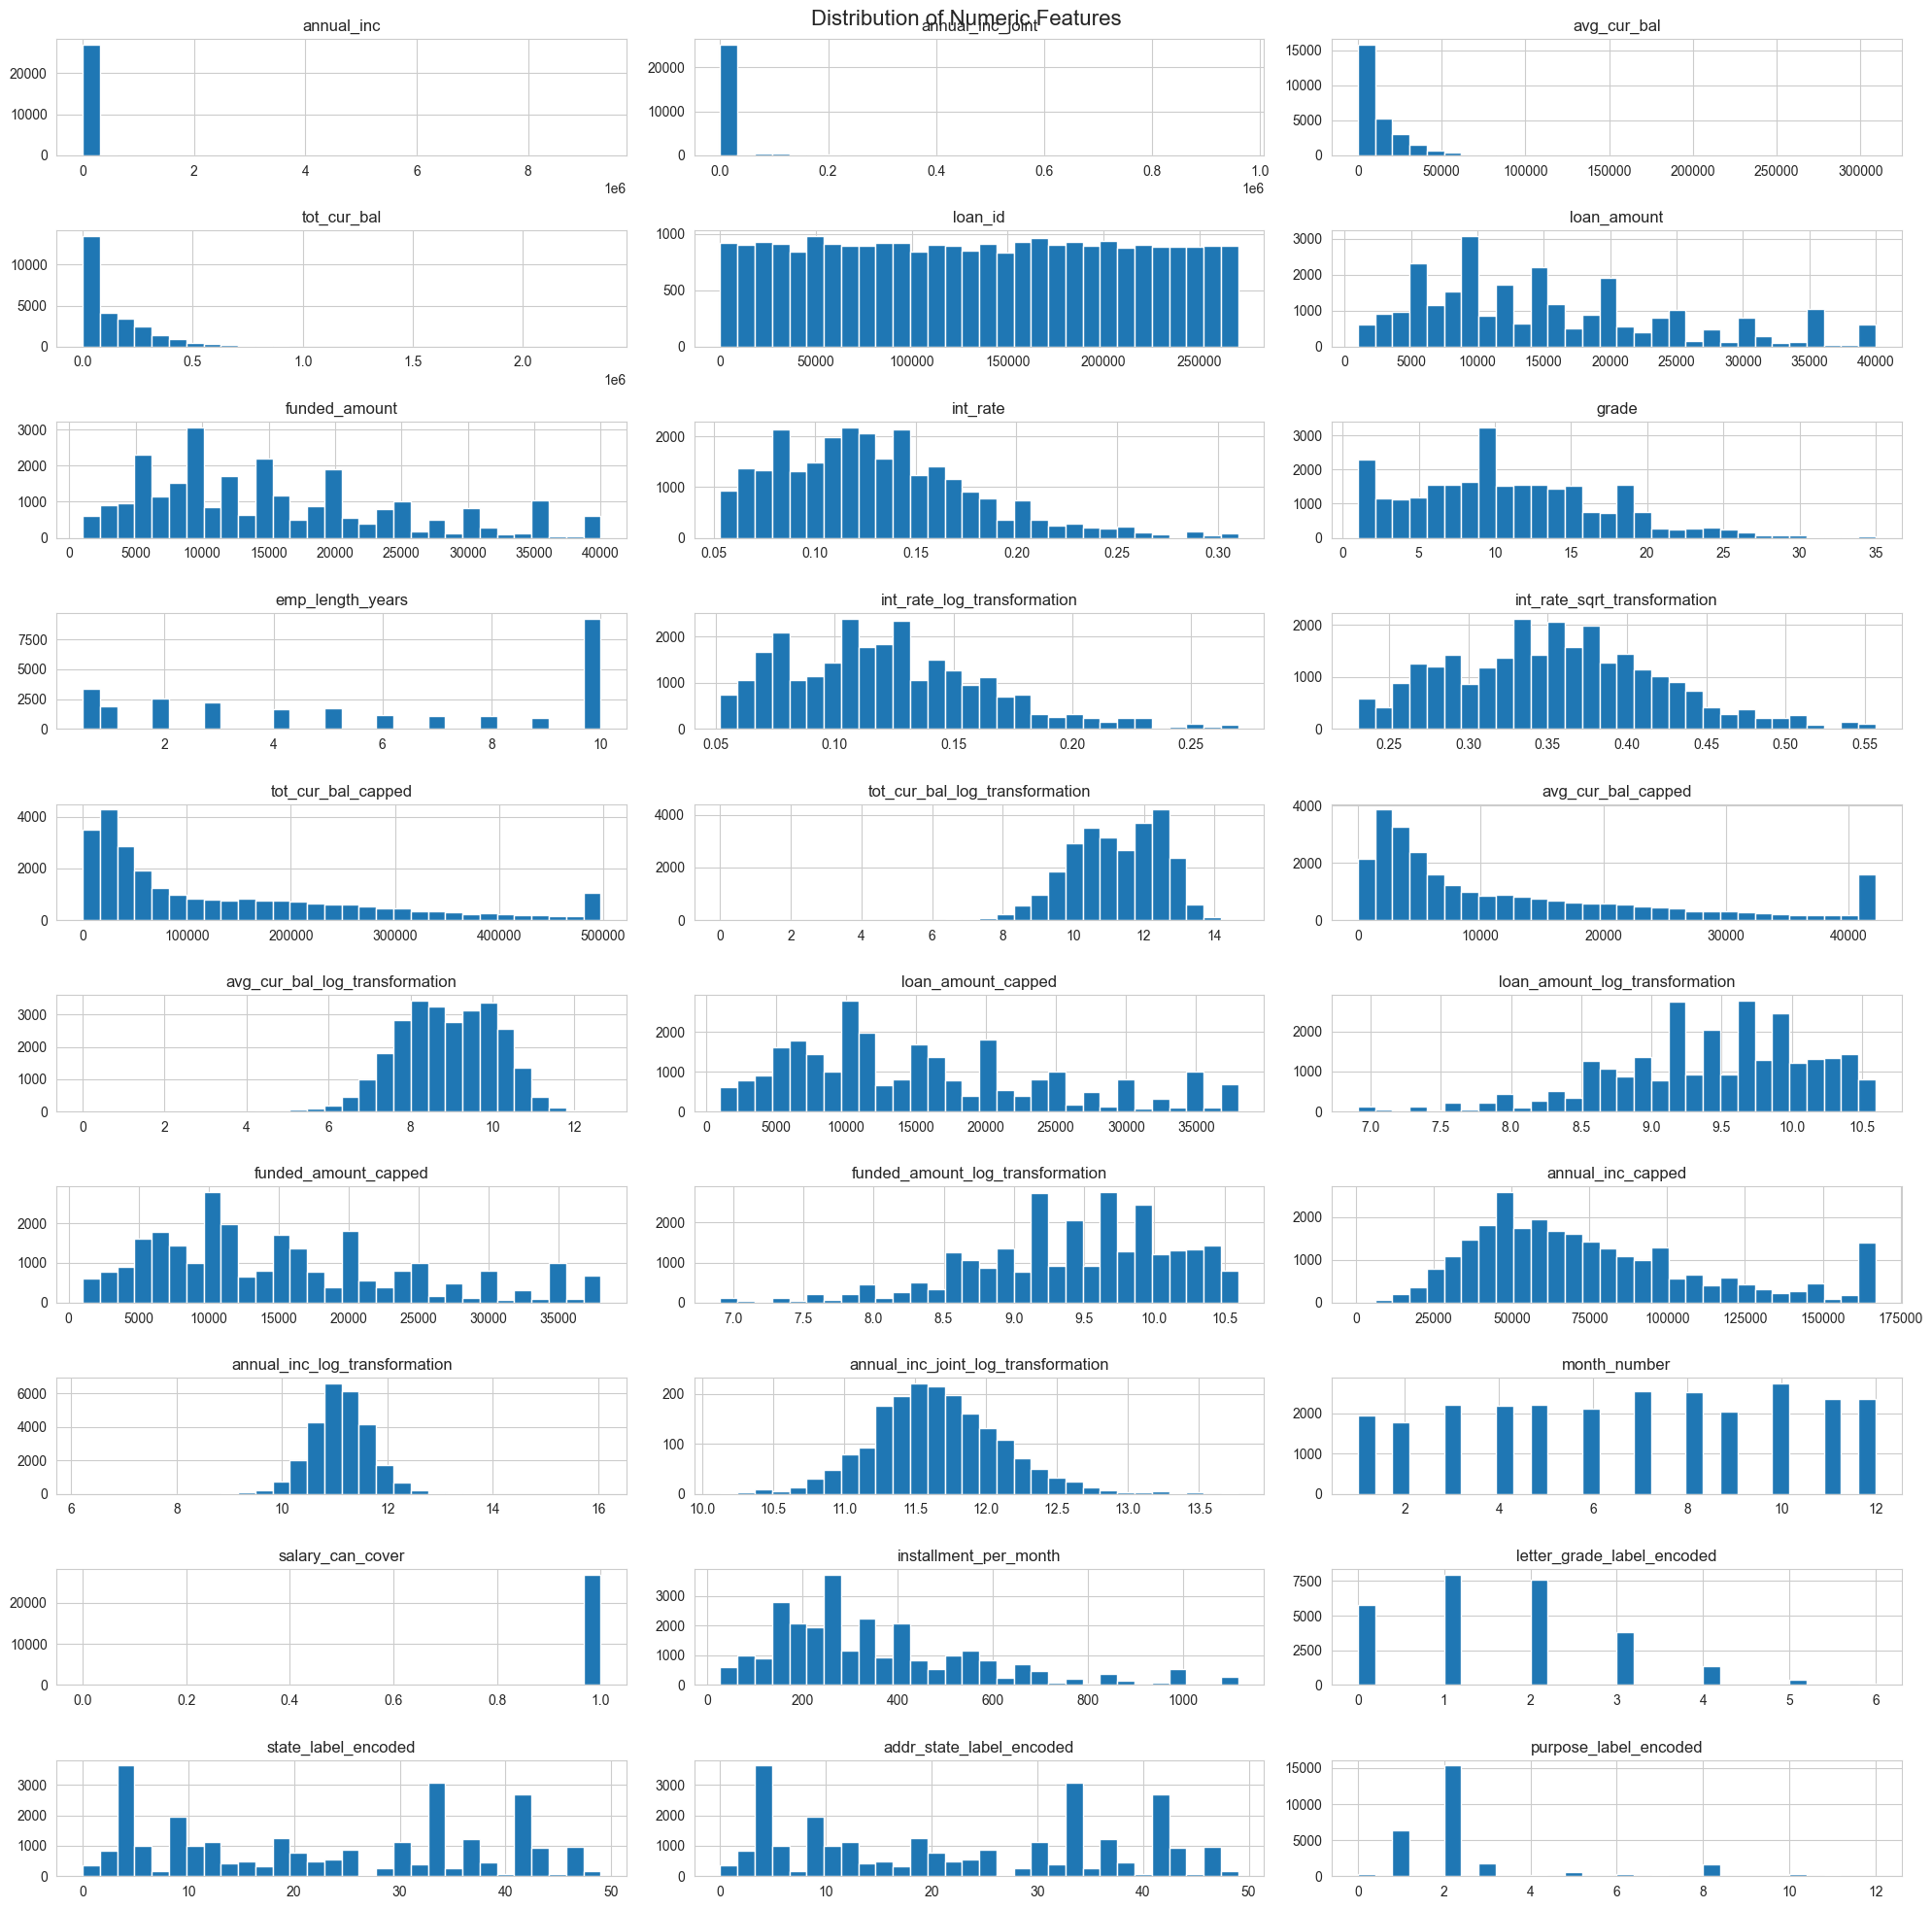

In [209]:
numeric_columns = fintech_data_df_clean.select_dtypes(include=['number'])
numeric_columns.hist(bins=30, figsize=(20, 20), layout=(int(np.ceil(len(numeric_columns.columns) / 3)), 3))
plt.suptitle('Distribution of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

## Plots histograms with KDE for the specified columns of the given DataFrame.
 

In [210]:
def plot_hist_kde_distributions(df, columns):
   
    num_columns = len(columns)
    num_rows = (num_columns // 3) + (num_columns % 3 > 0)

    plt.figure(figsize=(20, num_rows * 5))
    
    for i, column in enumerate(columns, 1):
        plt.subplot(num_rows, 3, i)
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True)
            plt.title(f'Distribution of {column}', fontsize=14)
            plt.xlabel(column, fontsize=12)
            plt.ylabel('Frequency', fontsize=12)
        else:
            sns.countplot(x=df[column], order=df[column].value_counts().index)
            plt.title(f'Distribution of {column}', fontsize=14)
            plt.xlabel(column, fontsize=12)
            plt.ylabel('Count', fontsize=12)
        
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

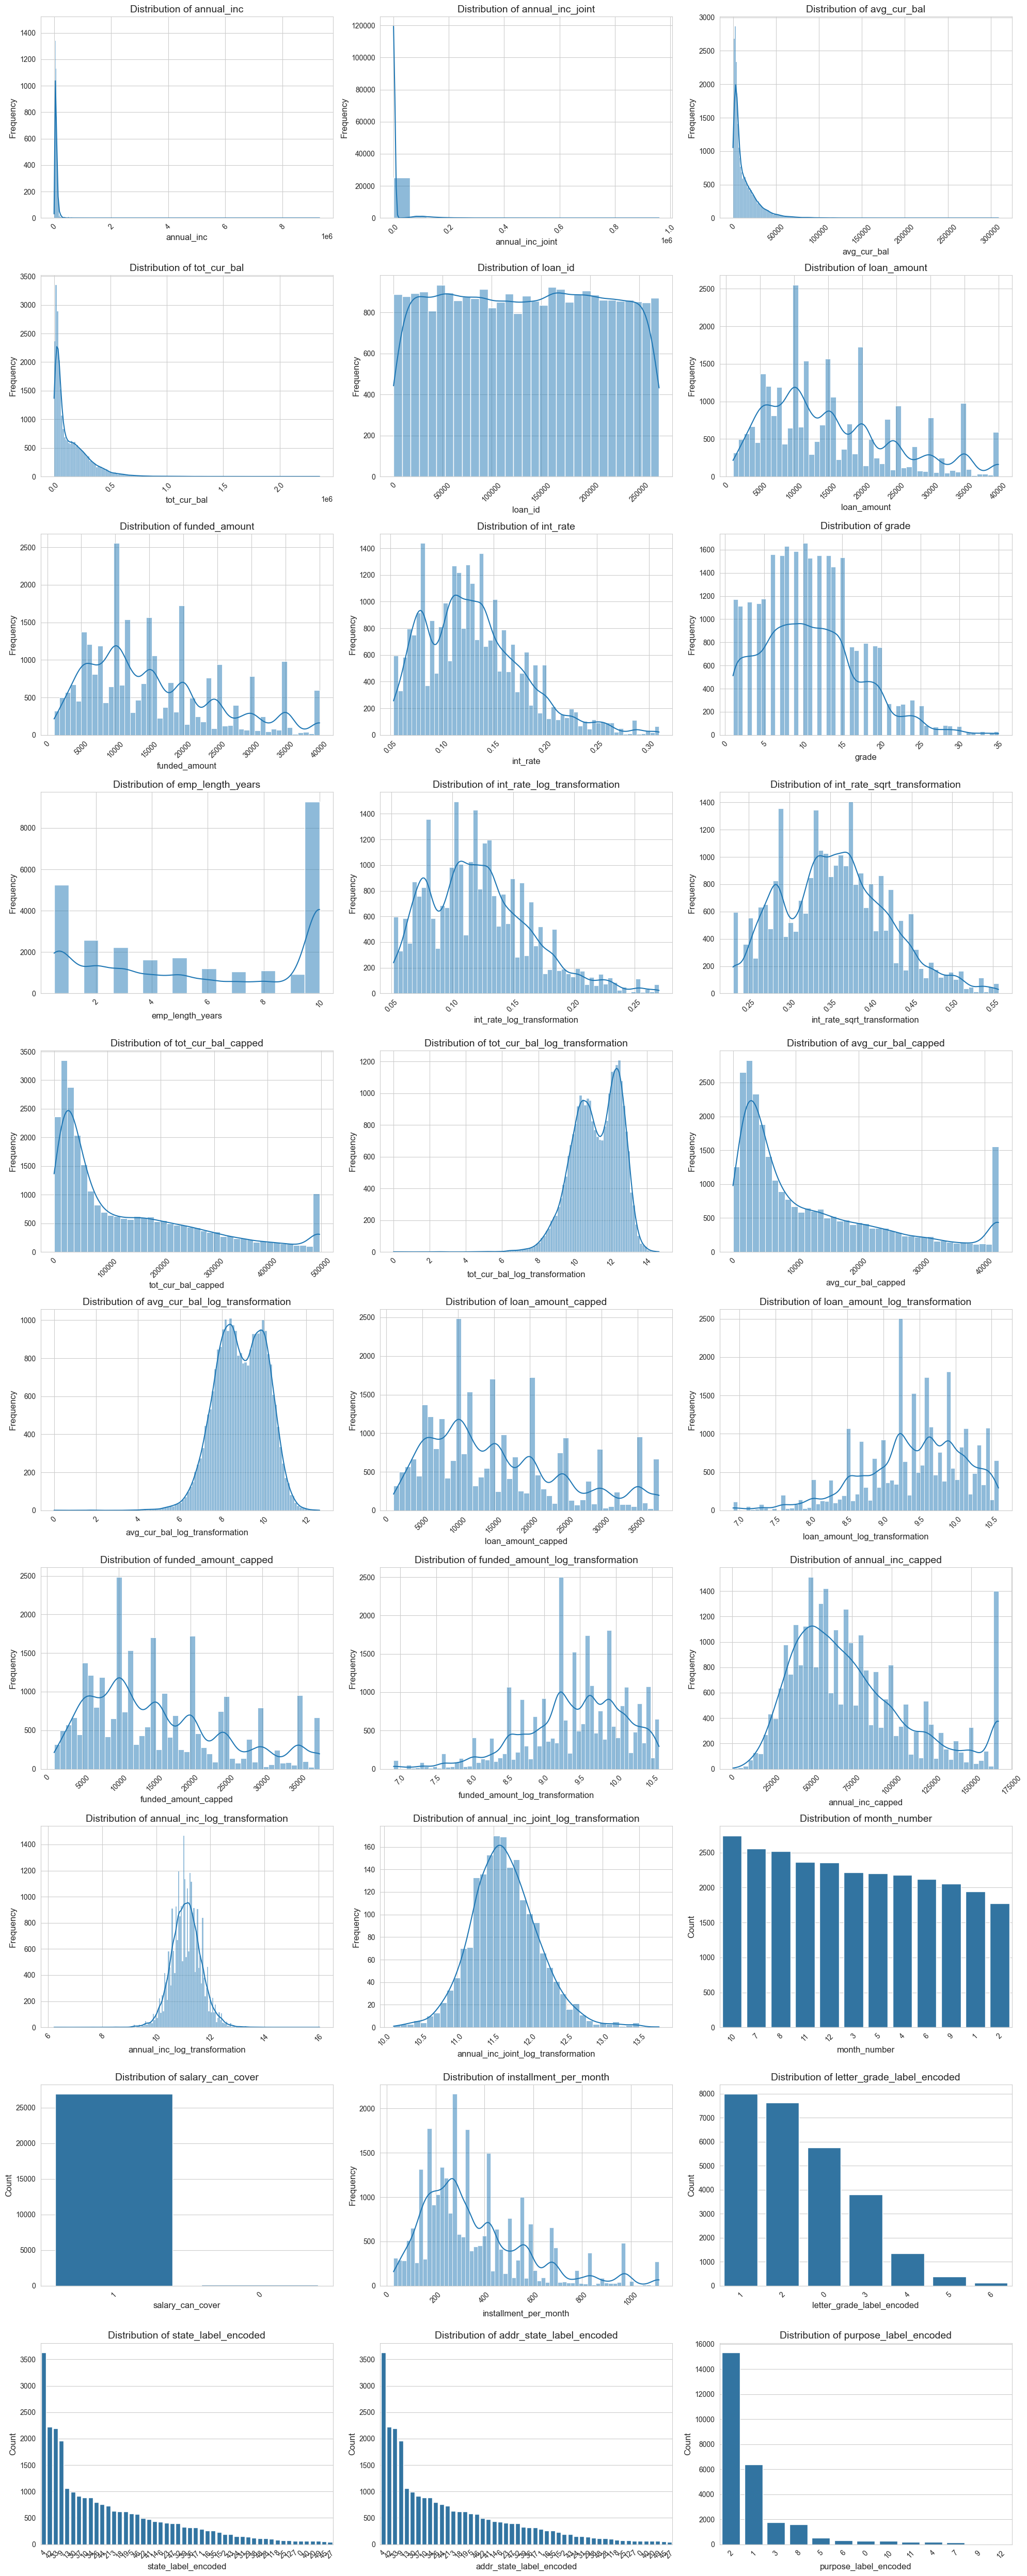

In [211]:
numeric_columns = fintech_data_df_clean.select_dtypes(include=['number'])

plot_hist_kde_distributions(fintech_data_df_clean,numeric_columns.columns)

In [212]:
correlation_matrix = fintech_data_df_clean.corr(numeric_only=True)


In [213]:
correlation_matrix

annual_inc  annual_inc_joint  \
annual_inc                             1.000000          0.008832   
annual_inc_joint                       0.008832          1.000000   
avg_cur_bal                            0.272872          0.129387   
tot_cur_bal                            0.377534          0.124951   
loan_id                                0.259049          0.144009   
loan_amount                            0.281153          0.164704   
funded_amount                          0.281153          0.164704   
int_rate                              -0.076157          0.008508   
grade                                 -0.075312         -0.021678   
pymnt_plan                             0.000521          0.003404   
missing_int_rate                       0.019885         -0.001437   
emp_title_missing                     -0.079739          0.043695   
emp_length_missing                    -0.096845          0.023021   
emp_length_years                       0.072519         -0.038453   
int_rate_log_transformation           -0.077394          0.008058   
int_rate_sqrt_transformation          -0.080822          0.006932   
tot_cur_bal_capped                     0.322850          0.127678   
tot_cur_bal_log_transformation         0.286785          0.107328   
avg_cur_bal_capped                     0.255368          0.125849   
avg_cur_bal_log_transformation         0.252595          0.114411   
loan_amount_capped                     0.280746          0.162119   
loan_amount_log_transformation         0.246061          0.135788   
funded_amount_capped                   0.280746          0.162119   
funded_amount_log_transformation       0.246061          0.135788   
annual_inc_capped                      0.591603         -0.001402   
annual_inc_log_transformation          0.626623         -0.017011   
annual_inc_joint_log_transformation    0.672051          0.909576   
month_number                          -0.000843          0.007256   
salary_can_cover                       0.048831         -0.195004   
installment_per_month                  0.280621          0.133239   
home_ownership_MORTGAGE                0.132167          0.105978   
home_ownership_OTHER                  -0.000637         -0.008507   
home_ownership_OWN                    -0.027388         -0.023291   
home_ownership_RENT                   -0.117496         -0.092755   
verification_status_Not Verified      -0.029448          0.012229   
verification_status_Source Verified    0.034737         -0.037345   
verification_status_Verified          -0.006390          0.028711   
term_ 36 months                       -0.057220         -0.082173   
term_ 60 months                        0.057220          0.082173   
loan_status_Charged Off               -0.025859         -0.041605   
loan_status_Current                    0.027630          0.116995   
loan_status_Default                    0.004323         -0.001437   
loan_status_Fully Paid                -0.014929         -0.108841   
loan_status_In Grace Period            0.004632          0.016930   
loan_status_Late (16-30 days)         -0.000869          0.014459   
loan_status_Late (31-120 days)        -0.005618          0.005944   
type_direct_pay                       -0.011266         -0.009431   
type_individual                        0.051483         -0.847303   
type_joint                            -0.011361          0.153757   
type_joint_app                        -0.048793          0.841524   
letter_grade_label_encoded            -0.078596         -0.019466   
state_label_encoded                   -0.013864          0.000028   
addr_state_label_encoded              -0.013864          0.000028   
purpose_label_encoded                  0.000276          0.028518   

                                     avg_cur_bal  tot_cur_bal   loan_id  \
annual_inc                              0.272872     0.377534  0.259049   
annual_inc_joint                        0.129387     0.124951  0.144009   
avg_cur_bal     

### Displaying relevant numeric feature that should be considered for Normalization like
`annual_inc_log`,`int_rate_sqrt`,`loan_amount_log`,`tot_cur_bal_log`,`avg_cur_bal_log`,`funded_amount_log`,`annual_inc_joint_log`,`installment_per_month`

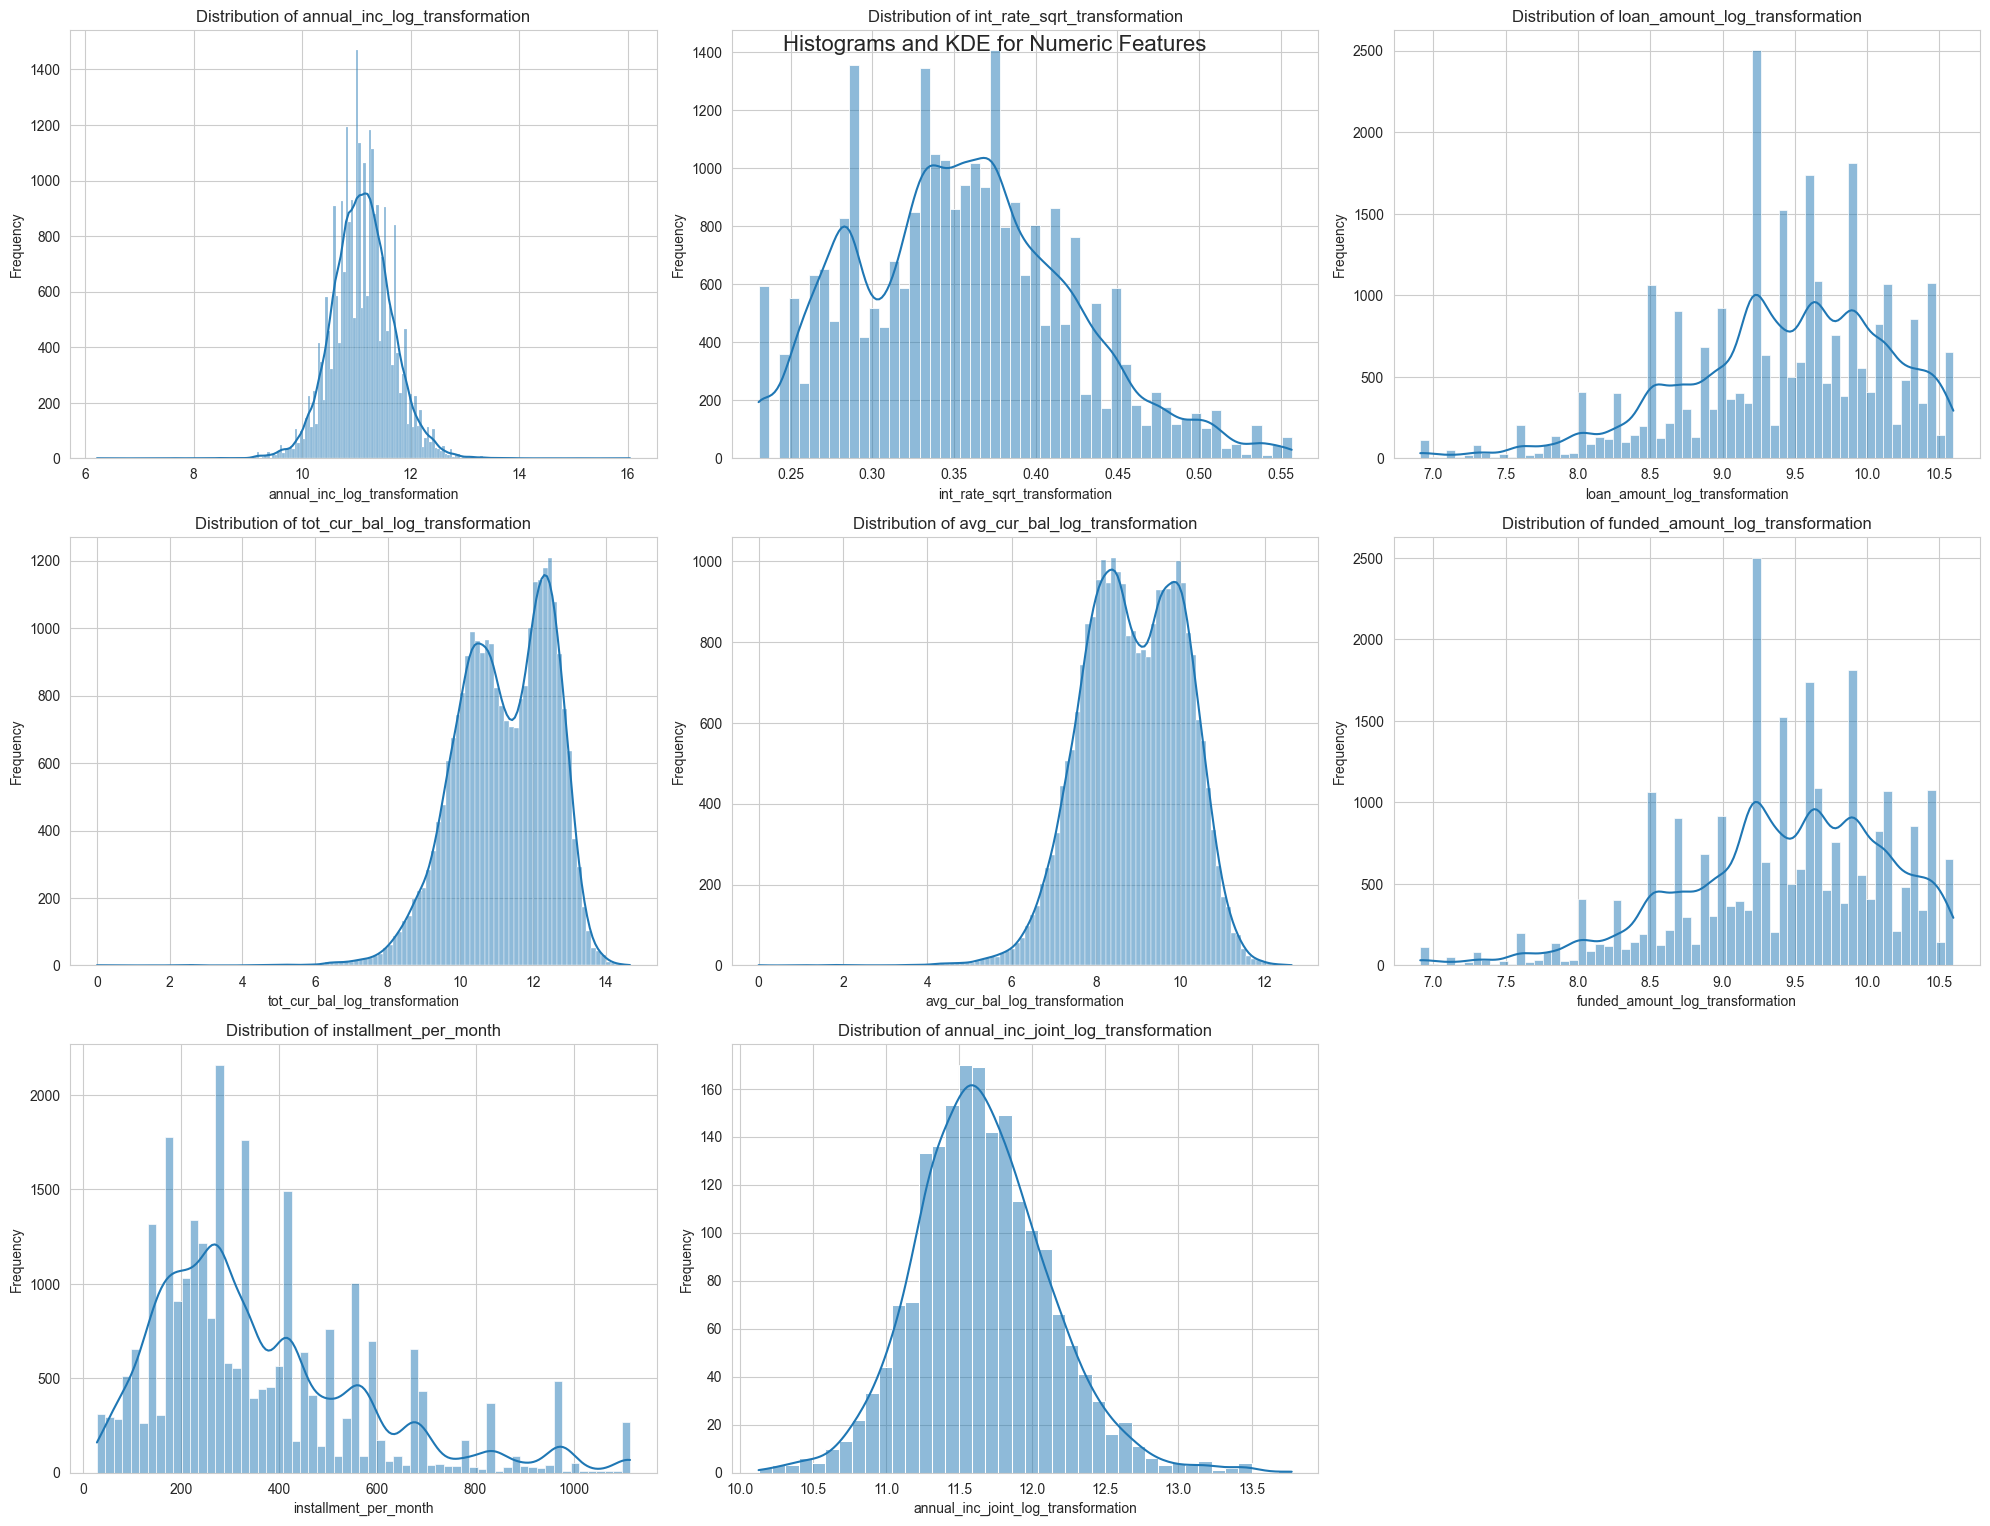

In [214]:
numeric_columns = fintech_data_df_clean[['annual_inc_log_transformation','int_rate_sqrt_transformation','loan_amount_log_transformation','tot_cur_bal_log_transformation','avg_cur_bal_log_transformation','funded_amount_log_transformation','installment_per_month' ,'annual_inc_joint_log_transformation']]
sns.set_style('whitegrid')
plt.figure(figsize=(20, 20))

for i, col in enumerate(numeric_columns.columns, 1):
    plt.subplot(4, 3, i) 
    sns.histplot(numeric_columns[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Histograms and KDE for Numeric Features', fontsize=16)
plt.show()

### I will just apply normalization to `installment_per_month` and `funded_amount` since i already used log transformation in Handling the outliers so the ranges becomes more reasonable 

## For `installment_per_month` using MinMaxScaler

In [ ]:

def apply_min_max_scaling(df, column_name):
    scaler = MinMaxScaler()
    new_column_name = f"{column_name}_normalized"
    df[[new_column_name]] = scaler.fit_transform(df[[column_name]])
    return df

In [ ]:
fintech_data_df_clean = apply_min_max_scaling(fintech_data_df_clean, 'installment_per_month')

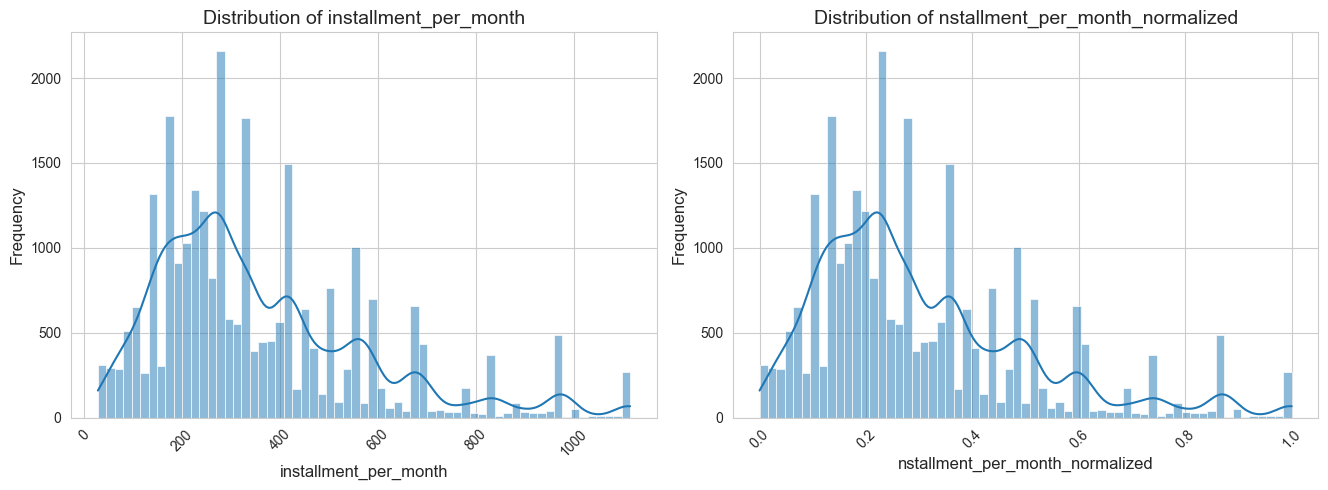

In [ ]:
columns_to_plot = ['installment_per_month', 'installment_per_month_normalized']

plot_hist_kde_distributions(fintech_data_df_clean, columns_to_plot)


## The Min-Max normalization for the installment_per_month feature
 effectively scales the data to a range between 0 and 1 while retaining the original distribution's shape.
 The distribution remains right-skewed, similar to the original data, which is appropriate for cases where you want to preserve the feature's original characteristics.

## For `funded_amount_log` using MinMaxScaler

In [ ]:
fintech_data_df_clean = apply_min_max_scaling(fintech_data_df_clean, 'funded_amount_log_transformation')

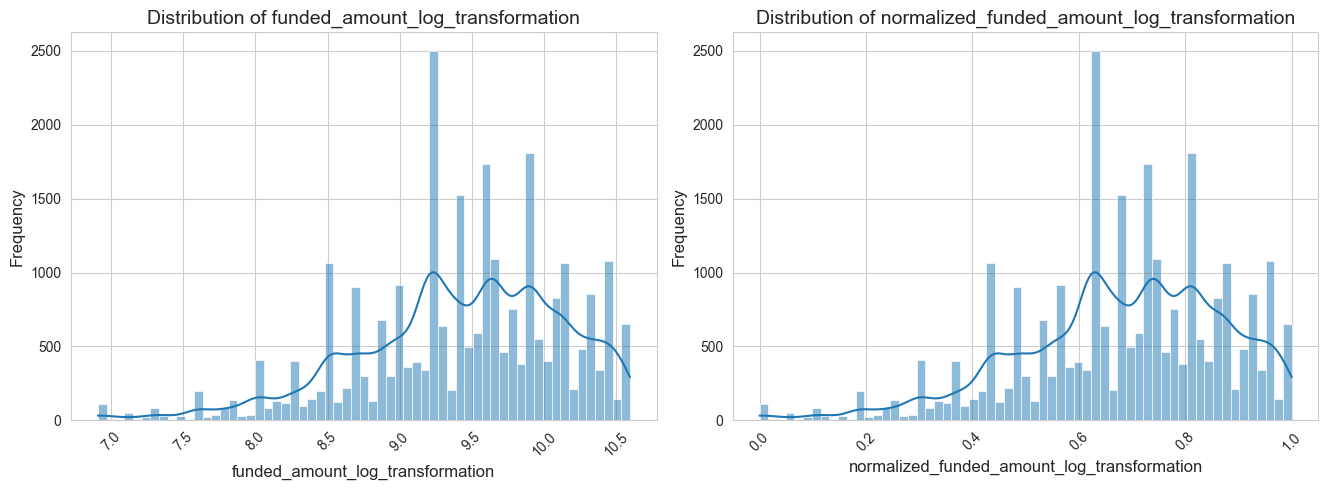

In [ ]:
columns_to_plot = ['funded_amount_log_transformation', 'funded_amount_log_transformation_normalized']

plot_hist_kde_distributions(fintech_data_df_clean, columns_to_plot)

# 5 - Lookup Table(s)

In [220]:
fintech_data_df_clean.columns

Index(['emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'annual_inc_joint', 'verification_status', 'zip_code', 'addr_state',
       'avg_cur_bal', 'tot_cur_bal', 'loan_id', 'loan_status', 'loan_amount',
       'state', 'funded_amount', 'term', 'int_rate', 'grade', 'issue_date',
       'pymnt_plan', 'type', 'purpose', 'description', 'loan_amount_bin',
       'missing_int_rate', 'income_range_title', 'emp_title_missing',
       'emp_length_missing', 'income_range_length', 'emp_length_years',
       'int_rate_log_transformation', 'int_rate_sqrt_transformation',
       'tot_cur_bal_capped', 'tot_cur_bal_log_transformation',
       'avg_cur_bal_capped', 'avg_cur_bal_log_transformation',
       'loan_amount_capped', 'loan_amount_log_transformation',
       'funded_amount_capped', 'funded_amount_log_transformation',
       'annual_inc_capped', 'annual_inc_log_transformation',
       'annual_inc_joint_log_transformation', 'month_number',
       'salary_can_cover', 'letter_grad

In [1]:
def add_to_lookup(imputation_lookup_df, new_entry):
    # Check if the entry already exists
    if not imputation_lookup_df[(imputation_lookup_df[list(new_entry)] == pd.Series(new_entry)).all(axis=1)].empty:
        return imputation_lookup_df  # Entry already exists, return without appending
    return imputation_lookup_df.append(new_entry, ignore_index=True)

In [ ]:
def create_lookup_table(df):
    encoded_columns = {
    'emp_length' : df['emp_length_years'],
    'addr_state' : df['addr_state_label_encoded'],
    'state' : df['state_label_encoded'],
    'purpose' :df['purpose_label_encoded'],
    'letter_grade' : df['letter_grade_label_encoded'],

    }
    mapping_data = []

    for column, encoded_values in encoded_columns.items():
        original_values = df[column].copy()
        for original, encoded in zip(original_values.unique(), encoded_values.unique()):

            mapping_data.append({
                'column': column,
                'original': original,
                'imputed': encoded
            })


    mapping_df = pd.DataFrame(mapping_data)

    grade_mapping = df[['grade', 'letter_grade']].drop_duplicates().reset_index(drop=True)
    grade_mapping['column'] = 'grade'
    grade_mapping = grade_mapping.rename(columns={'grade': 'original', 'letter_grade': 'imputed'})

    annual_inc_joint_mapping = pd.DataFrame({
    'column': ['annual_inc_joint','home_ownership'],
    'original': ['Nan','ANY'],
    'imputed': [0.0,'OTHER']
    })

    combined_mapping = pd.concat([annual_inc_joint_mapping, mapping_df, grade_mapping], ignore_index=True)
    return combined_mapping

In [ ]:
lookup_table_df = create_lookup_table(fintech_data_df_clean)

lookup_table_df.to_csv("lookup_table.csv", index=False)

print("Lookup table saved as lookup_table.csv")


Lookup table saved as lookup_table.csv


# 6 - Bonus ( Data Integration )

I have used `BeautifulSoup` from `bs4` and `requests` instead of `selenium ` becuase of some driver issues to web scrap `state_name`

In [ ]:
def create_state_names_bonus(df):

    url = "https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=53971"
    response = requests.get(url)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        table = soup.find('table')
        
        if table is None:
            print("No table found on the page.")
            return df
        
        rows = table.find_all('tr')
        state_codes = []
        state_names = []
        
        for row in rows[1:]:
            columns = row.find_all('td')
            if len(columns) == 3:
                state_code = columns[2].text.strip()
                state_name = columns[0].text.strip()
                state_codes.append(state_code)
                state_names.append(state_name)
        
        state_df = pd.DataFrame({
            'state_code': state_codes,
            'state_name': state_names
        })
        
        # Create a dictionary for mapping state codes to state names
        state_dict = dict(zip(state_df['state_code'], state_df['state_name']))
        
        # Map state names to the original DataFrame based on state codes
        df['state_name'] = df['state'].map(state_dict)
        print("State names added successfully.")
        
        return df
    else:
        print(f"Failed to retrieve data. Status code: {response.status_code}")
        return df


  state_code  state_name
0         AL     Alabama
1         AK      Alaska
2         AZ     Arizona
3         AR    Arkansas
4         CA  California
                                                   state  state_name
customer_id                                                         
YidceGQxXHg4ZlwnXHhjYlx4YTRceDA4XHgwYlx4OGRceGE...    NV      Nevada
YidPXHg4YSlJXHgwMFx4ZTBcblx4ZDlceGZmW25ceGNjXHg...    OK    Oklahoma
YidceGU2XHhiZVx4MTZceGZiXHhlMVx4ZmVceGQ0XHhmYyx...    OR      Oregon
YidceGZkXHhkYlx4YWE7XHg4M1x4YzhZXHhkM0R0e1x4ZDZ...    CA  California
YidceGQxXHhlN1x4YjdceGNkXHhiYVx4ZDZceGEyXHgxMSZ...    VA    Virginia


In [ ]:
fintech_data_df_clean = create_state_names_bonus(fintech_data_df_clean)

## Dropping original columns after Cleaning , Imputing , Handling Outliers , Encoding and Normalization 

In [224]:
fintech_data_df_clean.columns


Index(['emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'annual_inc_joint', 'verification_status', 'zip_code', 'addr_state',
       'avg_cur_bal', 'tot_cur_bal', 'loan_id', 'loan_status', 'loan_amount',
       'state', 'funded_amount', 'term', 'int_rate', 'grade', 'issue_date',
       'pymnt_plan', 'type', 'purpose', 'description', 'loan_amount_bin',
       'missing_int_rate', 'income_range_title', 'emp_title_missing',
       'emp_length_missing', 'income_range_length', 'emp_length_years',
       'int_rate_log_transformation', 'int_rate_sqrt_transformation',
       'tot_cur_bal_capped', 'tot_cur_bal_log_transformation',
       'avg_cur_bal_capped', 'avg_cur_bal_log_transformation',
       'loan_amount_capped', 'loan_amount_log_transformation',
       'funded_amount_capped', 'funded_amount_log_transformation',
       'annual_inc_capped', 'annual_inc_log_transformation',
       'annual_inc_joint_log_transformation', 'month_number',
       'salary_can_cover', 'letter_grad

In [225]:
def drop_unnecessary_columns(df):
    columns_to_drop = [
        'annual_inc_capped', 'avg_cur_bal', 'tot_cur_bal', 'loan_amount', 'funded_amount', 
        'int_rate', 'annual_inc', 'avg_cur_bal_capped', 'loan_amount_capped', 'funded_amount_capped',
        'tot_cur_bal_capped', 'loan_amount_bin', 'emp_title_missing', 'income_range_title',
        'emp_length_missing', 'income_range_length', 'emp_length', 'missing_int_rate', 'grade', 
        'addr_state', 'purpose', 'home_ownership', 'verification_status', 'type', 'term', 'loan_status','state','int_rate_log_transformation'
    ]
    
    df = df.drop(columns=columns_to_drop,axis=1)
    return df

In [226]:
fintech_data_df_clean = drop_unnecessary_columns(fintech_data_df_clean)

In [227]:
fintech_data_df_clean.columns


Index(['emp_title', 'annual_inc_joint', 'zip_code', 'loan_id', 'issue_date',
       'pymnt_plan', 'description', 'emp_length_years',
       'int_rate_sqrt_transformation', 'tot_cur_bal_log_transformation',
       'avg_cur_bal_log_transformation', 'loan_amount_log_transformation',
       'funded_amount_log_transformation', 'annual_inc_log_transformation',
       'annual_inc_joint_log_transformation', 'month_number',
       'salary_can_cover', 'letter_grade', 'installment_per_month',
       'home_ownership_MORTGAGE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'term_ 36 months', 'term_ 60 months', 'loan_status_Charged Off',
       'loan_status_Current', 'loan_status_Default', 'loan_status_Fully Paid',
       'loan_status_In Grace Period', 'loan_status_Late (16-30 days)',
       'loan_status_Late (31-120 days)', 'type_direct_pay', 'type_i

## 5- Exporting the dataframe to a csv file or parquet

In [228]:
# fintech_data_df_clean.to_parquet('fintech_data_clean_MET_P1_52-24625.parquet', index=False)

print("Cleaned DataFrame exported as 'fintech_data_clean_MET_P1_52-24625.parquet'")

Cleaned DataFrame exported as 'fintech_data_clean_MET_P1_52-24625.parquet'


In [229]:
# fintech_data_df_clean.to_csv('fintech_data_clean_MET_P1_52-24625.csv', index=False)

print("Cleaned DataFrame exported as 'fintech_data_clean_MET_P1_52-24625.csv'")

Cleaned DataFrame exported as 'fintech_data_clean_MET_P1_52-24625.csv'
